##### 

## Problem Statement

X Education is an online education company that struggles with a low lead conversion rate of around 30%. The goal is to improve this rate to 80% by identifying "Hot Leads" — those most likely to convert into paying customers. A logistic regression model will be built to score leads based on their likelihood of conversion, allowing the sales team to focus on high-priority leads.

## Approach to Solving the Problem

### 1. Data Understanding
- Analyze the dataset to understand key features and target variables (conversion status).

### 2. Exploratory Data Analysis (EDA)
- Handle missing data and treat "Select" as null values.
- Explore relationships between variables (e.g., Lead Source, Total Time on Website) and conversion rate.
- Visualize correlations using histograms, box plots, and pair plots.

### 3. Data Preprocessing & Feature Engineering
- Handle categorical variables by using **One-Hot Encoding** for features like Lead Source.
- Normalize or standardize numerical variables such as time spent on the website and total visits.
- Feature selection: Select features that strongly correlate with the target variable.

### 4. Model Building: Logistic Regression
- Build a logistic regression model to predict lead conversion.
- Evaluate the model using:
  - **Accuracy**
  - **Precision**
  - **Recall**
  - **F1-score**
- Use **cross-validation** to ensure model robustness.

### 5. Model Evaluation
- Plot the **ROC curve** and calculate the **AUC score**.
- Fine-tune the model by adjusting hyperparameters to improve precision and recall.

### 6. Lead Scoring
- Based on the logistic regression output, assign a lead score between 0 and 100, where higher scores indicate a higher likelihood of conversion.

### 7. Final Presentation & Reporting
- Summarize the process and key findings in a **presentation**.
- Provide a detailed **report** explaining the approach, insights, and model performance.
- Visualize important metrics and insights for the business team.


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import RFE




In [5]:
# Step 1: Load the original dataset
df_X_OG = pd.read_csv("Leads.csv")


In [6]:
# Step 2: Make a copy of the original DataFrame
df_X = df_X_OG.copy()


In [7]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
df_X.shape

(9240, 37)

In [9]:
df_X.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [10]:
df_X.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [11]:
df_X.dtypes.value_counts()

object     30
float64     4
int64       3
Name: count, dtype: int64

In [12]:
df_X.dtypes 

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [13]:
# Step 1: Create lists of columns based on their data types
int_columns = df_X.select_dtypes(include=['int64']).columns.tolist()
float_columns = df_X.select_dtypes(include=['float64']).columns.tolist()
object_columns = df_X.select_dtypes(include=['object']).columns.tolist()

# Step 2: Print the lists of columns
print("Integer Columns:\n", int_columns)
print("\nFloat Columns:\n", float_columns)
print("\nObject Columns:\n", object_columns)

Integer Columns:
 ['Lead Number', 'Converted', 'Total Time Spent on Website']

Float Columns:
 ['TotalVisits', 'Page Views Per Visit', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']

Object Columns:
 ['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [14]:
# Calculate the percentage of missing values for all columns
missing_percentage = df_X.isnull().sum() / len(df_X) * 100

# Show columns with a high percentage of missing values (over 30%)
high_missing_columns = missing_percentage[missing_percentage > 30]
print("Columns with high missing values (over 30%):")
print(high_missing_columns)

# Select only numerical columns for variance calculation
numerical_columns = df_X.select_dtypes(include=[np.number]).columns

# Check variance of numerical columns to identify low variance
low_variance_columns = df_X[numerical_columns].var()[df_X[numerical_columns].var() < 0.01]  # Adjust the threshold
print("Columns with low variance:")
print(low_variance_columns)

Columns with high missing values (over 30%):
Tags                           36.287879
Lead Quality                   51.590909
Asymmetrique Activity Index    45.649351
Asymmetrique Profile Index     45.649351
Asymmetrique Activity Score    45.649351
Asymmetrique Profile Score     45.649351
dtype: float64
Columns with low variance:
Series([], dtype: float64)


In [15]:
# Calculate the percentage of missing values in object columns
object_columns = df_X.select_dtypes(include=['object']).columns
missing_percentage_object = df_X[object_columns].isnull().sum() / len(df_X) * 100

# Show only columns with missing values
missing_percentage_object[missing_percentage_object > 0]


Lead Source                                       0.389610
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     29.318182
City                                             15.367965
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
dtype: float64

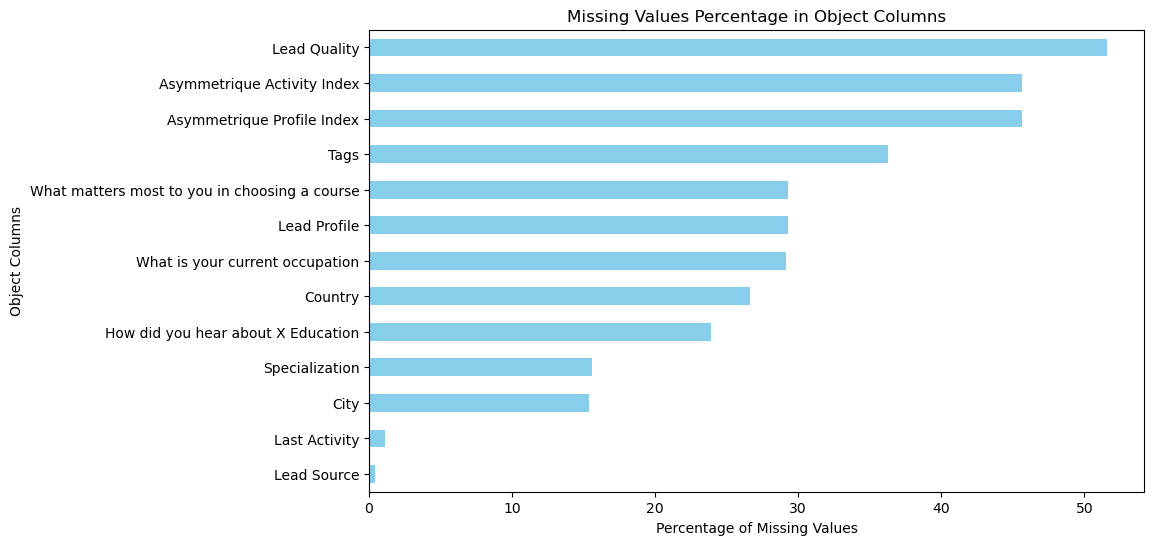

In [16]:
import matplotlib.pyplot as plt

# Filter the object columns that have missing values
missing_percentage_object_filtered = missing_percentage_object[missing_percentage_object > 0]

# Plot the missing values percentage
plt.figure(figsize=(10, 6))
missing_percentage_object_filtered.sort_values(ascending=False).plot(kind='barh', color='skyblue')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Object Columns')
plt.title('Missing Values Percentage in Object Columns')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [17]:
# Get unique values for each categorical (object) column
unique_values_in_columns = {col: df_X[col].unique() for col in object_columns}

# Display unique values for each categorical column
for col, values in unique_values_in_columns.items():
    print(f"Unique values in {col}:")
    print(values)
    print("\n")


Unique values in Prospect ID:
['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']


Unique values in Lead Origin:
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']


Unique values in Lead Source:
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']


Unique values in Do Not Email:
['No' 'Yes']


Unique values in Do Not Call:
['No' 'Yes']


Unique values in Last Activity:
['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Websi

# First drop >>
# Reasons for Dropping Each Column:
## Tags:
#### Reason: High missing percentage (36.29%).
#### Impact: If a column has a significant amount of missing data, it can introduce noise and uncertainty into your model, making it less reliable.

## Lead Quality:
#### Reason: Extremely high missing percentage (51.59%).
#### Impact: A target variable with more than 50% missing values would not provide reliable information, making it unsuitable for modeling.

## Asymmetrique Activity Index:
#### Reason: High missing percentage (45.65%).
#### Impact: Similar to the Lead Quality column, its high missing values mean it would not contribute meaningful insights to the model.

## Asymmetrique Profile Index:
#### Reason: High missing percentage (45.65%).
#### Impact: The same rationale as above applies, leading to its exclusion from the dataset.

## Asymmetrique Activity Score:
#### Reason: High missing percentage (45.65%).
#### Impact: Having too many missing values would reduce the robustness of the analysis.

## Asymmetrique Profile Score:
#### Reason: High missing percentage (45.65%).
#### Impact: Similar to the above columns, it would not provide reliable insights.

## Magazine:
#### Reason: Contains only one unique value ('No').
#### Impact: This column does not provide any variability or predictive power since it does not differentiate between leads.

## Update me on Supply Chain Content:
#### Reason: Contains only one unique value ('No').
#### Impact: Like the Magazine column, it adds no value for differentiation in leads.

## Get updates on DM Content:
#### Reason: Contains only one unique value ('No').
#### Impact: Again, no variability means no predictive power.

## I agree to pay the amount through cheque:
#### Reason: Contains only one unique value ('No').
#### Impact: This column would not provide useful information for the model.

In [19]:
# Drop the specified columns from the DataFrame
columns_to_drop = [
    'Tags', 
    'Lead Quality', 
    'Asymmetrique Activity Index', 
    'Asymmetrique Profile Index', 
    'Asymmetrique Activity Score', 
    'Asymmetrique Profile Score', 
    'Magazine', 
    'Update me on Supply Chain Content', 
    'Get updates on DM Content', 
    'I agree to pay the amount through cheque'
]

# Dropping columns
df_X.drop(columns=columns_to_drop, inplace=True)

# Check the shape of the DataFrame after dropping columns
print("Shape of the DataFrame after dropping columns:", df_X.shape)

# Display the first few rows of the updated DataFrame
print("First few rows of the updated DataFrame:")
print(df_X.head())

# Calculate the percentage of missing values for remaining columns
missing_percentage = df_X.isnull().sum() / len(df_X) * 100
print("Percentage of missing values in remaining columns:")
print(missing_percentage[missing_percentage > 0])

# Calculate the variance of remaining columns (excluding ID columns and any float/int columns)
remaining_columns = df_X.select_dtypes(include=['object']).columns
variance = df_X[remaining_columns].nunique()
print("Variance (unique value counts) of remaining columns:")
print(variance)


Shape of the DataFrame after dropping columns: (9240, 27)
First few rows of the updated DataFrame:
                            Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2

In [20]:
# Step 1: Identify categorical columns for imbalance analysis
# Adjust the list based on the existing columns in df_X
categorical_columns = [
    'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 
    'Last Activity', 'Country', 'Specialization', 
    'How did you hear about X Education', 'What is your current occupation', 
    'What matters most to you in choosing a course', 
    'Lead Profile', 'City', 'Last Notable Activity'
]

# Step 2: Filter out columns that do not exist in the DataFrame
existing_categorical_columns = [col for col in categorical_columns if col in df_X.columns]

# Step 3: Analyze and display unique value counts for existing categorical columns
for column in existing_categorical_columns:
    print(f"Unique value counts for {column}:")
    print(df_X[column].value_counts(dropna=False))  # Include NaN values for imputation analysis
    print()  # Print a newline for better readability


Unique value counts for Lead Origin:
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

Unique value counts for Lead Source:
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

Unique value counts for Do Not Email:
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64

Unique value c

C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\14700839.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df_X, order=df_X[column].value_counts().index, palette="viridis")


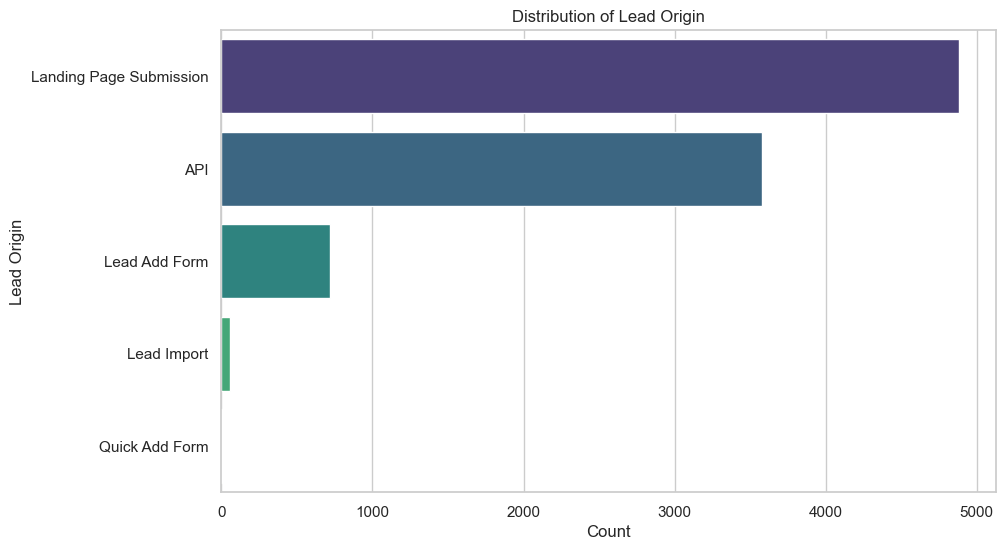

C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\14700839.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df_X, order=df_X[column].value_counts().index, palette="viridis")


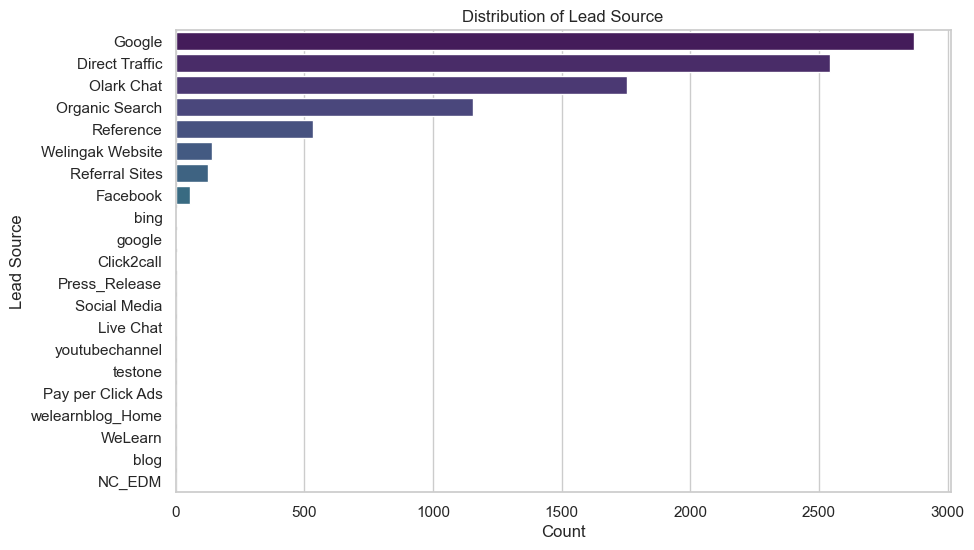

C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\14700839.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df_X, order=df_X[column].value_counts().index, palette="viridis")


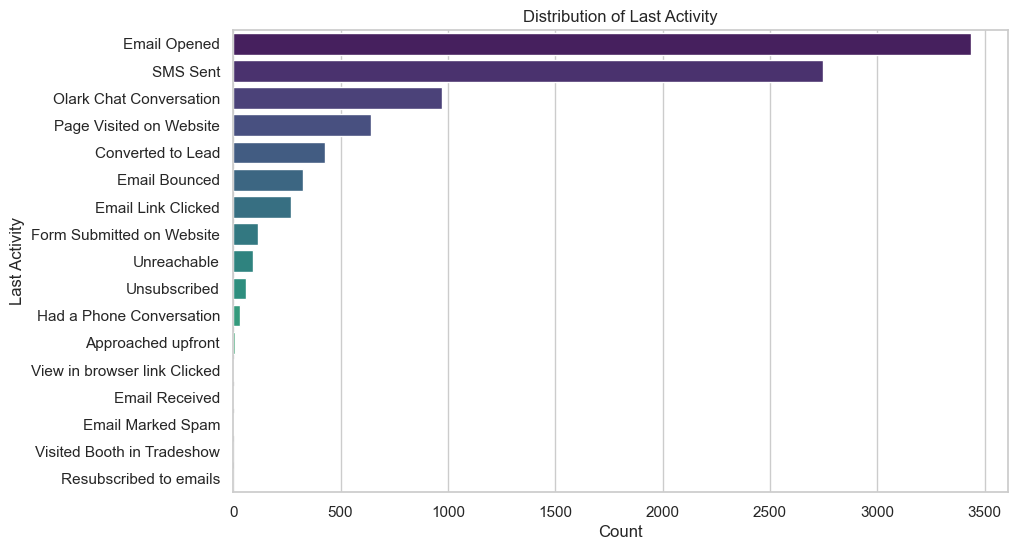

C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\14700839.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df_X, order=df_X[column].value_counts().index, palette="viridis")


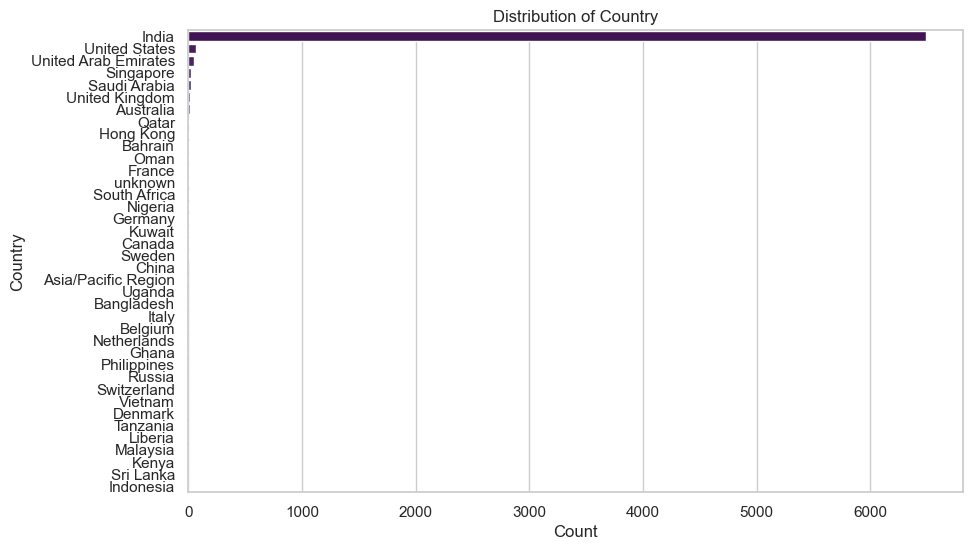

C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\14700839.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df_X, order=df_X[column].value_counts().index, palette="viridis")


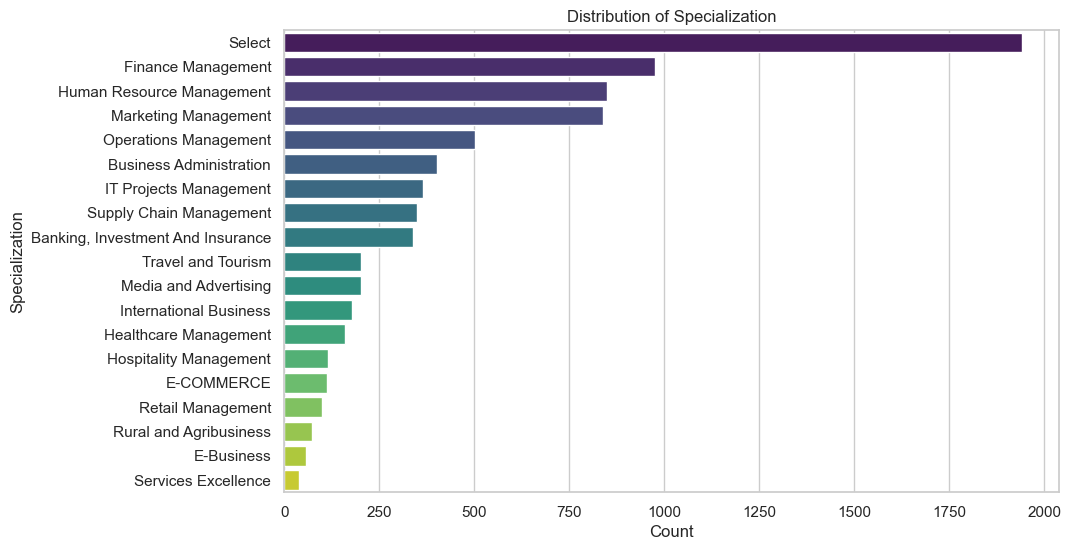

C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\14700839.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=df_X, order=df_X[column].value_counts().index, palette="viridis")


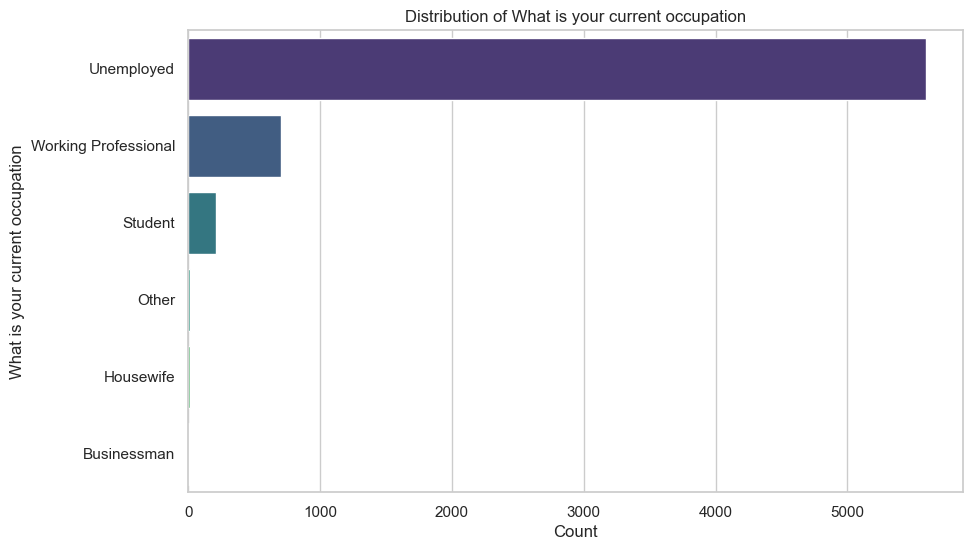

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualization style
sns.set(style="whitegrid")

# List of categorical columns to visualize
categorical_columns_to_plot = ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation']

for column in categorical_columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df_X, order=df_X[column].value_counts().index, palette="viridis")
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()


In [22]:
# Define a threshold for grouping rare categories
threshold = 100  # Count threshold for grouping

# Count occurrences of each category, excluding NaN
lead_source_counts = df_X['Lead Source'].value_counts()

# Group rare categories into 'Other', handling NaN values appropriately
df_X['Lead Source'] = df_X['Lead Source'].apply(lambda x: x if x is np.nan or lead_source_counts[x] >= threshold else 'Other')


C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\2838456913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_X['Lead Source'], order=df_X['Lead Source'].value_counts().index, palette='viridis')


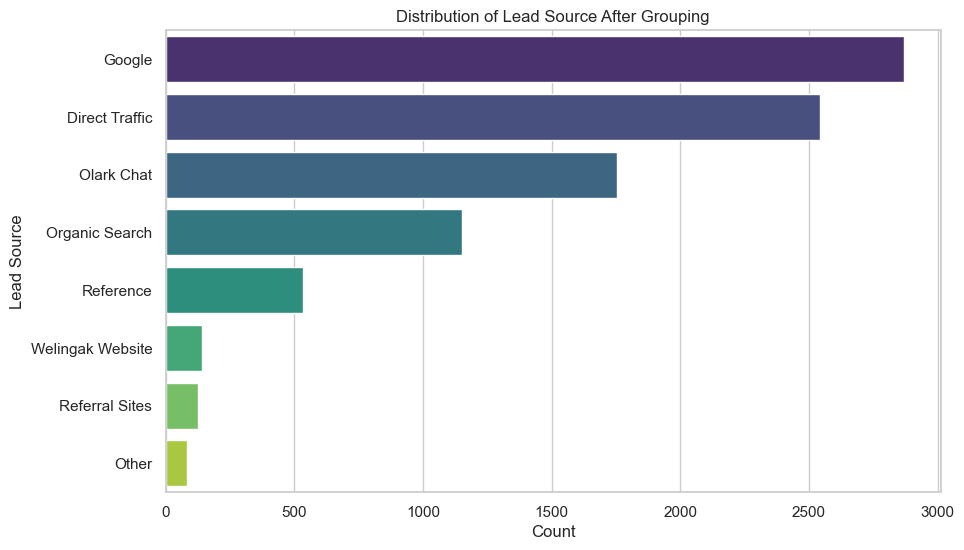

In [23]:
# Visualize the updated distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=df_X['Lead Source'], order=df_X['Lead Source'].value_counts().index, palette='viridis')
plt.title('Distribution of Lead Source After Grouping')
plt.xlabel('Count')
plt.ylabel('Lead Source')
plt.show()

C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\1596075262.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rates, y=conversion_rates.index, palette='viridis')


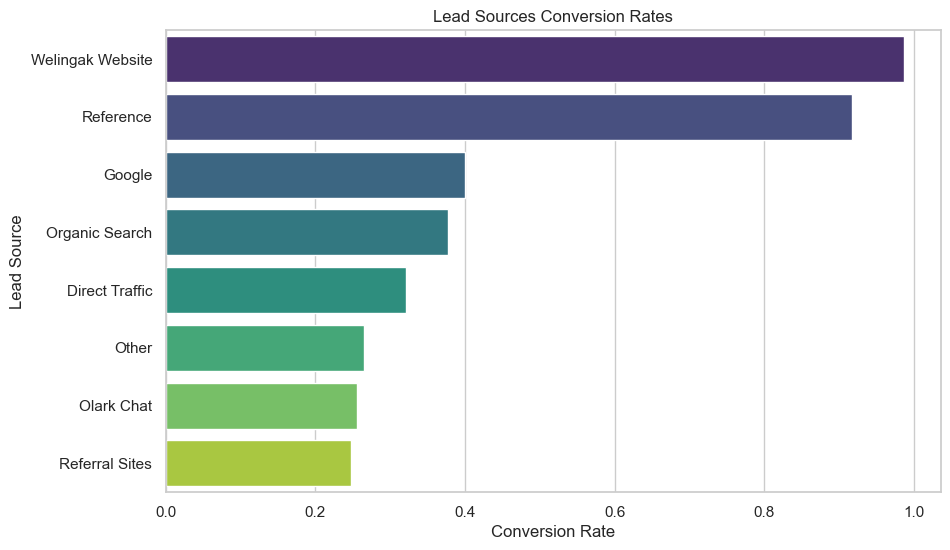

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a column 'Converted' where 1 indicates a converted lead and 0 indicates not converted
# Calculate conversion rates per lead source
conversion_rates = df_X.groupby('Lead Source')['Converted'].mean().sort_values(ascending=False)

# Plot the conversion rates
plt.figure(figsize=(10, 6))
sns.barplot(x=conversion_rates, y=conversion_rates.index, palette='viridis')
plt.title('Lead Sources Conversion Rates')
plt.xlabel('Conversion Rate')
plt.ylabel('Lead Source')
plt.show()


In [25]:
# Step 4: Evaluate Binary Features

# Step 4.1: Check Correlation of Binary Features with Target Variable
# Map 'Yes' to 1 and 'No' to 0 for the binary features
df_binary = df_X[['Do Not Email', 'Do Not Call', 'Converted']].copy()
df_binary['Do Not Email'] = df_binary['Do Not Email'].map({'Yes': 1, 'No': 0})
df_binary['Do Not Call'] = df_binary['Do Not Call'].map({'Yes': 1, 'No': 0})

# Calculate the correlation with the target variable 'Converted'
correlation_dne = df_binary.corr()

# Display the correlation matrix
print(correlation_dne)


              Do Not Email  Do Not Call  Converted
Do Not Email      1.000000    -0.004322  -0.135580
Do Not Call      -0.004322     1.000000   0.018581
Converted        -0.135580     0.018581   1.000000


# 2nd drop
# Decision to Drop Binary Features: Do Not Email and Do Not Call
## Correlation Analysis: The correlation of the binary features with the target variable (Converted) reveals minimal relationships:

#### Do Not Email: Correlation of -0.135580 with Converted, indicating a weak negative relationship.
#### Do Not Call: Correlation of 0.018581 with Converted, indicating an insignificant relationship.
## Lack of Predictive Power: Given the low correlation values, both features do not significantly contribute to predicting the likelihood of conversion.

## Potential for Noise: Keeping features that do not correlate well with the target variable may introduce noise into the model, complicating interpretation and analysis.

In [27]:
# Dropping the binary features
df_X = df_X.drop(columns=['Do Not Email', 'Do Not Call'])


# Investigate and Aggregate Dominant Categories

In [29]:
# Define a mapping for countries to continents
country_to_continent = {
    'India': 'Asia',
    'United States': 'North America',
    'United Arab Emirates': 'Asia',
    # Add all relevant country mappings here
}

# Apply the mapping
df_X['Continent'] = df_X['Country'].map(country_to_continent).fillna('Other')


In [30]:
# Replace 'Select' with a more meaningful category
df_X['Specialization'] = df_X['Specialization'].replace('Select', 'Not Specified')


In [31]:
# Check unique values in the Specialization column after replacement
print(df_X['Specialization'].unique())


['Not Specified' 'Business Administration' 'Media and Advertising' nan
 'Supply Chain Management' 'IT Projects Management' 'Finance Management'
 'Travel and Tourism' 'Human Resource Management' 'Marketing Management'
 'Banking, Investment And Insurance' 'International Business' 'E-COMMERCE'
 'Operations Management' 'Retail Management' 'Services Excellence'
 'Hospitality Management' 'Rural and Agribusiness' 'Healthcare Management'
 'E-Business']


C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\3480813598.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=specialization_counts.index, y=specialization_counts.values, palette='viridis')


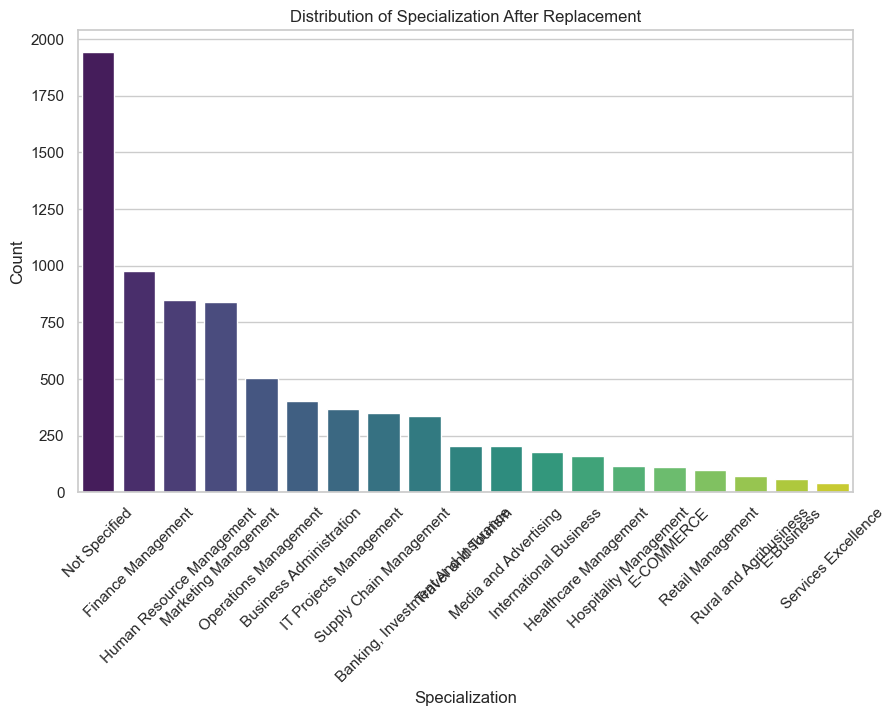

In [32]:

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Count the occurrences of each specialization
specialization_counts = df_X['Specialization'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=specialization_counts.index, y=specialization_counts.values, palette='viridis')
plt.title('Distribution of Specialization After Replacement')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Analyze "Not Specified" Category

In [34]:
# Check count of 'Not Specified' category in Specialization
not_specified_count = df_X[df_X['Specialization'] == 'Not Specified'].shape[0]
conversion_rate_not_specified = df_X[df_X['Specialization'] == 'Not Specified']['Converted'].mean()

print(f"Count of 'Not Specified': {not_specified_count}")
print(f"Conversion Rate for 'Not Specified': {conversion_rate_not_specified:.2f}")


Count of 'Not Specified': 1942
Conversion Rate for 'Not Specified': 0.42


In [35]:
# Calculate conversion rates for each specialization
specialization_conversion = df_X.groupby('Specialization')['Converted'].mean().reset_index()
specialization_conversion.columns = ['Specialization', 'Conversion Rate']

# Display the conversion rates
print(specialization_conversion)


                       Specialization  Conversion Rate
0   Banking, Investment And Insurance         0.494083
1             Business Administration         0.444169
2                          E-Business         0.368421
3                          E-COMMERCE         0.357143
4                  Finance Management         0.446721
5               Healthcare Management         0.496855
6              Hospitality Management         0.421053
7           Human Resource Management         0.457547
8              IT Projects Management         0.382514
9              International Business         0.359551
10               Marketing Management         0.486874
11              Media and Advertising         0.418719
12                      Not Specified         0.421215
13              Operations Management         0.473161
14                  Retail Management         0.340000
15             Rural and Agribusiness         0.424658
16                Services Excellence         0.275000
17        

C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\1070813588.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=specialization_conversion, x='Specialization', y='Conversion Rate', palette='viridis')


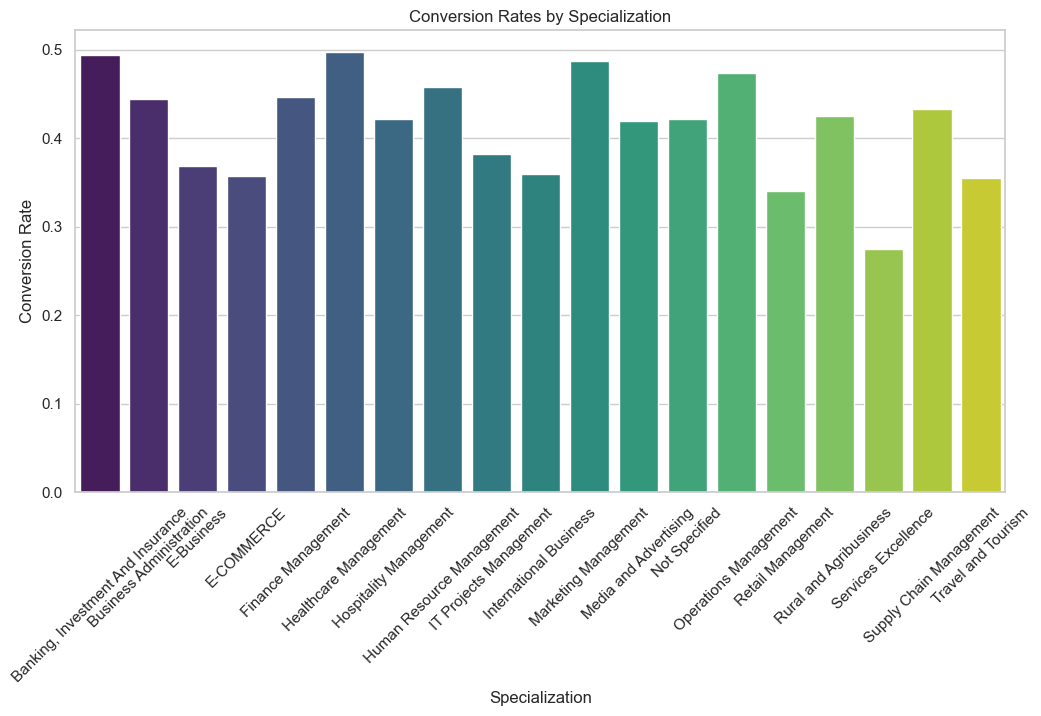

In [36]:

# Set plot style
sns.set(style='whitegrid')

# Plot the conversion rates
plt.figure(figsize=(12, 6))
sns.barplot(data=specialization_conversion, x='Specialization', y='Conversion Rate', palette='viridis')
plt.xticks(rotation=45)
plt.title('Conversion Rates by Specialization')
plt.xlabel('Specialization')
plt.ylabel('Conversion Rate')
plt.show()


In [37]:
# Define a threshold for low counts
low_count_threshold = 50

# Check counts of each specialization
specialization_counts = df_X['Specialization'].value_counts()

# Identify low-count specializations
low_count_specializations = specialization_counts[specialization_counts < low_count_threshold]
print("Low Count Specializations:")
print(low_count_specializations)


Low Count Specializations:
Specialization
Services Excellence    40
Name: count, dtype: int64


Specialization
Not Specified                        1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Other                                  40
Name: count, dtype: int64


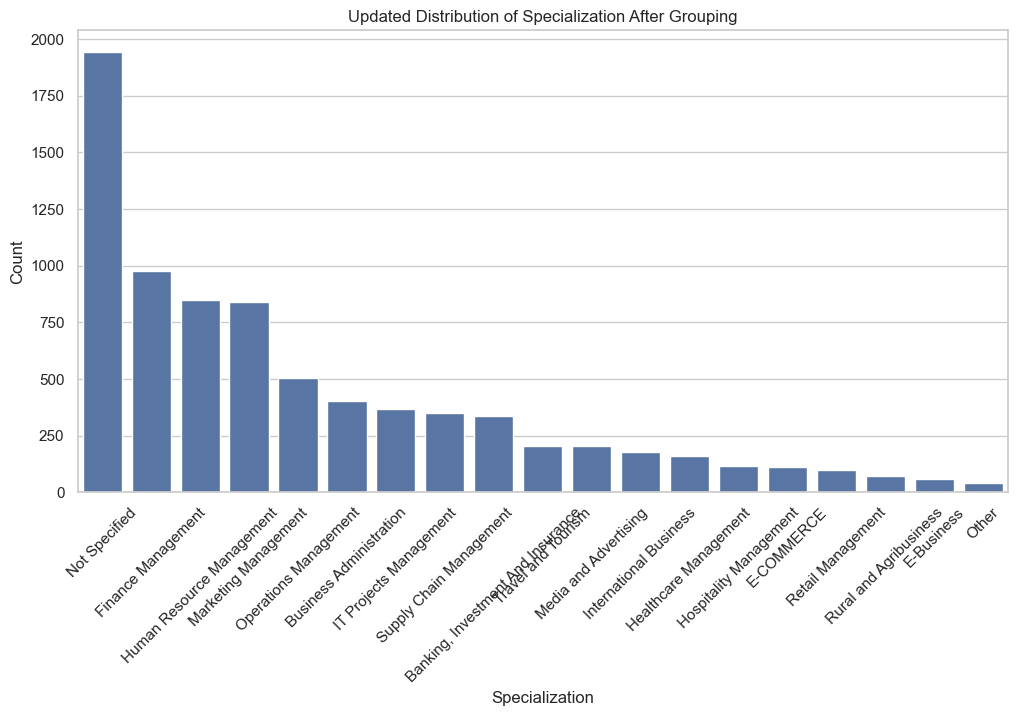

In [38]:
# Define a list of low-count specializations to group
low_count_specializations = ['Services Excellence']

# Replace low-count specializations with 'Other'
df_X['Specialization'] = df_X['Specialization'].apply(lambda x: 'Other' if x in low_count_specializations else x)

# Check the distribution after grouping
specialization_counts = df_X['Specialization'].value_counts()
print(specialization_counts)

# Visualize the updated distribution of specializations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df_X, x='Specialization', order=specialization_counts.index)
plt.xticks(rotation=45)
plt.title('Updated Distribution of Specialization After Grouping')
plt.ylabel('Count')
plt.show()


In [39]:
# Step 1: Check for Null Values
null_percentage = df_X.isnull().mean() * 100
print("Percentage of Null Values in Each Column:")
print(null_percentage[null_percentage > 0])  # Show only columns with null values


Percentage of Null Values in Each Column:
Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
City                                             15.367965
dtype: float64


In [40]:
# Listing all numeric columns in df_X
numeric_columns = df_X.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numeric_columns)


['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


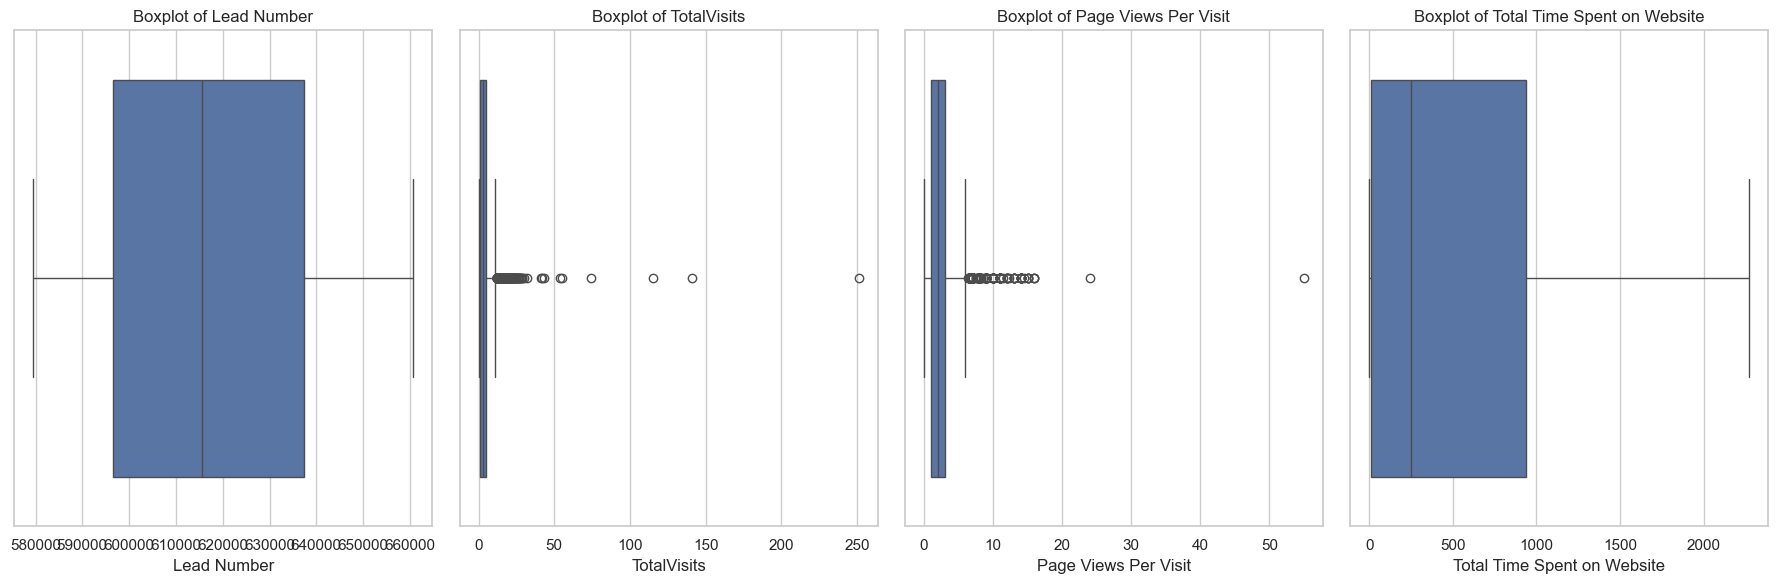

Outlier Counts:
{'Lead Number': 0, 'TotalVisits': 267, 'Page Views Per Visit': 360, 'Total Time Spent on Website': 0}


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns to check for outliers, including 'Lead Number'
numeric_columns = ['Lead Number', 'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

# Step 1: Visualize distributions using boxplots
plt.figure(figsize=(18, 6))
for i, column in enumerate(numeric_columns):
    plt.subplot(1, len(numeric_columns), i + 1)
    sns.boxplot(x=df_X[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

# Step 2: Check for outliers using IQR
outlier_info = {}
for column in numeric_columns:
    Q1 = df_X[column].quantile(0.25)
    Q3 = df_X[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_X[(df_X[column] < lower_bound) | (df_X[column] > upper_bound)]
    outlier_info[column] = len(outliers)

# Display outlier counts
print("Outlier Counts:")
print(outlier_info)


In [42]:
# Define thresholds for outliers
total_visits_threshold = df_X['TotalVisits'].quantile(0.99)
page_views_threshold = df_X['Page Views Per Visit'].quantile(0.99)

# Check conversion rate for high TotalVisits
high_visits_conversion = df_X[df_X['TotalVisits'] > total_visits_threshold]['Converted'].mean()

# Check conversion rate for high Page Views Per Visit
high_page_views_conversion = df_X[df_X['Page Views Per Visit'] > page_views_threshold]['Converted'].mean()

# Display the conversion rates
print(f"Conversion rate for high TotalVisits outliers: {high_visits_conversion}")
print(f"Conversion rate for high Page Views Per Visit outliers: {high_page_views_conversion}")


Conversion rate for high TotalVisits outliers: 0.43373493975903615
Conversion rate for high Page Views Per Visit outliers: 0.44


### Log Transformation of `TotalVisits` and `Page Views Per Visit`

#### **Reason for Applying Log Transformation**:
1. **Outliers are Relevant**:
   - Based on the analysis, the outliers in `TotalVisits` and `Page Views Per Visit` represent highly engaged users who are likely to convert. According to the data dictionary, these features are important indicators of user interest and engagement, making the outliers valuable. Therefore, completely removing them would result in a loss of critical information.

2. **Alternative to Capping**:
   - Capping the outliers would reduce their influence by limiting them to a certain threshold, which could result in the loss of valuable behavioral data. Since the outliers are relevant to user engagement, we opted for **log transformation** instead. This compresses the extreme values without removing them entirely, preserving the important patterns while ensuring that the model isn’t disproportionately affected by these large values.

### Conclusion:
Log transformation was applied as a method to handle outliers effectively, ensuring that valuable data related to user engagement was retained and not lost due to capping.


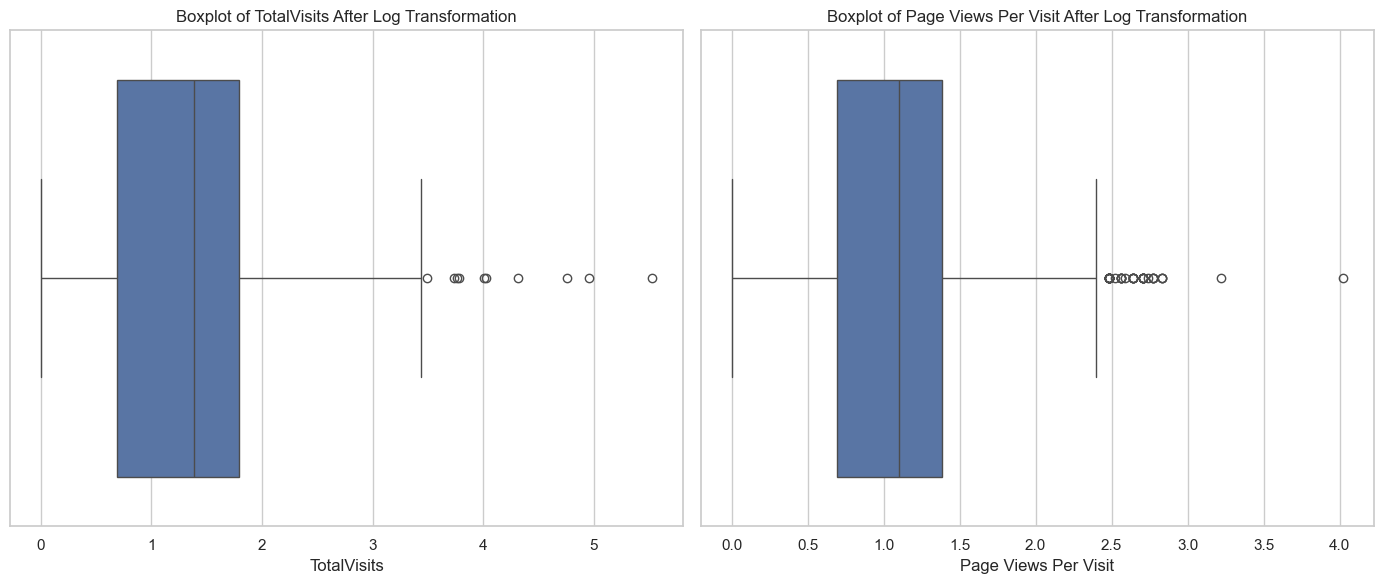

In [44]:

# Apply log transformation to TotalVisits and Page Views Per Visit
df_X['TotalVisits'] = np.log1p(df_X['TotalVisits'])  # log1p is used to handle zero values
df_X['Page Views Per Visit'] = np.log1p(df_X['Page Views Per Visit'])

# Optional: Check the distribution after transformation

plt.figure(figsize=(14, 6))

# Boxplot for TotalVisits after log transformation
plt.subplot(1, 2, 1)
sns.boxplot(x=df_X['TotalVisits'])
plt.title('Boxplot of TotalVisits After Log Transformation')

# Boxplot for Page Views Per Visit after log transformation
plt.subplot(1, 2, 2)
sns.boxplot(x=df_X['Page Views Per Visit'])
plt.title('Boxplot of Page Views Per Visit After Log Transformation')

plt.tight_layout()
plt.show()


# Imputation Strategy Justification

In the previous steps, we conducted a thorough analysis of the categorical and numerical features of our dataset, focusing on missing values and their potential impact on model performance.

## Why Mode Imputation for Categorical Variables?
- **Mode Imputation**: We chose to impute categorical variables using the mode (the most frequent value) because it helps maintain the overall distribution of the data without introducing bias. This is particularly important in features where certain categories significantly dominate, such as `Lead Source` and `Last Activity`.
- **Handling Imbalance**: Given the observed imbalances in categories, using mode ensures that the common categories are preserved while mitigating the impact of missing data on the overall analysis.

### Imbalances Addressed Before Imputation:
1. **Lead Origin**: Dominated by 'Landing Page Submission', indicating a need to balance representation in modeling.
2. **Lead Source**: Concentration in a few categories (e.g., Google and Direct Traffic) suggested potential underrepresentation of less frequent sources, requiring strategies to maintain balance.
3. **Do Not Email / Do Not Call**: Severe imbalance (e.g., 8,506 No vs. 734 Yes) necessitated careful handling rather than simple imputation to avoid skewing the results.
4. **Last Activity**: Top activities showed a concentration towards a few actions, which could lead to overfitting if not addressed properly.
5. **Country Distribution**: Heavy skew towards India (6,492 leads) highlighted the need for aggregation to provide more meaningful insights.
6. **Specialization**: The presence of 'Select' and low-count specializations required grouping to reduce noise and improve model interpretability.
7. **Current Occupation**: Predominantly 'Unemployed' (5,600 leads), indicating a potential bias in representation that needed consideration.



In [46]:
# Step 1: Imputation of Missing Values

# Define categorical columns
categorical_columns = ['Lead Source', 'Last Activity', 'Country', 'Specialization', 
                       'How did you hear about X Education', 'What is your current occupation', 
                       'What matters most to you in choosing a course', 'Lead Profile', 'City']

# Impute missing values for categorical variables with mode
for column in categorical_columns:
    df_X[column] = df_X[column].fillna(df_X[column].mode()[0])  # Mode imputation

# Define numerical columns
numerical_columns = ['TotalVisits', 'Page Views Per Visit']

# Impute missing values for numerical variables with median
for column in numerical_columns:
    df_X[column] = df_X[column].fillna(df_X[column].median())  # Median imputation

# Step 2: Verify the Imputation
# Check for remaining null values
null_values = df_X.isnull().sum()
print("Remaining Null Values:\n", null_values[null_values > 0])


Remaining Null Values:
 Series([], dtype: int64)


In [47]:
df_X.shape

(9240, 26)

In [48]:
# Change settings to display all columns
pd.set_option('display.max_columns', None)

# Show the head of your DataFrame
print(df_X.head(20))

# Optionally, revert to default settings if needed
pd.reset_option('display.max_columns')


                             Prospect ID  Lead Number  \
0   7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1   2a272436-5132-4136-86fa-dcc88c88f482       660728   
2   8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3   0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4   3256f628-e534-4826-9d63-4a8b88782852       660681   
5   2058ef08-2858-443e-a01f-a9237db2f5ce       660680   
6   9fae7df4-169d-489b-afe4-0f3d752542ed       660673   
7   20ef72a2-fb3b-45e0-924e-551c5fa59095       660664   
8   cfa0128c-a0da-4656-9d47-0aa4e67bf690       660624   
9   af465dfc-7204-4130-9e05-33231863c4b5       660616   
10  2a369e35-ca95-4ca9-9e4f-9d27175aa320       660608   
11  9bc8ce93-6144-49e0-9f9d-080fc980f83c       660570   
12  8bf76a52-2478-476b-8618-1688e07874ad       660562   
13  88867067-3750-4753-8d33-1c7d1db53b5e       660558   
14  a8531c22-fcf1-48f8-a711-fb5abf98ad87       660553   
15  25f4ac14-ff4b-4cd2-9c61-b44c85e19c8f       660547   
16  3abb7c77-1634-4083-9a9f-861

Correlation with Converted:
 Converted                      1.000000
TotalVisits                    0.021099
Total Time Spent on Website    0.362483
Page Views Per Visit          -0.013861
Name: Converted, dtype: float64


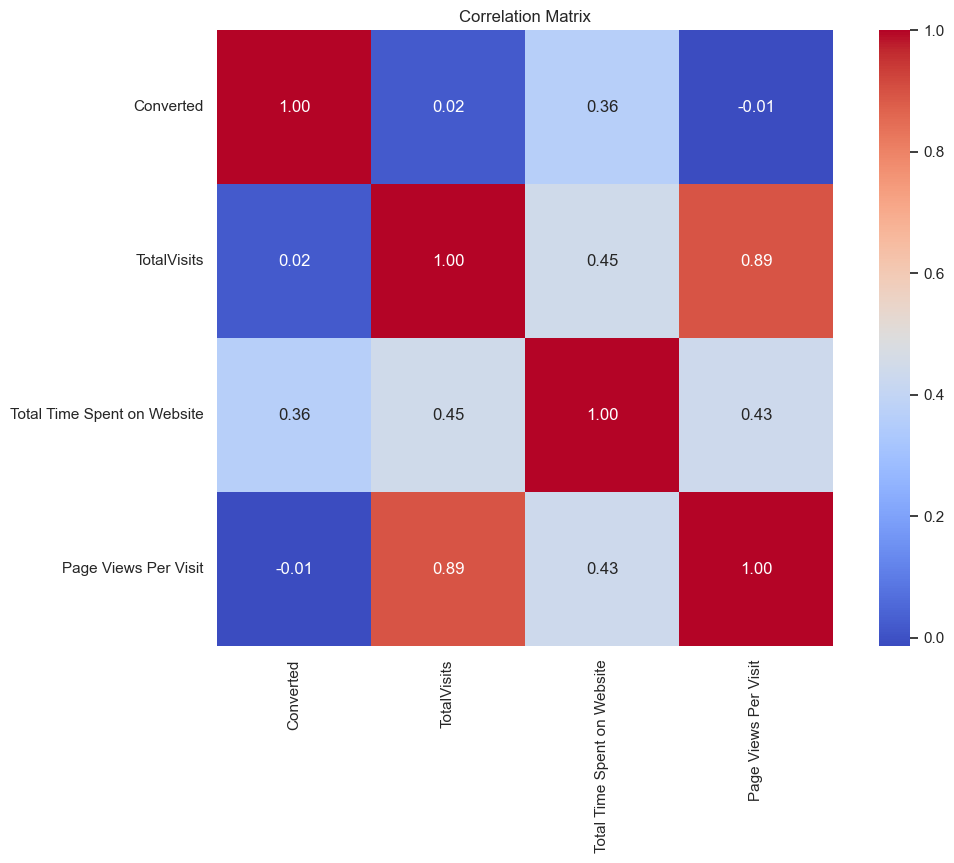

In [49]:
# Step 2: Drop ID-like columns from the DataFrame for correlation calculation
id_columns = ['Prospect ID', 'Lead Number']
df_X_corr = df_X.drop(columns=id_columns)

# Step 3: Select only numerical columns for correlation calculation
numerical_columns = df_X_corr.select_dtypes(include=['number']).columns
df_X_numerical = df_X_corr[numerical_columns]

# Step 4: Calculate the correlation matrix
correlation_matrix = df_X_numerical.corr()

# Step 5: Select correlations with the target variable 'Converted'
converted_correlation = correlation_matrix['Converted']

# Step 6: Display the correlation values
print("Correlation with Converted:\n", converted_correlation)

# Step 7: Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [50]:
# Define ID-like columns
id_columns = ['Prospect ID', 'Lead Number']

# Check for duplicates in ID-like columns
duplicates = {}
for column in id_columns:
    duplicate_count = df_X[column].duplicated().sum()
    duplicates[column] = duplicate_count

# Display the duplicate counts for each ID-like column
print("Duplicate Counts in ID-like Columns:\n", duplicates)


Duplicate Counts in ID-like Columns:
 {'Prospect ID': 0, 'Lead Number': 0}


# uni variate analysis 


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define numeric and object columns, excluding ID-like columns
numeric_features = df_X.select_dtypes(include=['number']).columns.tolist()
object_features = df_X.select_dtypes(include=['object']).columns.tolist()

# Exclude ID-like features
id_like_columns = ['Prospect ID', 'Lead Number']  # Add other ID-like columns if necessary
numeric_features = [col for col in numeric_features if col not in id_like_columns]
object_features = [col for col in object_features if col not in id_like_columns]

print("Filtered Numeric Features:", numeric_features)
print("Filtered Object Features:", object_features)


Filtered Numeric Features: ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
Filtered Object Features: ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Lead Profile', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity', 'Continent']


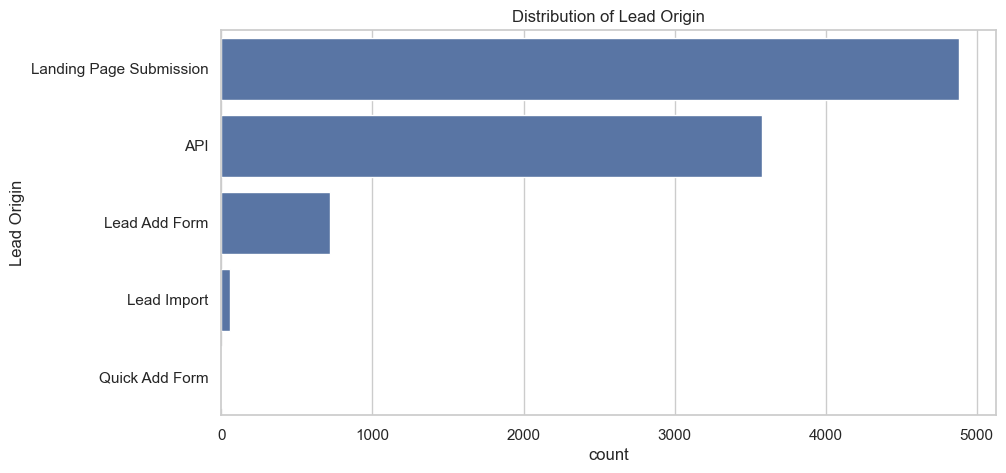

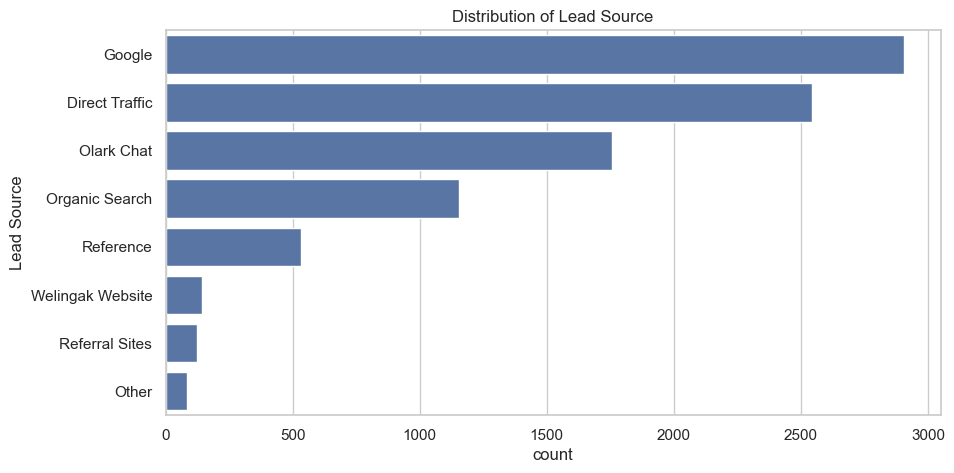

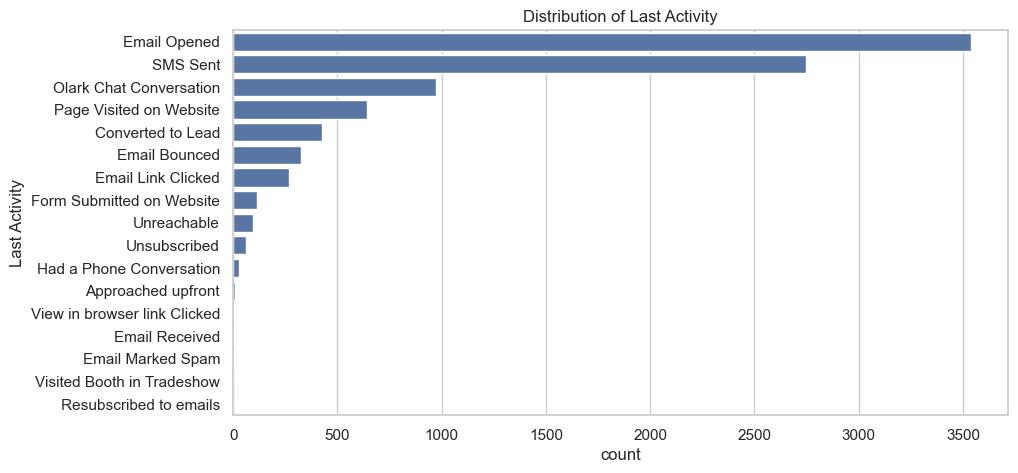

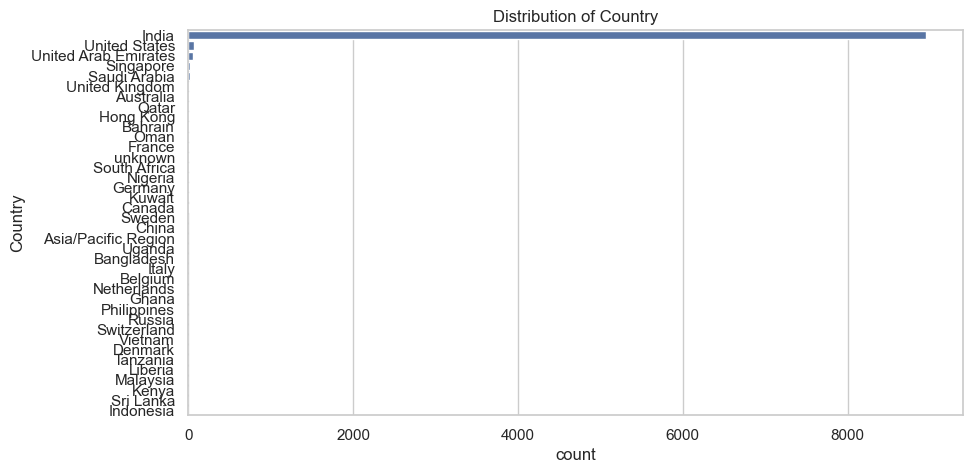

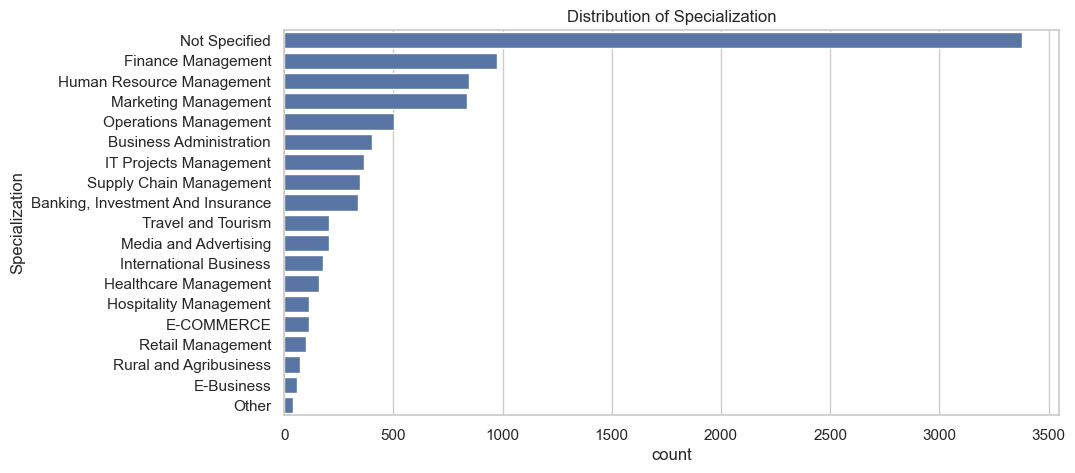

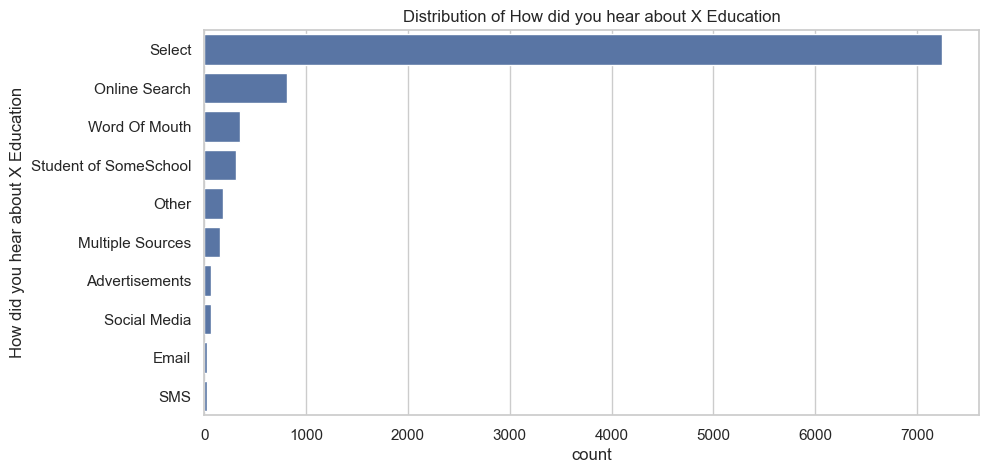

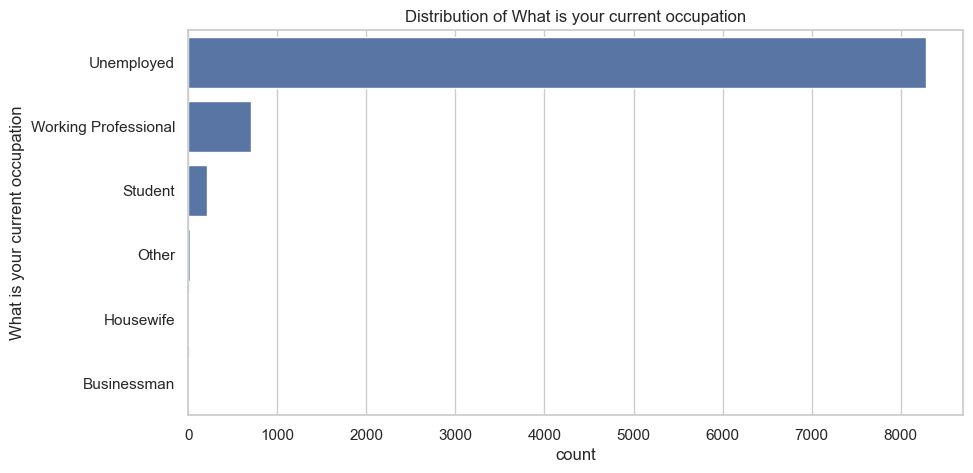

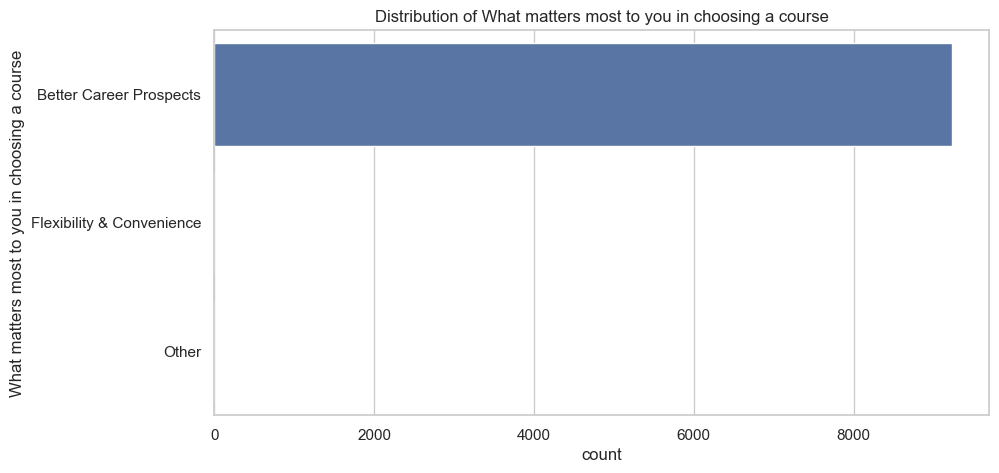

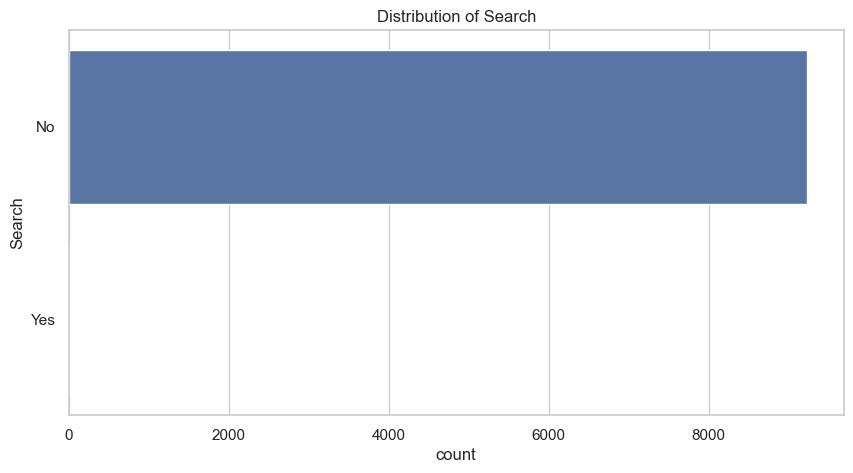

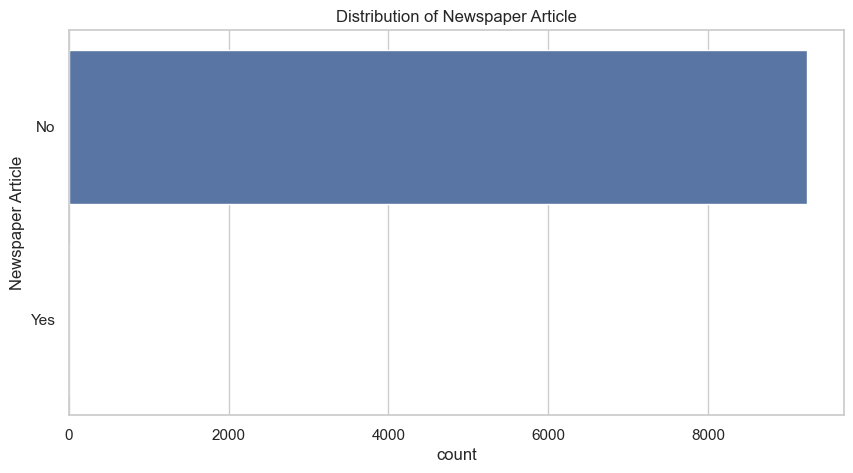

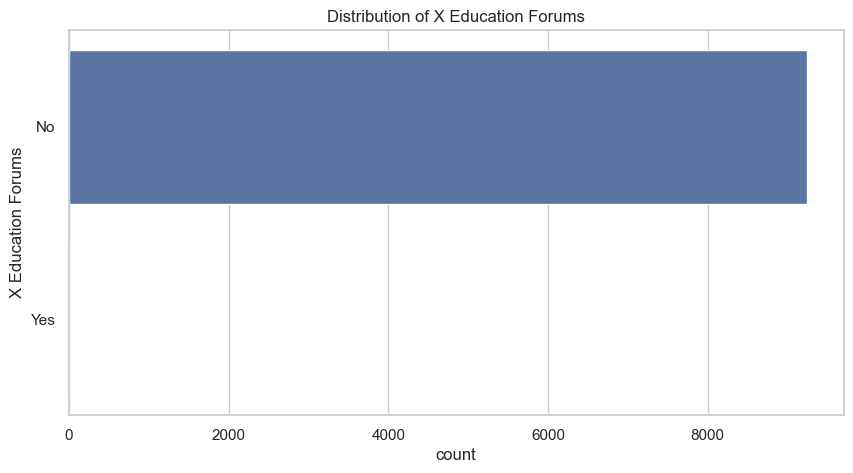

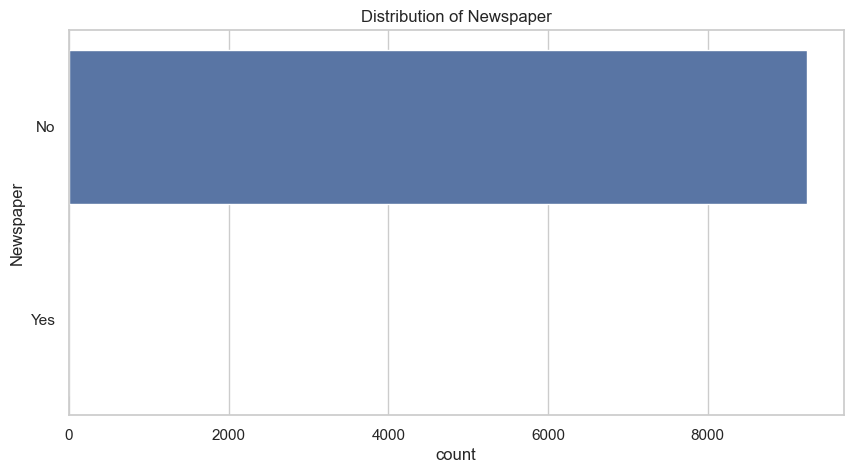

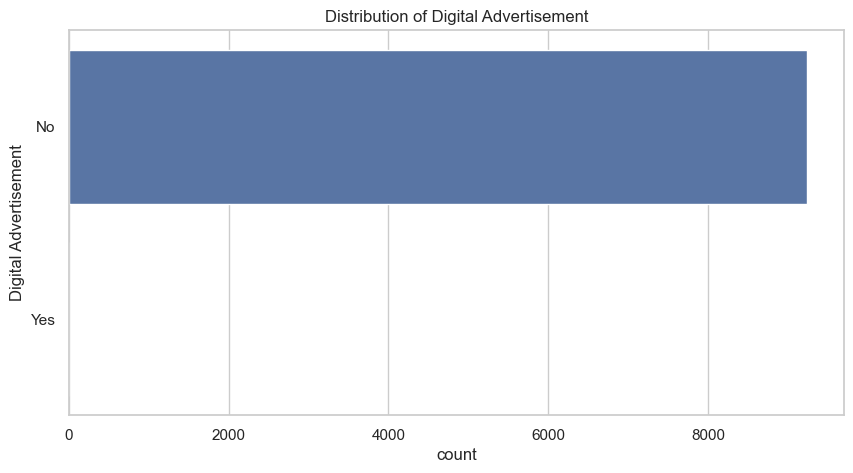

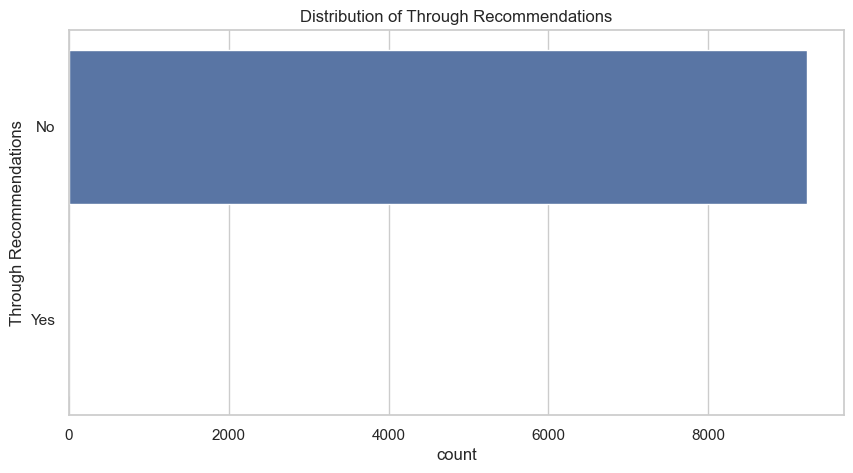

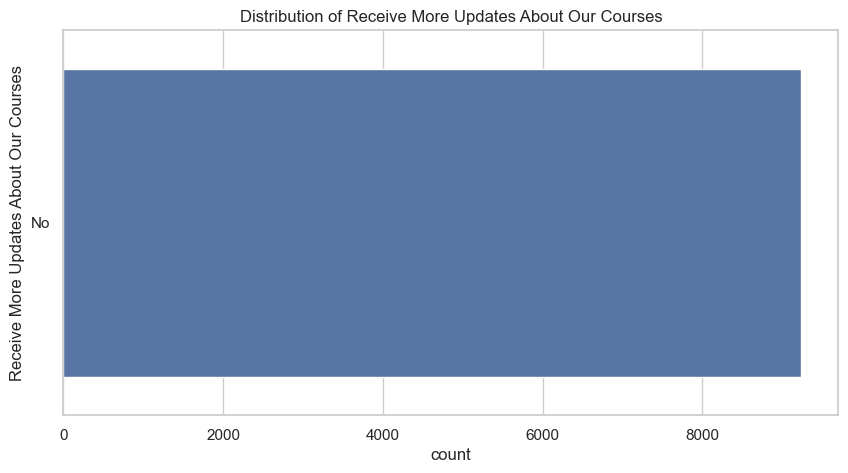

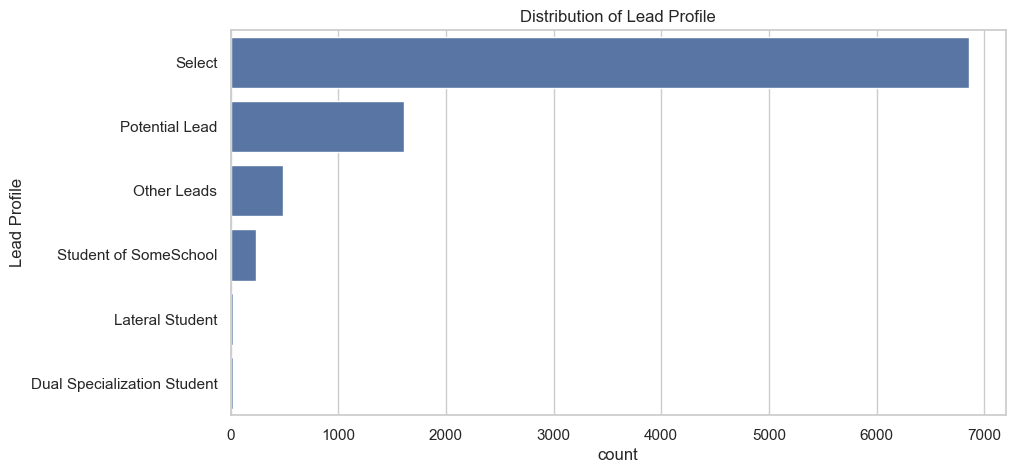

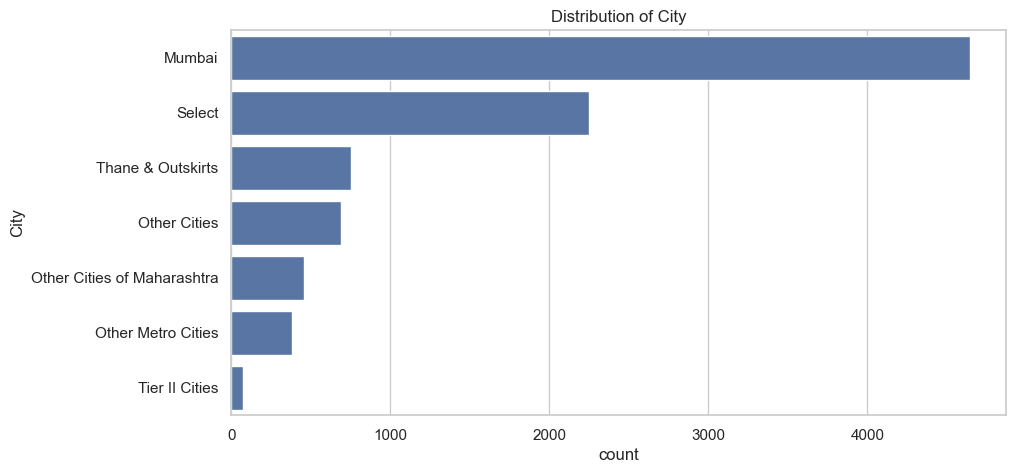

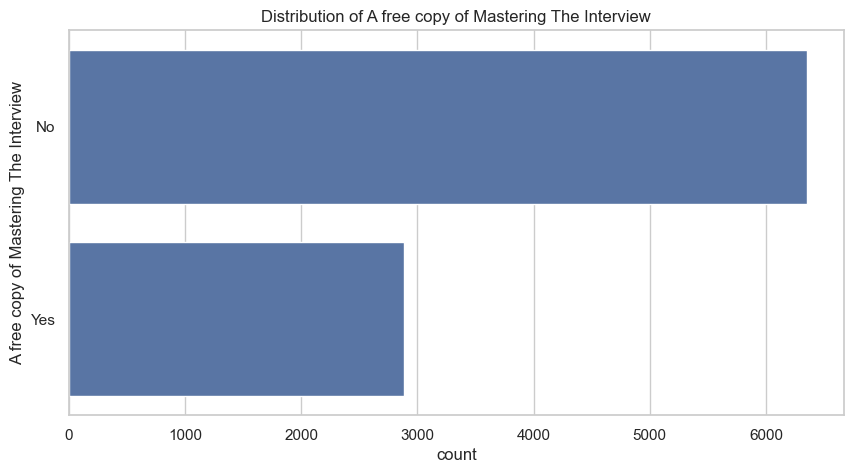

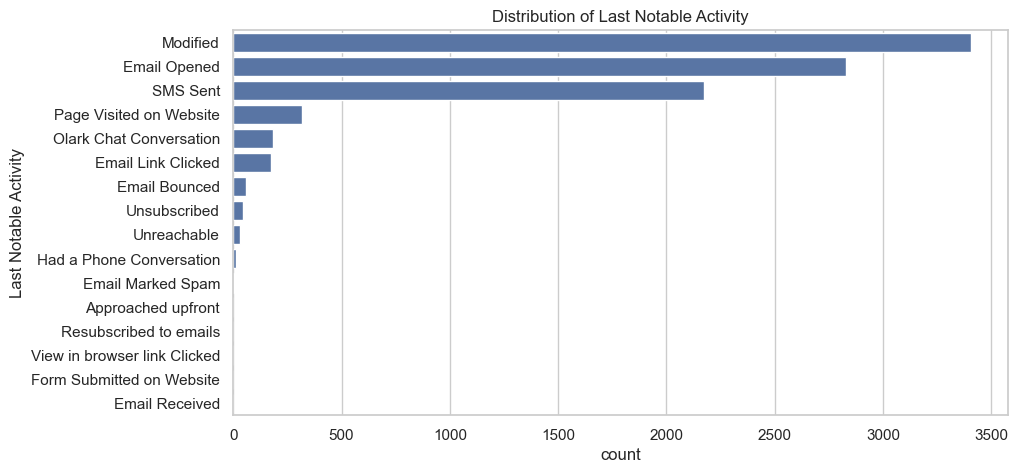

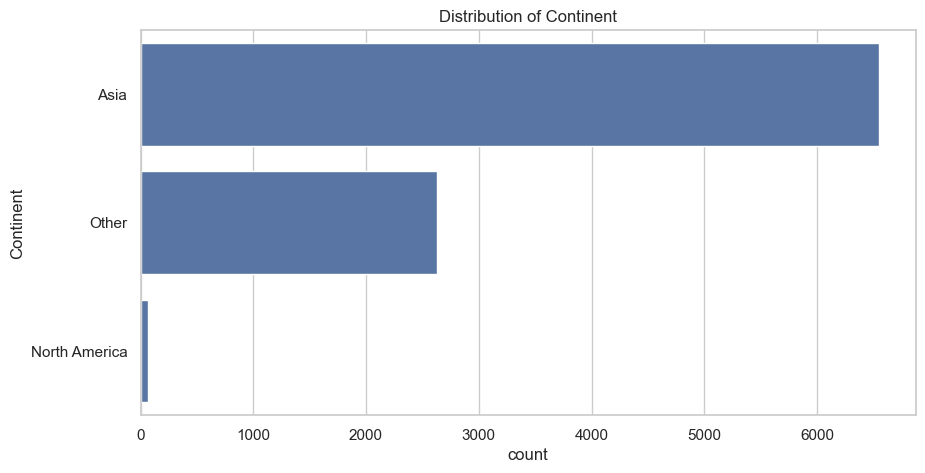

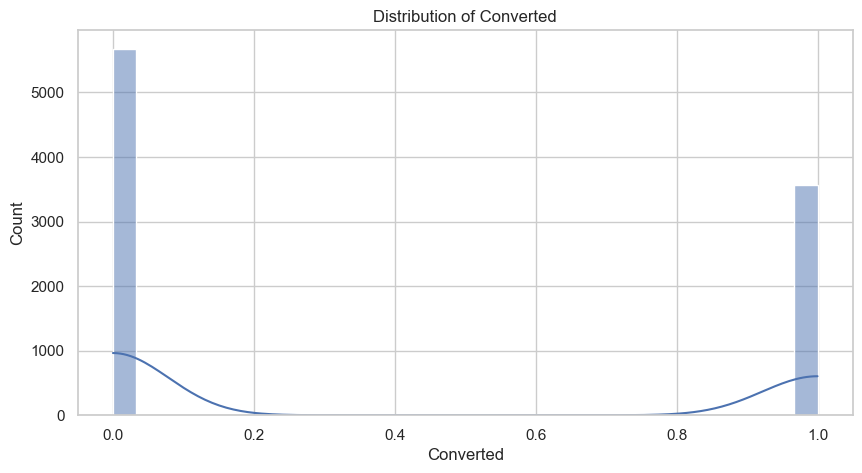

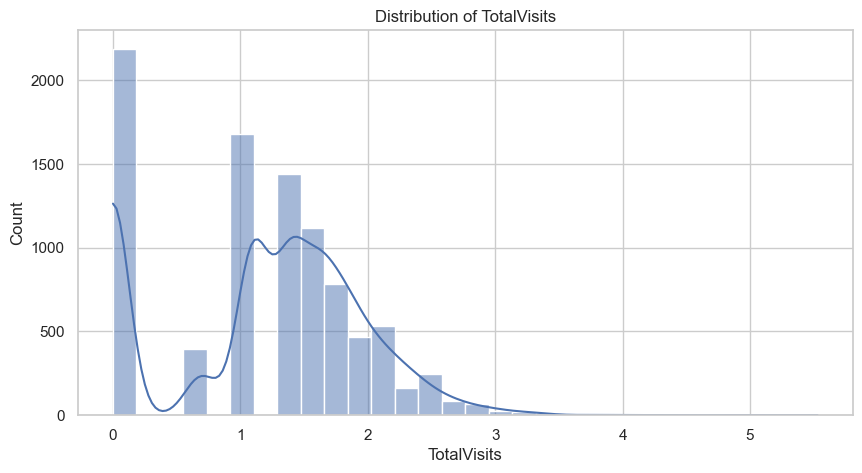

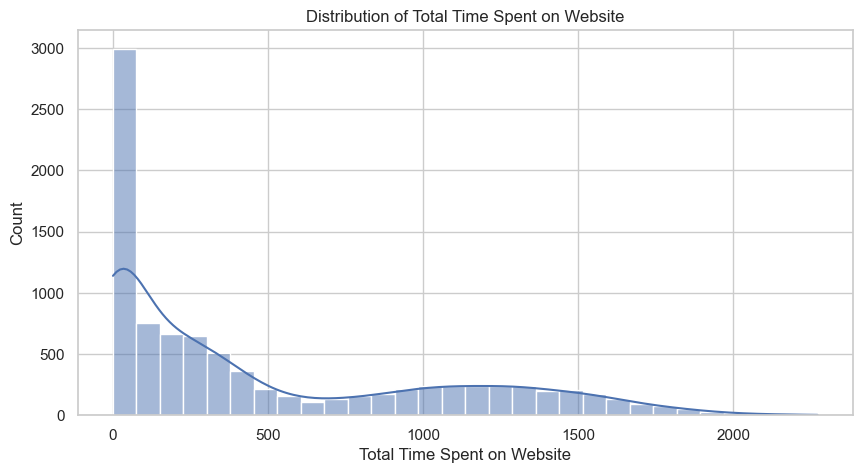

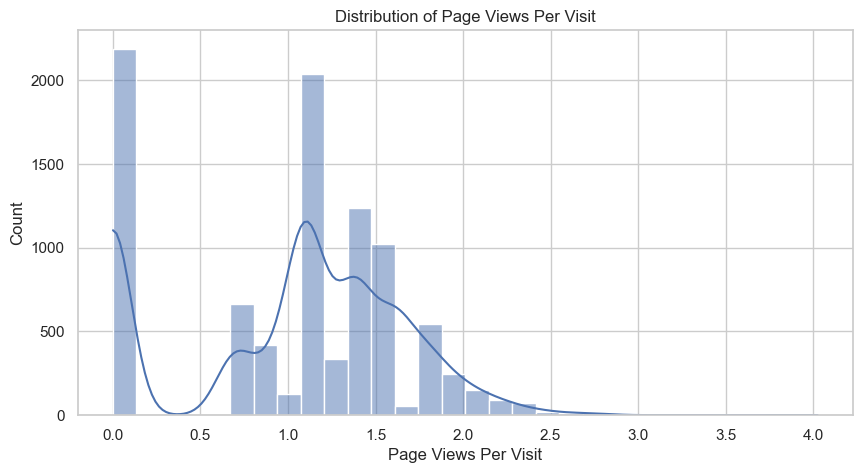

In [53]:
# Univariate Analysis
def univariate_analysis(df, numeric_features, object_features):
    # Analyze Categorical Features
    for column in object_features:
        plt.figure(figsize=(10, 5))
        sns.countplot(y=column, data=df, order=df[column].value_counts().index)
        plt.title(f'Distribution of {column}')
        plt.show()

    # Analyze Numerical Features
    for column in numeric_features:
        plt.figure(figsize=(10, 5))
        sns.histplot(df[column], bins=30, kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()

# Perform Univariate Analysis
univariate_analysis(df_X, numeric_features, object_features)


In [54]:
# List of binary features to check for imbalance
binary_features = [
    'How did you hear about X Education',
    'What is your current occupation',
    'What matters most to you in choosing a course',
    'Search',
    'Newspaper Article',
    'X Education Forums',
    'Digital Advertisement',
    'Through Recommendations',
    'Receive More Updates About Our Courses'
]

# Check imbalance for each binary feature
for feature in binary_features:
    value_counts = df_X[feature].value_counts(normalize=True) * 100  # Get percentage
    print(f"\n{feature} Imbalance:\n{value_counts}")



How did you hear about X Education Imbalance:
How did you hear about X Education
Select                   78.463203
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Other                     2.012987
Multiple Sources          1.645022
Advertisements            0.757576
Social Media              0.725108
Email                     0.281385
SMS                       0.248918
Name: proportion, dtype: float64

What is your current occupation Imbalance:
What is your current occupation
Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: proportion, dtype: float64

What matters most to you in choosing a course Imbalance:
What matters most to you in choosing a course
Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
N

# DROP 3
### Reasons for Dropping Certain Features

In our analysis, we identified several categorical features that exhibited extreme imbalances, rendering them ineffective for predictive modeling. The decision to drop these features was based on the following criteria:

1. **What is your current occupation**:
   - **Imbalance**: 89.72% of responses were "Unemployed."
   - **Reason for Dropping**: The overwhelming majority in one category limits its predictive power. It may not contribute meaningfully to the model.

2. **What matters most to you in choosing a course**:
   - **Imbalance**: 99.97% indicated "Better Career Prospects."
   - **Reason for Dropping**: The lack of variability means this feature does not provide valuable insights for the model.

3. **Search**:
   - **Imbalance**: 99.85% responded "No."
   - **Reason for Dropping**: Such a high concentration of one value indicates minimal impact on model performance.

4. **Newspaper Article**:
   - **Imbalance**: 99.98% indicated "No."
   - **Reason for Dropping**: Similar to "Search," this feature lacks diversity and does not enhance predictive capabilities.

5. **X Education Forums**:
   - **Imbalance**: 99.99% responded "No."
   - **Reason for Dropping**: With such a high majority in one category, it does not provide meaningful data for modeling.

6. **Digital Advertisement**:
   - **Imbalance**: 99.96% indicated "No."
   - **Reason for Dropping**: The lack of variability suggests this feature does not contribute to the model.

7. **Through Recommendations**:
   - **Imbalance**: 99.92% responded "No."
   - **Reason for Dropping**: This feature's lack of variability makes it ineffective for analysis.

8. **Receive More Updates About Our Courses**:
   - **Imbalance**: 100% indicated "No."
   - **Reason for Dropping**: The absence of diversity means this feature offers no predictive value.

Overall, dropping these features helps to streamline the dataset, enhancing the quality and efficiency of the model by focusing on variables that contribute meaningful information.


In [56]:
# List of columns to drop
columns_to_drop = [
    'What matters most to you in choosing a course',
    'Search',
    'Newspaper Article',
    'X Education Forums',
    'Digital Advertisement',
    'Through Recommendations',
    'Receive More Updates About Our Courses',
    'What is your current occupation'
]

# Drop the columns from the DataFrame
df_X.drop(columns=columns_to_drop, inplace=True)

# Verify the changes
print("Remaining columns after dropping:", df_X.columns)


Remaining columns after dropping: Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'Newspaper', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity', 'Continent'],
      dtype='object')


In [57]:
df_X.shape

(9240, 18)

In [58]:
df_X.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Converted  TotalVisits  Total Time Spent on Website  \
0      Olark Chat          0     0.000000                            0   
1  Organic Search          0     1.791759                          674   
2  Direct Traffic          1     1.098612                         1532   
3  Direct Traffic          0     0.693147                          305   
4          Google          1     1.098612                         1428   

   Page Views Per Visit            Last Activity Country  \
0              0.000000  Page Visited on Website   India   
1              1.252763             Email Opened   India   
2              1.098612             Email Opened   India   
3              0.693147              Unreachable   India   
4              0.693147        Converted to Lead   India   

            Specialization How did you hear about X Education Newspaper  \
0            Not Specified                             Select        No   
1            Not Specified                             Select        No   
2  Business Administration                             Select        No   
3    Media and Advertising                      Word Of Mouth        No   
4            Not Specified                              Other        No   

     Lead Profile    City A free copy of Mastering The Interview  \
0          Select  Select                                     No   
1          Select  Select                                     No   
2  Potential Lead  Mumbai                                    Yes   
3          Select  Mumbai                                     No   
4          Select  Mumbai                                     No   

  Last Notable Activity Continent  
0              Modified     Other  
1          Email Opened      Asia  
2          Email Opened      Asia  
3              Modified      Asia  
4              Modified      Asia

Correlation with Converted:
 Converted                      1.000000
TotalVisits                    0.021099
Total Time Spent on Website    0.362483
Page Views Per Visit          -0.013861
Name: Converted, dtype: float64


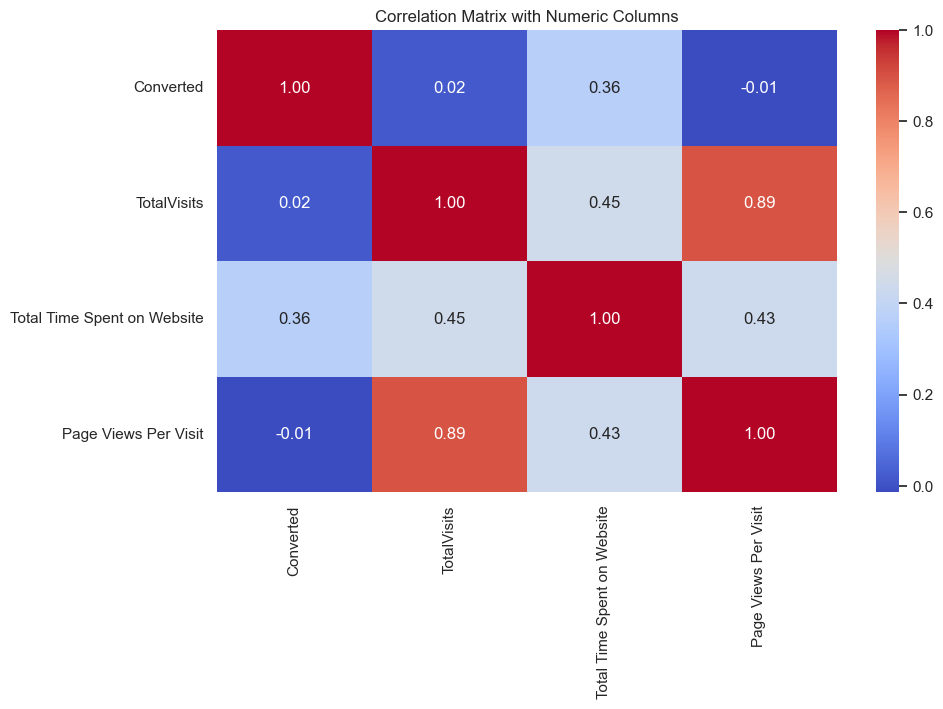

In [59]:

# Step 1: Drop irrelevant ID-like columns
id_columns = ['Prospect ID', 'Lead Number']
df_X_numeric = df_X.drop(columns=id_columns)

# Step 2: Select only numeric columns
numeric_columns = df_X_numeric.select_dtypes(include=['float64', 'int64']).columns

# Step 3: Calculate the correlation matrix only for numeric columns
correlation_matrix = df_X_numeric[numeric_columns].corr()

# Step 4: Select correlations with the target variable 'Converted'
converted_correlation = correlation_matrix['Converted']

# Step 5: Display the correlation values
print("Correlation with Converted:\n", converted_correlation)

# Step 6: Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix with Numeric Columns')
plt.show()


C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\4913039.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')


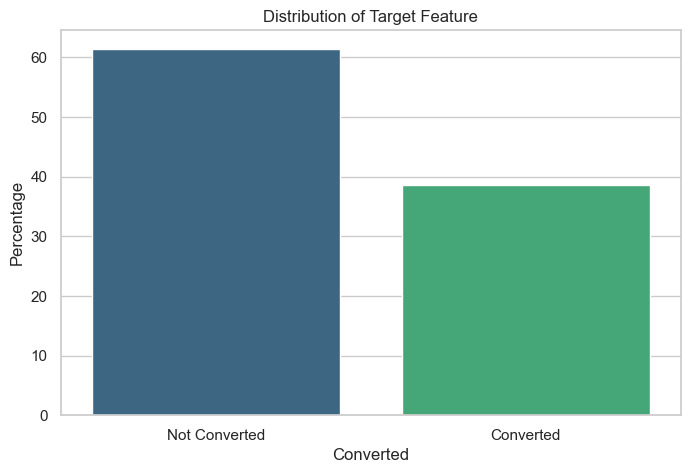

Converted
0    61.461039
1    38.538961
Name: proportion, dtype: float64


In [60]:


target_feature = 'Converted'  # Replace with your target column name

# Count the occurrences of each category in the target feature
target_counts = df_X[target_feature].value_counts(normalize=True) * 100

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')
plt.title('Distribution of Target Feature')
plt.xlabel(target_feature)
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['Not Converted', 'Converted'], rotation=0)
plt.show()

# Display target distribution
print(target_counts)


C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\4235389899.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


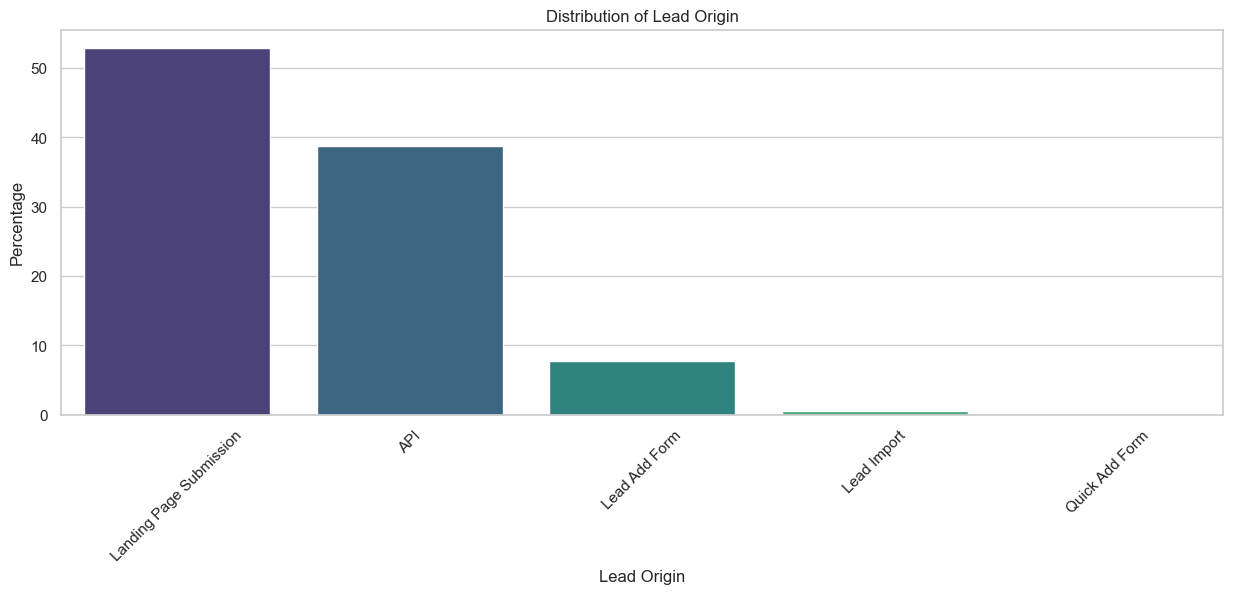

Lead Origin Distribution:
Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: proportion, dtype: float64



C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\4235389899.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


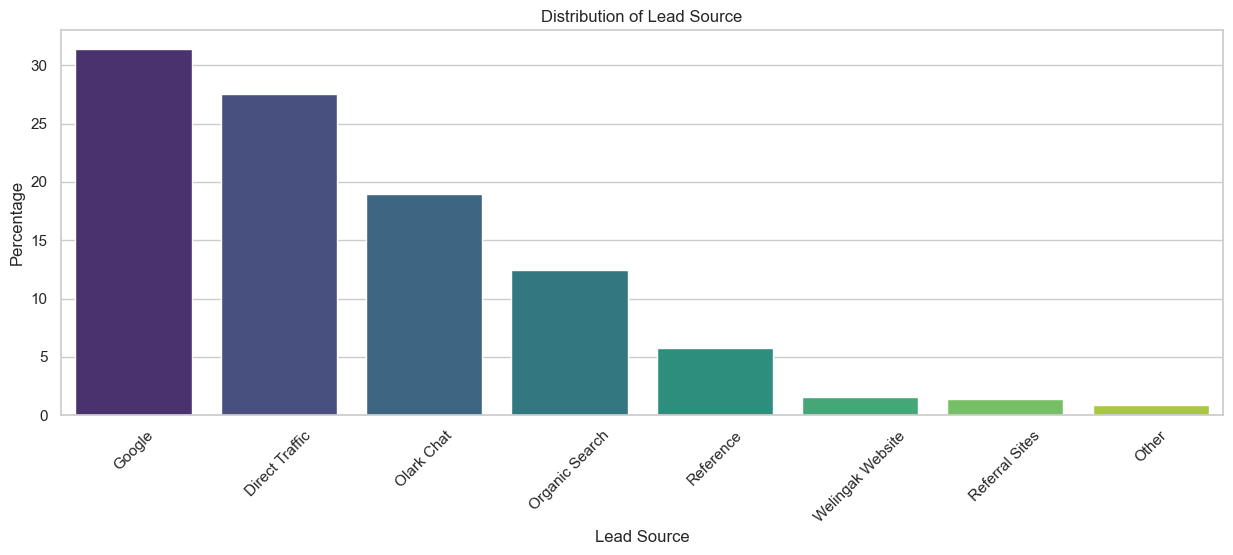

C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\4235389899.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


Lead Source Distribution:
Lead Source
Google              31.428571
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Other                0.898268
Name: proportion, dtype: float64



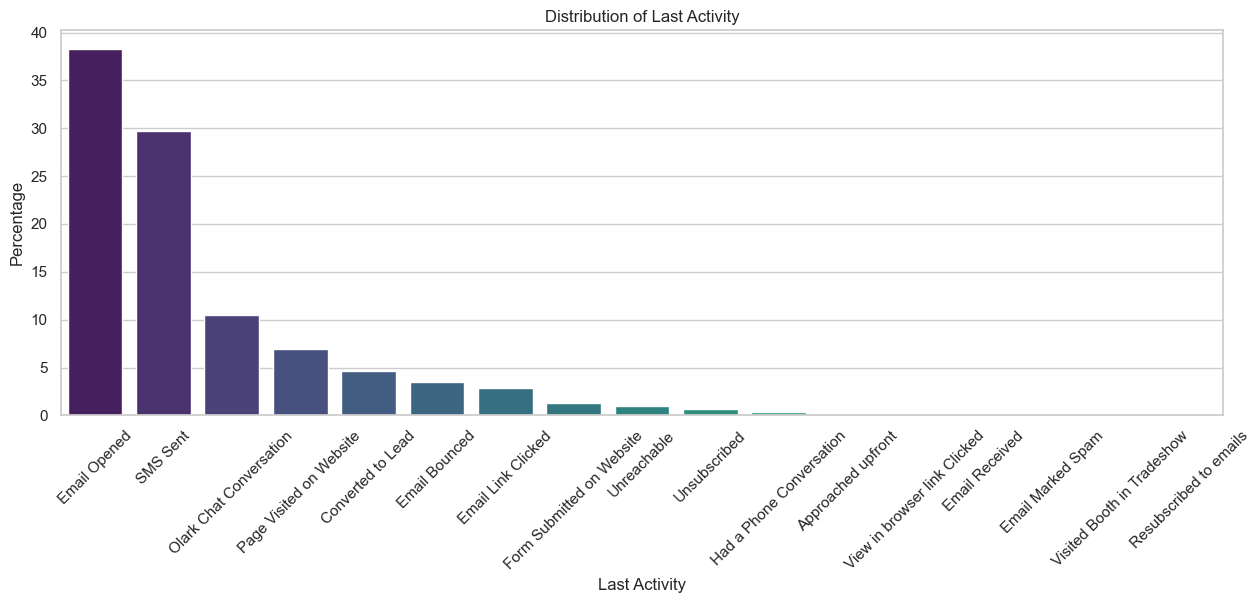

C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\4235389899.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


Last Activity Distribution:
Last Activity
Email Opened                    38.311688
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: proportion, dtype: float64



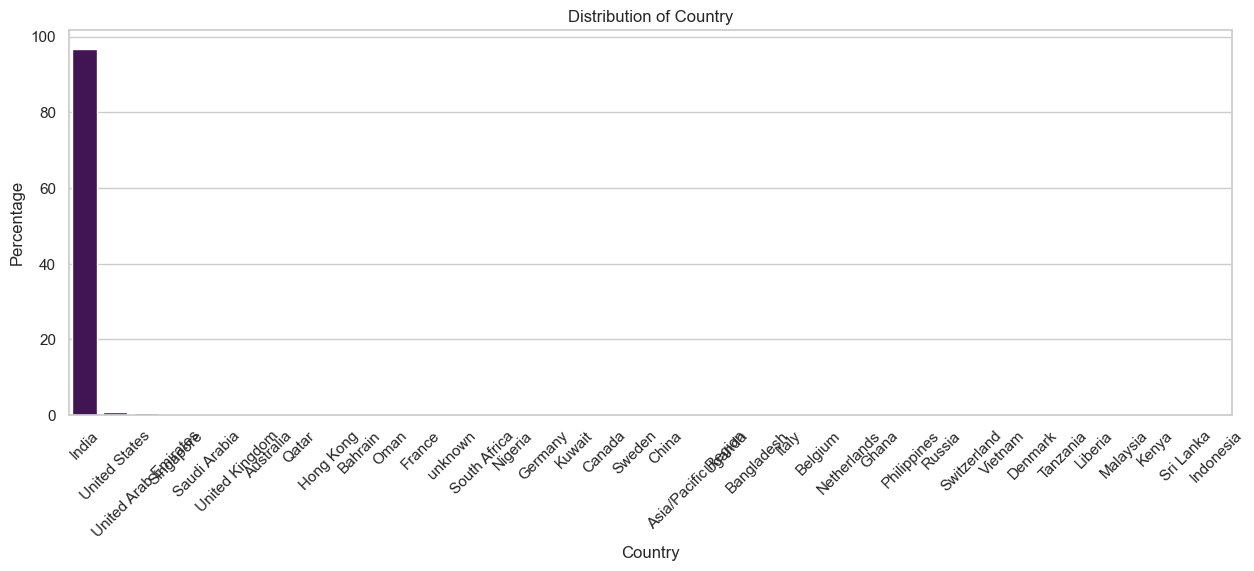

Country Distribution:
Country
India                   96.893939
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia            

C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\4235389899.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


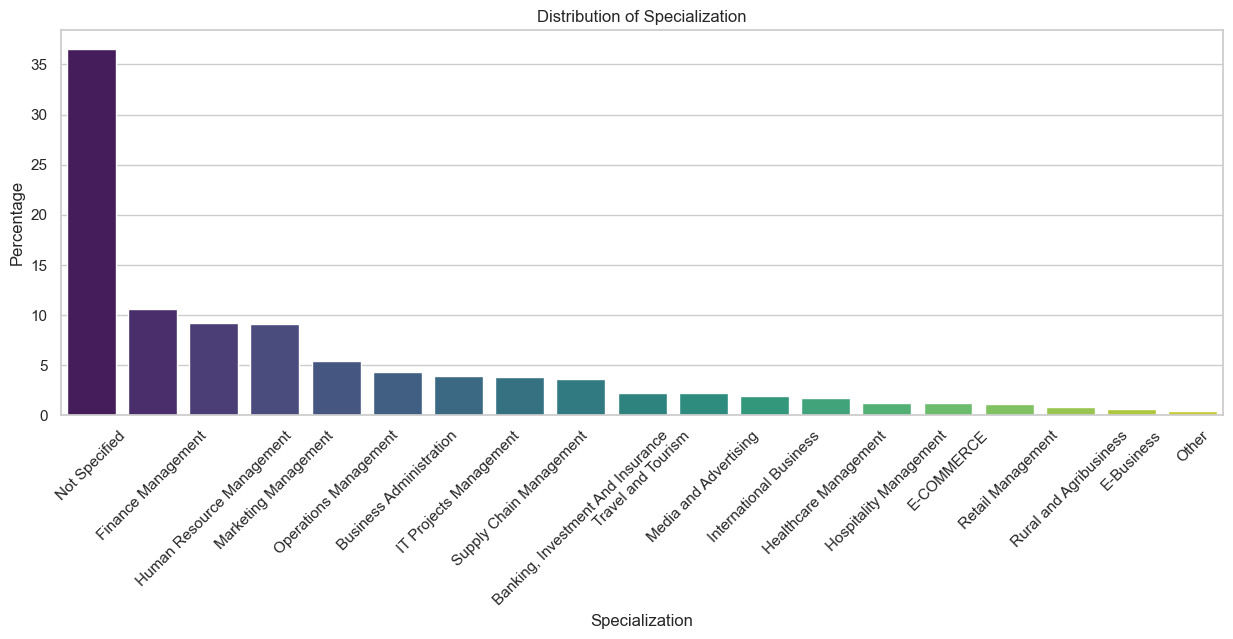

Specialization Distribution:
Specialization
Not Specified                        36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Other                                 0.432900
Name: proportion, dtype: float64



C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\4235389899.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


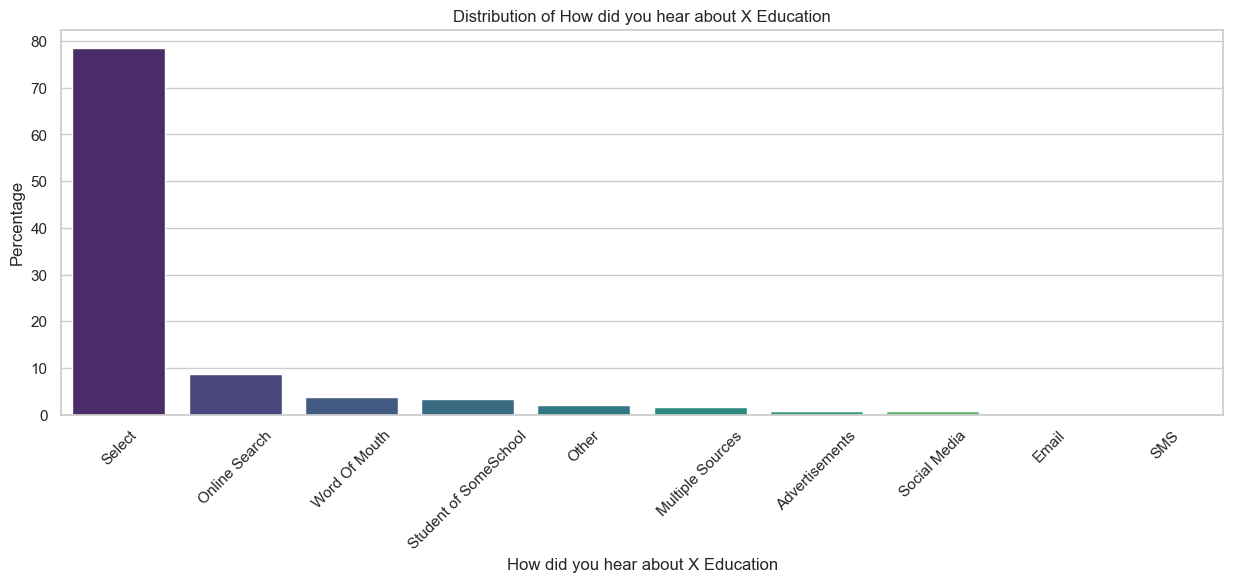

How did you hear about X Education Distribution:
How did you hear about X Education
Select                   78.463203
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Other                     2.012987
Multiple Sources          1.645022
Advertisements            0.757576
Social Media              0.725108
Email                     0.281385
SMS                       0.248918
Name: proportion, dtype: float64



C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\4235389899.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


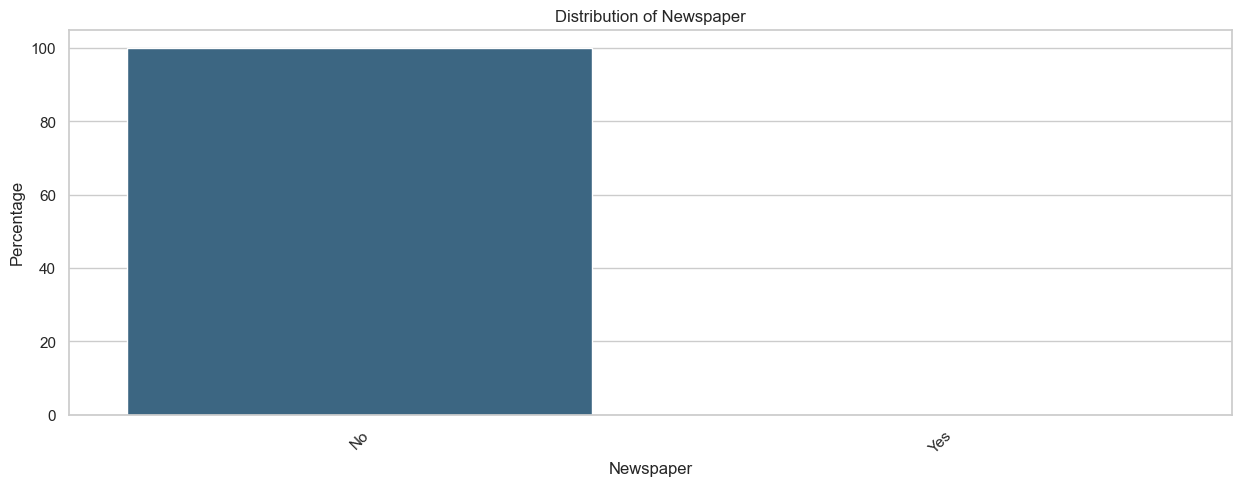

Newspaper Distribution:
Newspaper
No     99.989177
Yes     0.010823
Name: proportion, dtype: float64



C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\4235389899.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


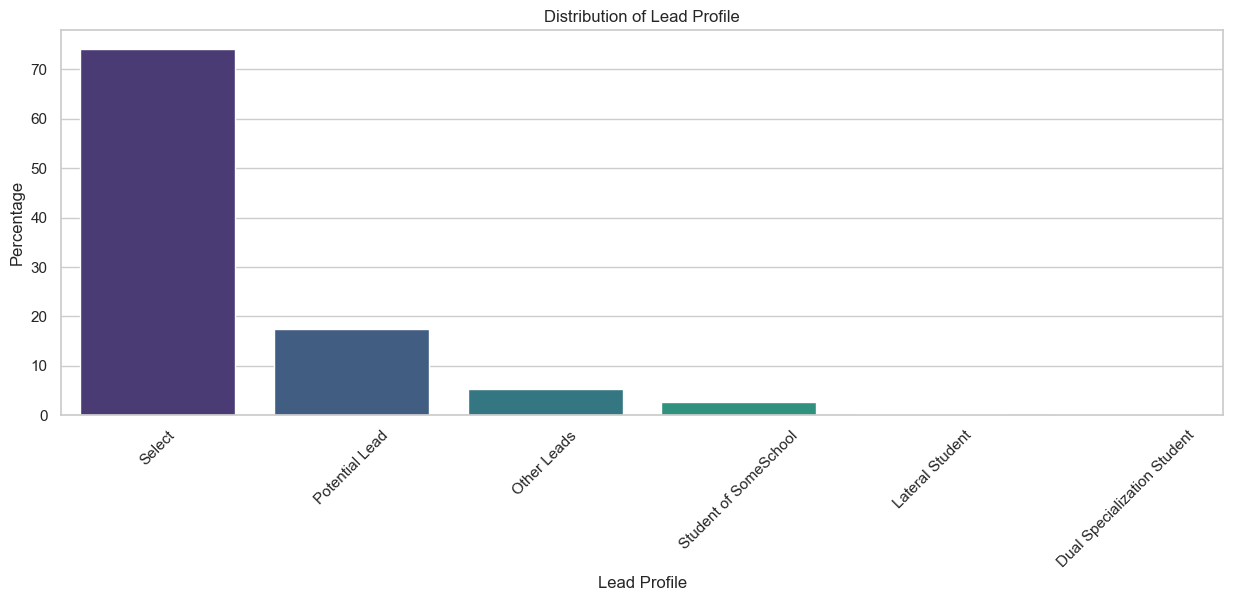

C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\4235389899.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


Lead Profile Distribution:
Lead Profile
Select                         74.188312
Potential Lead                 17.456710
Other Leads                     5.270563
Student of SomeSchool           2.608225
Lateral Student                 0.259740
Dual Specialization Student     0.216450
Name: proportion, dtype: float64



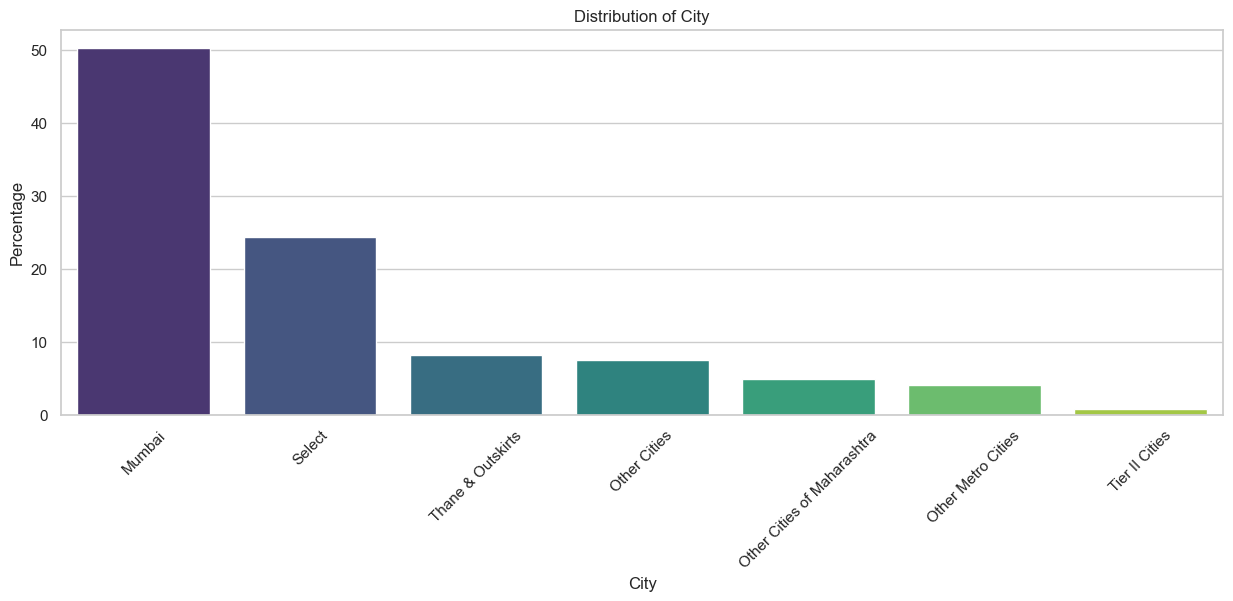

City Distribution:
City
Mumbai                         50.238095
Select                         24.339827
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: proportion, dtype: float64



C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\4235389899.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


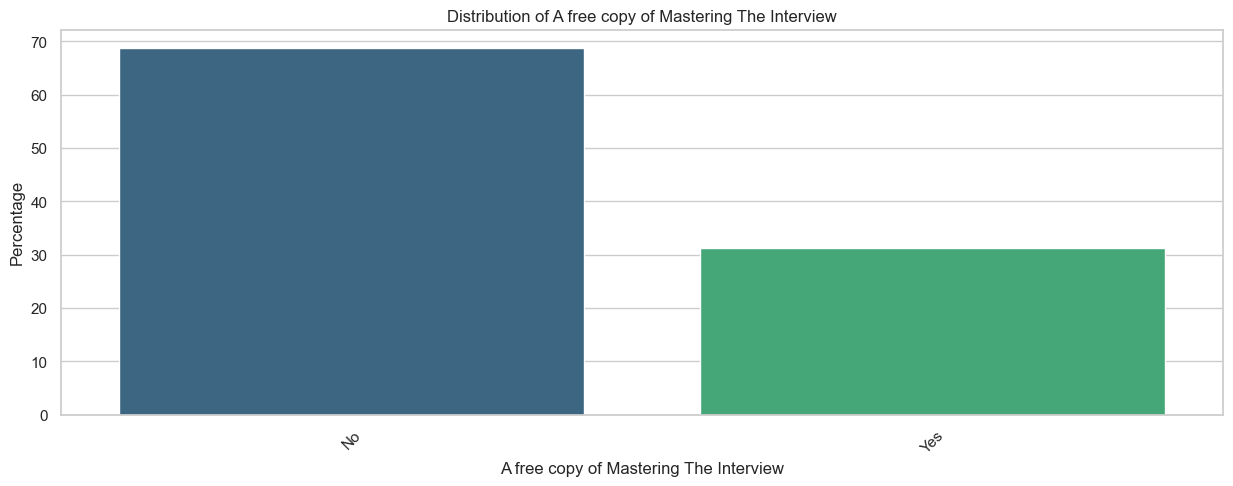

A free copy of Mastering The Interview Distribution:
A free copy of Mastering The Interview
No     68.744589
Yes    31.255411
Name: proportion, dtype: float64



C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\4235389899.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


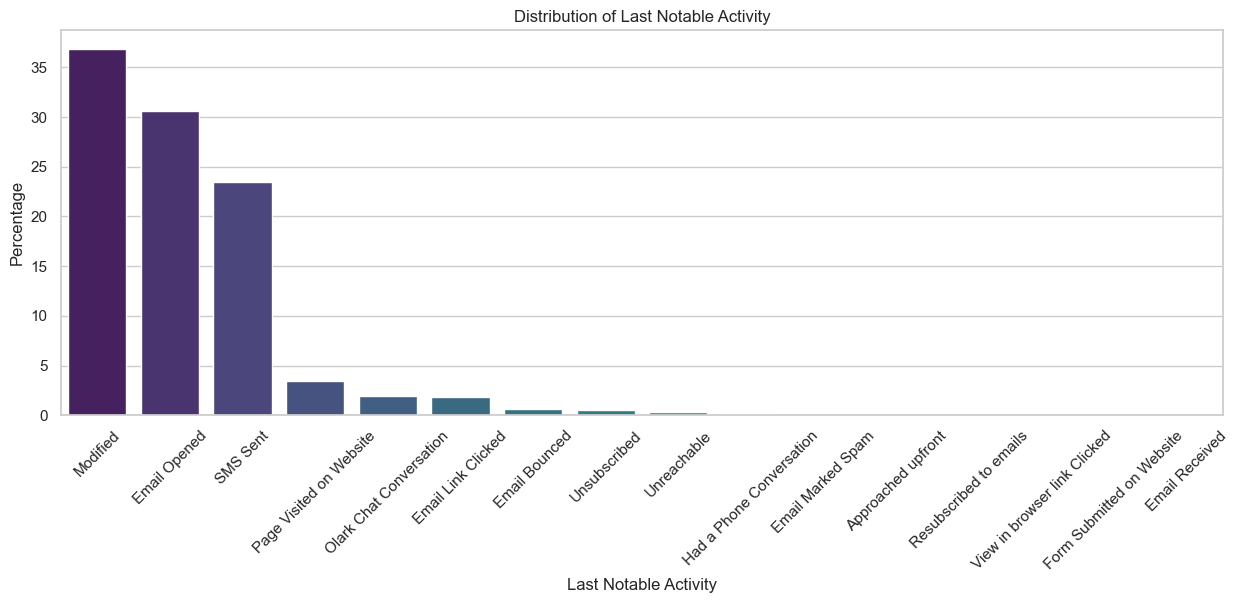

Last Notable Activity Distribution:
Last Notable Activity
Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: proportion, dtype: float64



C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\4235389899.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


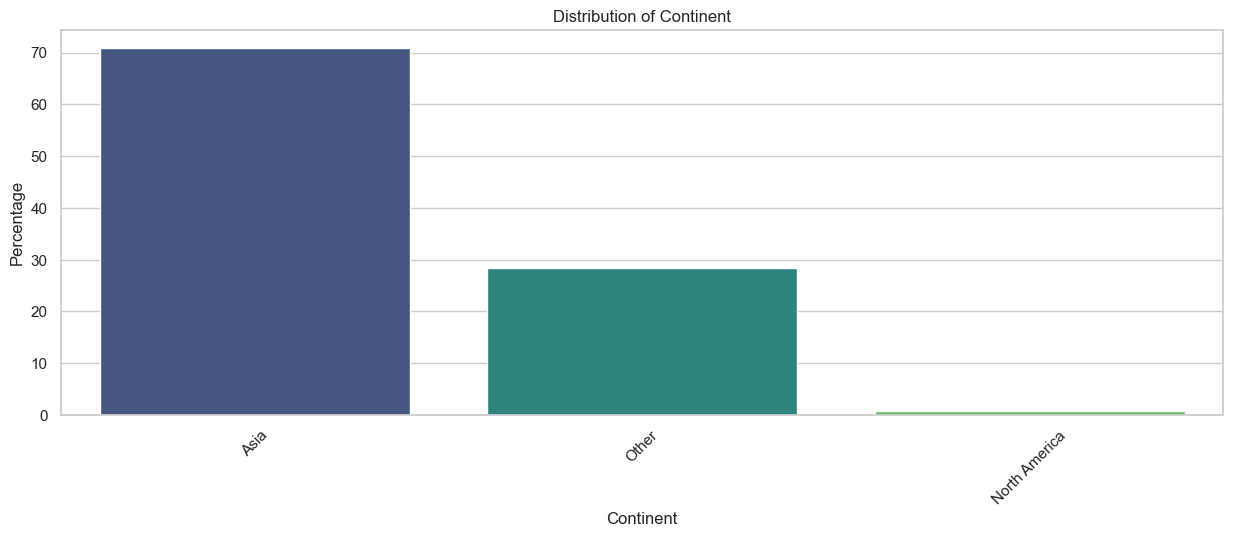

Continent Distribution:
Continent
Asia             70.833333
Other            28.419913
North America     0.746753
Name: proportion, dtype: float64



In [61]:
# Function to check imbalance in categorical features
def check_imbalance(df, column):
    counts = df[column].value_counts(normalize=True) * 100
    plt.figure(figsize=(15, 5))
    sns.barplot(x=counts.index, y=counts.values, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.show()
    print(f"{column} Distribution:\n{counts}\n")

# List of ID-like features to ignore
id_like_columns = ['Prospect ID', 'Lead Number']

# Identify categorical columns while excluding ID-like features
categorical_columns = df_X.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col not in id_like_columns]

# Check imbalance for all categorical columns
for col in categorical_columns:
    check_imbalance(df_X, col)


# Data Transformation Justification

## 1. Continent
- **Action:** Merged "North America" and "Other" into a single category "Non-Asia."
- **Justification:** This simplifies the model by reducing the number of categories and addresses the sparsity issue since "Asia" dominates the distribution.

## 2. Last Notable Activity
- **Action:** Merged low-frequency categories into an "Other" category.
- **Justification:** By combining infrequent categories, we reduce dimensionality, which can improve model performance by minimizing noise from rare categories.

## 3. Lead Profile
- **Action:** Merged "Lateral Student" and "Dual Specialization Student" into "Other Leads."
- **Justification:** This action streamlines the categories, keeping only meaningful distinctions that enhance interpretability.

## 4. Newspaper
- **Action:** Dropped the "Newspaper" column.
- **Justification:** Given that nearly all entries are "No," this feature does not provide useful information for modeling and can introduce unnecessary complexity.

## 5. How Did You Hear About X Education
- **Action:** Combined low-frequency categories into an "Other" category.
- **Justification:** This prevents the model from being influenced by noise from infrequent categories, allowing it to focus on the more significant sources.

## 6. Specialization
- **Action:** Considered merging low-frequency specializations into an "Other" category.
- **Justification:** Since most responses cluster under a few categories, consolidating reduces complexity while maintaining relevant information.

## 7. Country
- **Action:** Dropped the "Country" column.
- **Justification:** With the creation of the "Continent" feature, retaining "Country" adds redundancy and complexity without providing significant value.

## 8. Last Activity
- **Action:** Merged low-frequency categories into an "Other" category.
- **Justification:** Similar to "Last Notable Activity," this reduces the number of unique values and addresses potential sparsity issues.

## 9. Lead Origin
- **Action:** Kept "Lead Origin" as is.
- **Justification:** The distribution is not overly imbalanced, and merging categories may not provide significant benefits compared to retaining these distinctions.


In [63]:
# 1. Continent: Merge "North America" and "Other" into "Non-Asia"
df_X['Continent'] = df_X['Continent'].replace({'North America': 'Non-Asia', 'Other': 'Non-Asia'})

# 2. Last Notable Activity: Merge low-frequency categories into "Other"
activity_counts = df_X['Last Notable Activity'].value_counts()
low_activity = activity_counts[activity_counts < 2].index  # Adjust the threshold as needed
df_X['Last Notable Activity'] = df_X['Last Notable Activity'].replace(low_activity, 'Other')

# 3. Lead Profile: Merge "Lateral Student" and "Dual Specialization Student" into "Other Leads"
df_X['Lead Profile'] = df_X['Lead Profile'].replace({'Lateral Student': 'Other Leads', 'Dual Specialization Student': 'Other Leads'})

# 4. Newspaper: Drop the "Newspaper" column
df_X.drop(columns=['Newspaper'], inplace=True)

# 5. How Did You Hear About X Education: Combine low-frequency categories into "Other"
education_counts = df_X['How did you hear about X Education'].value_counts()
low_education = education_counts[education_counts < 2].index  # Adjust the threshold as needed
df_X['How did you hear about X Education'] = df_X['How did you hear about X Education'].replace(low_education, 'Other')

# 6. Specialization: Merge low-frequency specializations into "Other"
specialization_counts = df_X['Specialization'].value_counts()
low_specialization = specialization_counts[specialization_counts < 2].index  # Adjust the threshold as needed
df_X['Specialization'] = df_X['Specialization'].replace(low_specialization, 'Other')

# 7. Country: Drop the "Country" column
df_X.drop(columns=['Country'], inplace=True)

# 8. Last Activity: Merge low-frequency categories into "Other"
last_activity_counts = df_X['Last Activity'].value_counts()
low_last_activity = last_activity_counts[last_activity_counts < 2].index  # Adjust the threshold as needed
df_X['Last Activity'] = df_X['Last Activity'].replace(low_last_activity, 'Other')

# 9. Lead Origin: Keep "Lead Origin" as is (no code needed)

# Display the modified DataFrame
print(df_X.head())


                            Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Converted  TotalVisits  Total Time Spent on Website  \
0      Olark Chat          0     0.000000                            0   
1  Organic Search          0     1.791759                          674   
2  Direct Traffic          1     1.098612                         1532   
3  Direct Traffic          0     0.693147                          305   
4          Google          1     1.098612                         1428   

   Page Views Per Visit            Last Activity           Specializ

C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\3937920568.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


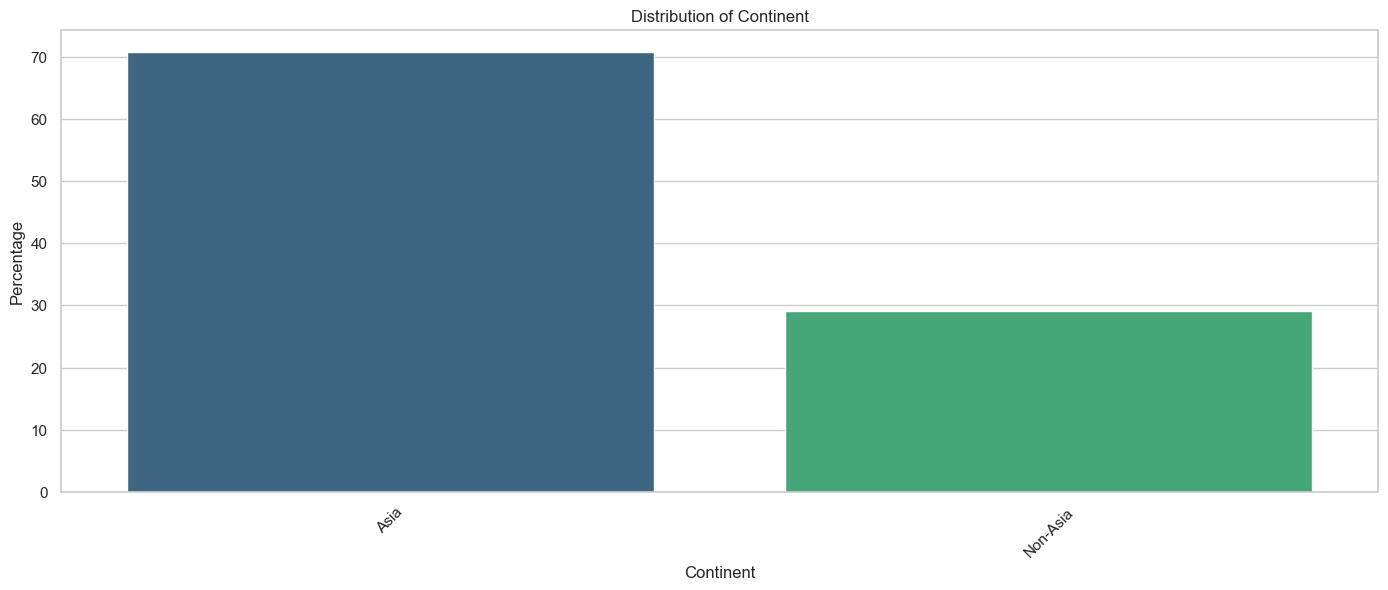

C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\3937920568.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


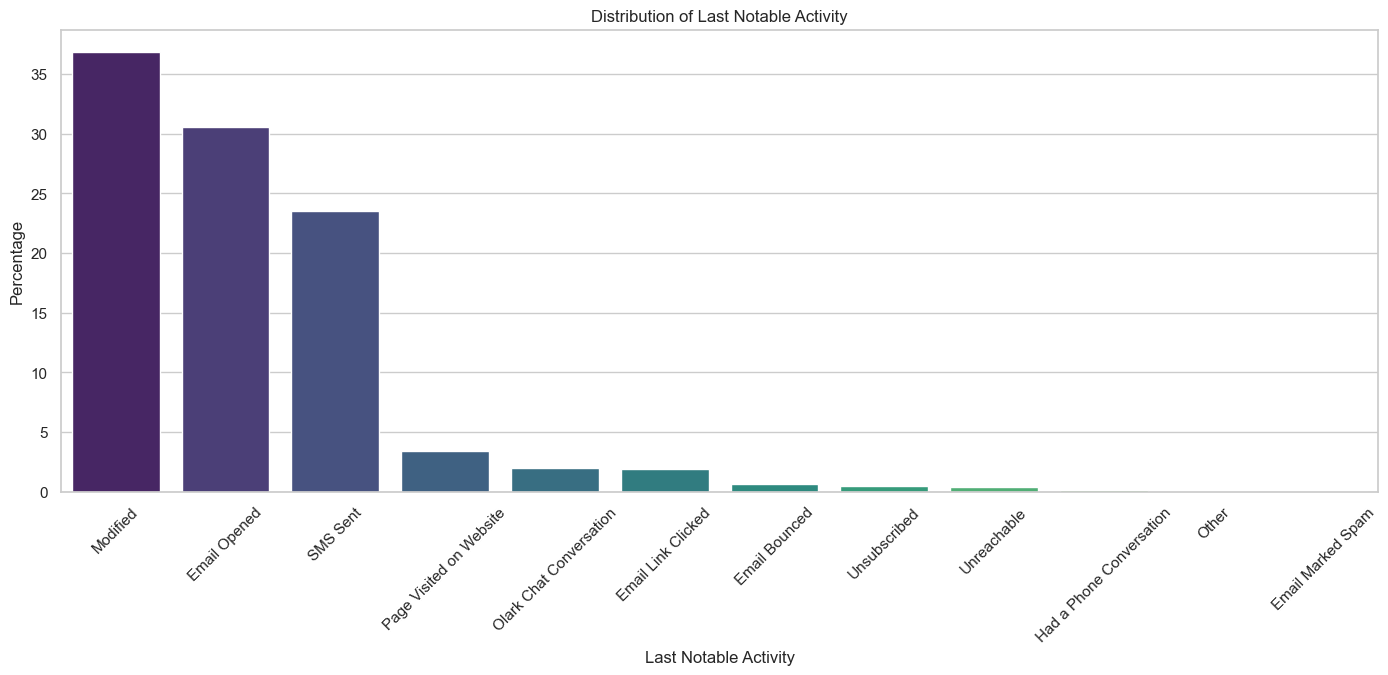

C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\3937920568.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


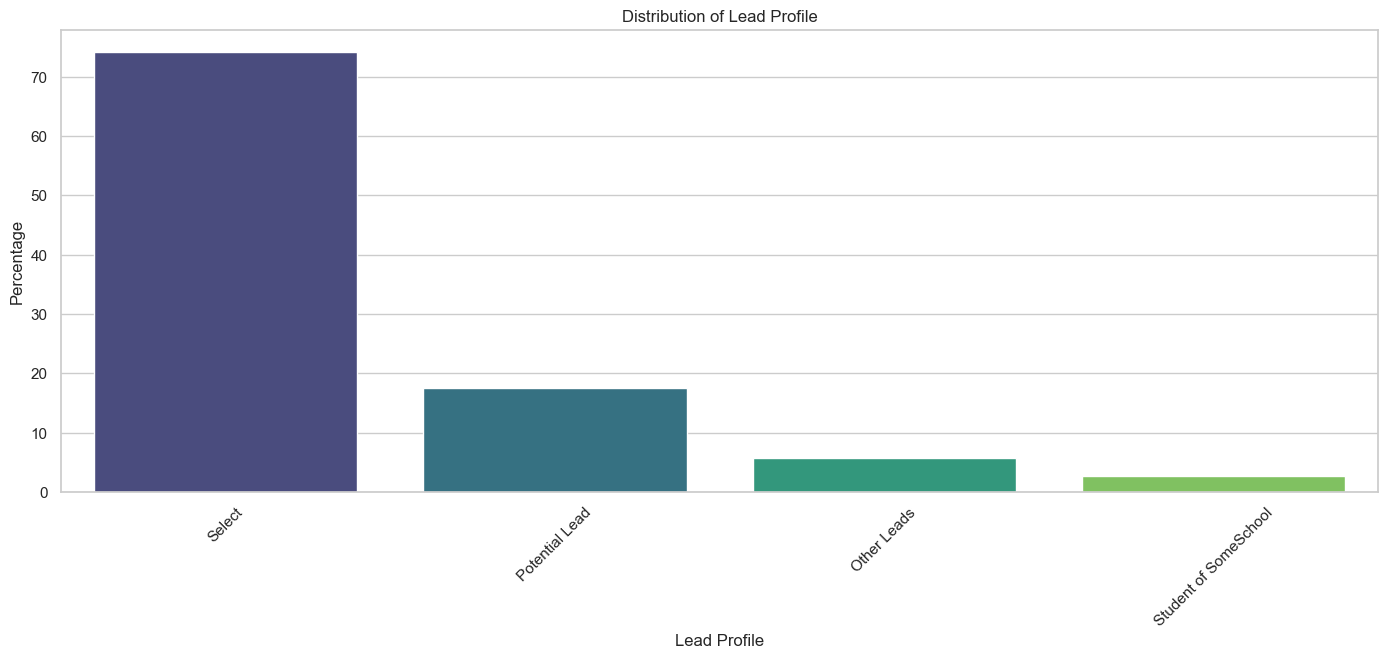

C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\3937920568.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


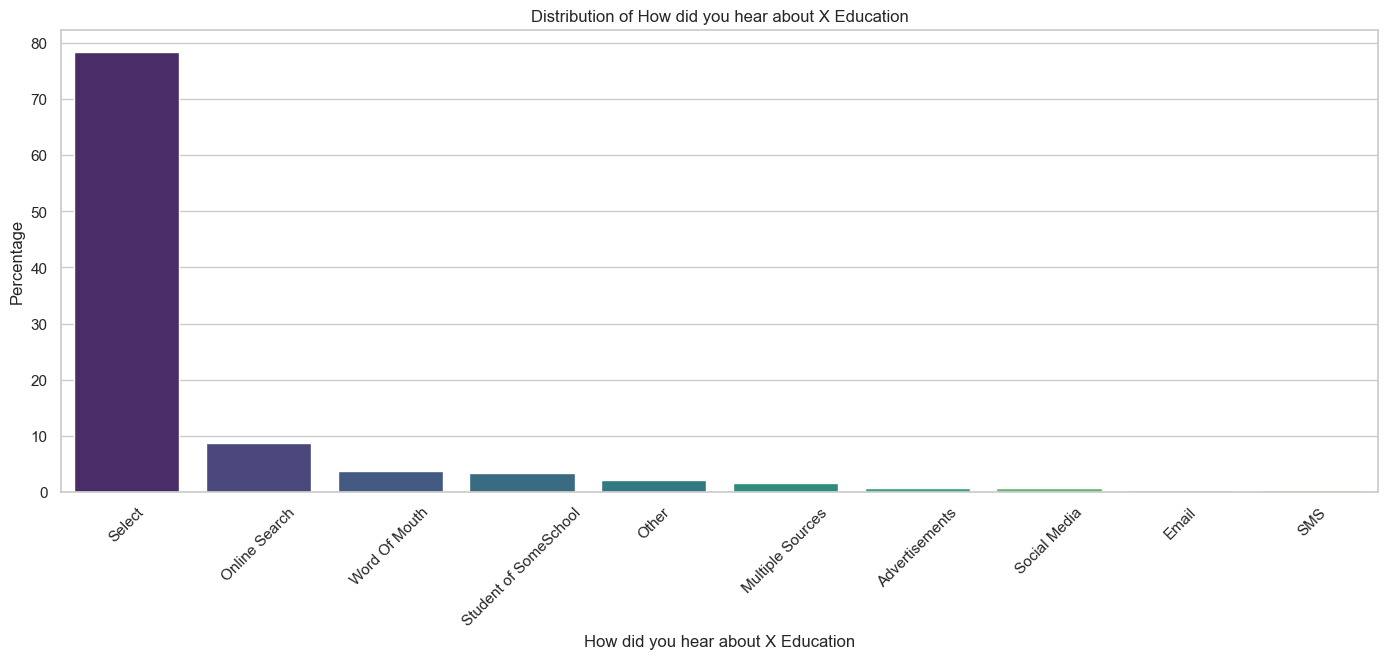

C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\3937920568.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


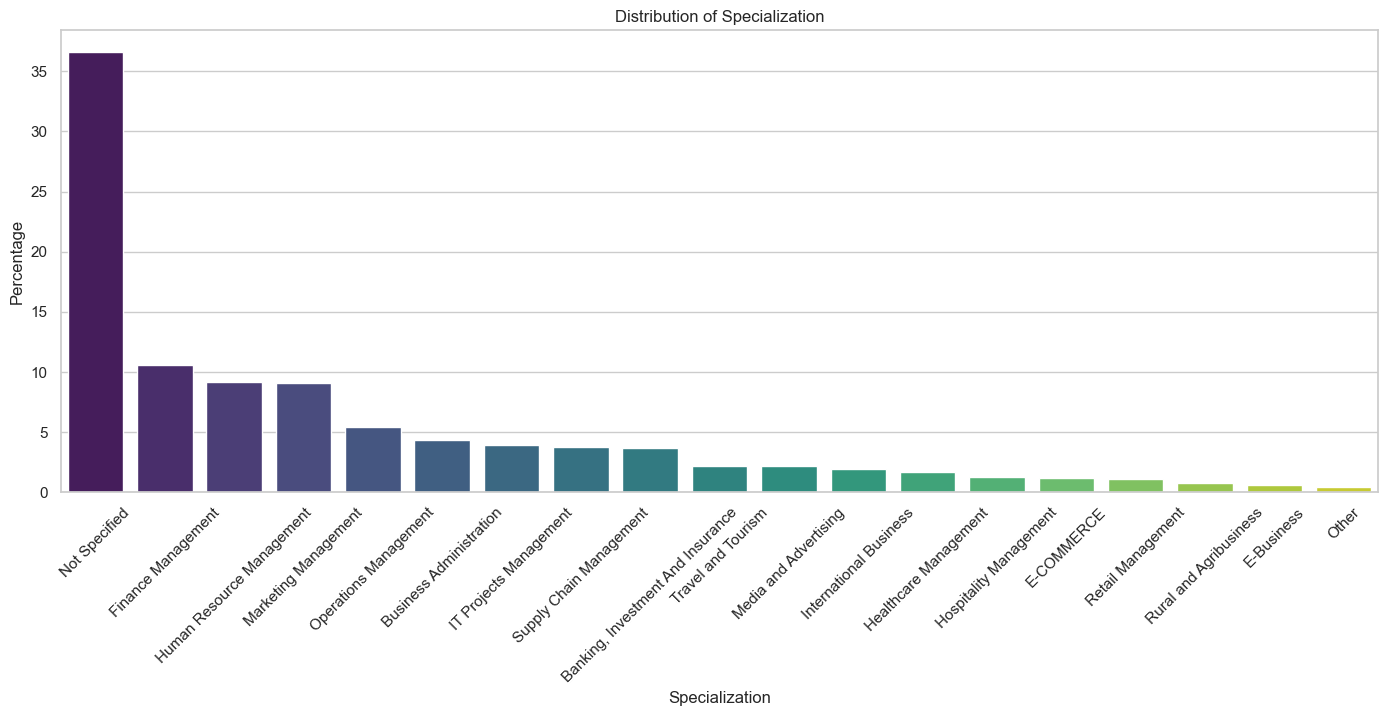

C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\3937920568.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


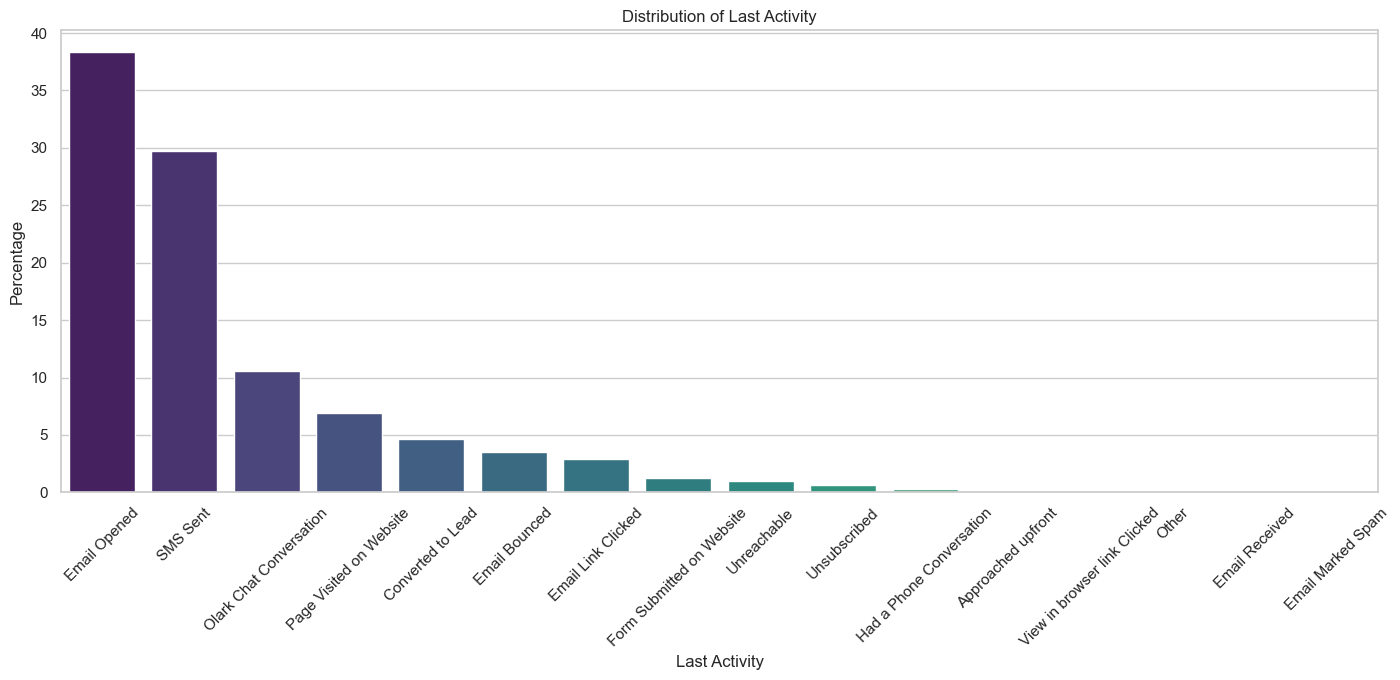

C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\3937920568.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


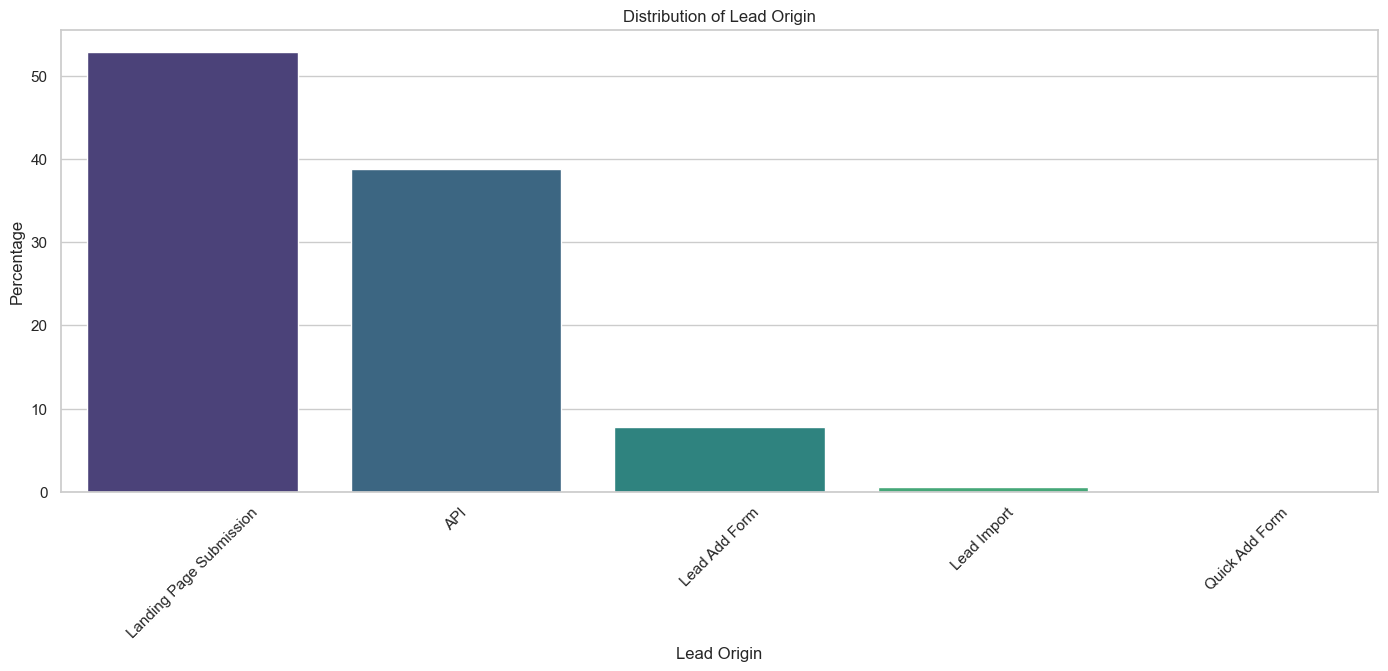

In [64]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Define a function to plot distributions for specified columns
def plot_distribution(df, column):
    counts = df[column].value_counts(normalize=True) * 100
    plt.figure(figsize=(17, 6))
    sns.barplot(x=counts.index, y=counts.values, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.show()

# Plot distributions for the specified columns
for column in ['Continent', 'Last Notable Activity', 'Lead Profile', 
                'How did you hear about X Education', 'Specialization', 
                'Last Activity', 'Lead Origin']:
    plot_distribution(df_X, column)


# Data Preprocessing Notes

## Merging Categories

1. **Last Notable Activity**:
   - **Action**: Merged "Had a Phone Conversation," "Email Marked Spam," "Unreachable," and "Unsubscribed" into "Other".
   - **Justification**: These categories have very low frequencies compared to others. Merging them reduces dimensionality and prevents the model from being influenced by noise.

2. **How Did You Hear About X Education**:
   - **Action**: Merged "Advertisements," "Social Media," and "Email/SMS" into "Other".
   - **Justification**: These categories collectively contribute minimally to the total and can be grouped to simplify the feature space.

3. **Last Activity**:
   - **Action**: Merged "Had a Phone Conversation," "Approached Upfront," "View in Browser Link Clicked," "Email Received," and "Email Marked Spam" into "Other".
   - **Justification**: Similar to the other categories, these have low representation. Combining them helps to reduce the number of unique categories and simplifies the analysis.

## Conclusion
By reducing the number of unique categories across these features, we can improve the robustness and interpretability of our model while mitigating the effects of noise from infrequent categories.


In [66]:

# Merging categories in 'Last Notable Activity'
df_X['Last Notable Activity'] = df_X['Last Notable Activity'].replace(
    {
        'Had a Phone Conversation': 'Other',
        'Email Marked Spam': 'Other',
        'Unreachable': 'Other',
        'Unsubscribed': 'Other'
    }
)

# Merging categories in 'How Did You Hear About X Education'
df_X['How did you hear about X Education'] = df_X['How did you hear about X Education'].replace(
    {
        'Advertisements': 'Other',
        'Social Media': 'Other',
        'Email': 'Other',
        'SMS': 'Other'
    }
)

# Merging categories in 'Last Activity'
df_X['Last Activity'] = df_X['Last Activity'].replace(
    {
        'Had a Phone Conversation': 'Other',
        'Approached upfront': 'Other',
        'View in browser link clicked': 'Other',
        'Email Received': 'Other',
        'Email Marked Spam': 'Other'
    }
)

# Optionally, you can check the value counts after merging
print(df_X['Last Notable Activity'].value_counts())
print(df_X['How did you hear about X Education'].value_counts())
print(df_X['Last Activity'].value_counts())


Last Notable Activity
Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other                       100
Email Bounced                60
Name: count, dtype: int64
How did you hear about X Education
Select                   7250
Online Search             808
Other                     372
Word Of Mouth             348
Student of SomeSchool     310
Multiple Sources          152
Name: count, dtype: int64
Last Activity
Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Other                             45
View in browser link Clicked      

## Category Merging Justifications

### Last Notable Activity
- **Action**: Merged "Had a Phone Conversation," "Email Marked Spam," "Unreachable," and "Unsubscribed" into "Other".
- **Justification**: These categories exhibited very low frequencies compared to the dominant categories. Merging them reduces dimensionality and minimizes noise in the dataset.

### How Did You Hear About X Education
- **Action**: Merged "Advertisements," "Social Media," and "Email/SMS" into "Other".
- **Justification**: These categories collectively contributed minimally to the overall dataset and can be grouped to simplify the feature space.

### Last Activity
- **Action**: Merged "Had a Phone Conversation," "Approached Upfront," "View in Browser Link Clicked," "Email Received," and "Email Marked Spam" into "Other".
- **Justification**: Similar to the above categories, these have low representation. Combining them helps reduce the number of unique categories, simplifying the analysis and future modeling.


In [68]:
# Last Notable Activity
df_X['Last Notable Activity'] = df_X['Last Notable Activity'].replace(
    {
        'Had a Phone Conversation': 'Other',
        'Email Marked Spam': 'Other',
        'Unreachable': 'Other',
        'Unsubscribed': 'Other'
    }
)

# How Did You Hear About X Education
df_X['How did you hear about X Education'] = df_X['How did you hear about X Education'].replace(
    {
        'Advertisements': 'Other',
        'Social Media': 'Other',
        'Email': 'Other',
        'SMS': 'Other'
    }
)

# Last Activity
df_X['Last Activity'] = df_X['Last Activity'].replace(
    {
        'Had a Phone Conversation': 'Other',
        'Approached Upfront': 'Other',
        'View in browser link Clicked': 'Other',
        'Email Received': 'Other',
        'Email Marked Spam': 'Other'
    }
)

# Check the updated distributions
last_noble_activity_distribution = df_X['Last Notable Activity'].value_counts(normalize=True) * 100
how_heard_about_distribution = df_X['How did you hear about X Education'].value_counts(normalize=True) * 100
last_activity_distribution = df_X['Last Activity'].value_counts(normalize=True) * 100

print("Last Notable Activity Distribution:\n", last_noble_activity_distribution)
print("\nHow Did You Hear About X Education Distribution:\n", how_heard_about_distribution)
print("\nLast Activity Distribution:\n", last_activity_distribution)


Last Notable Activity Distribution:
 Last Notable Activity
Modified                   36.872294
Email Opened               30.595238
SMS Sent                   23.506494
Page Visited on Website     3.441558
Olark Chat Conversation     1.980519
Email Link Clicked          1.872294
Other                       1.082251
Email Bounced               0.649351
Name: proportion, dtype: float64

How Did You Hear About X Education Distribution:
 How did you hear about X Education
Select                   78.463203
Online Search             8.744589
Other                     4.025974
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Multiple Sources          1.645022
Name: proportion, dtype: float64

Last Activity Distribution:
 Last Activity
Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email

### Further Merging of Categories

As part of the data preprocessing for our model, we have identified opportunities to further merge certain categories in the following columns to streamline the analysis and reduce dimensionality:

1. **Last Notable Activity:**
   - **Action:** Merged the categories "Olark Chat Conversation," "Page Visited on Website," and "Email Link Clicked" into a single category labeled **"Other."**
   - **Justification:** These categories represent low-frequency occurrences compared to others. By consolidating them, we reduce the noise in the data and simplify the feature space, which can enhance model performance.

2. **How Did You Hear About X Education:**
   - **Action:** Merged the categories "Word Of Mouth," "Student of SomeSchool," and "Multiple Sources" into the **"Other"** category.
   - **Justification:** Similar to the previous category, these categories contribute minimally to the total. Grouping them into "Other" allows us to focus on the more significant sources of information while simplifying our analysis.

3. **Last Activity:**
   - **Action:** Merged the categories "Converted to Lead," "Form Submitted on Website," "Unreachable," and "Unsubscribed" into **"Other."**
   - **Justification:** These categories have low representation, and combining them helps to streamline our analysis. Reducing the number of unique categories allows for a clearer interpretation of results and can improve the performance of our model.

### Next Steps

After implementing these changes, it is crucial to continue monitoring the performance of the categorical features in our model. We will evaluate their effectiveness using key metrics such as R-squared, P-values, and Variance Inflation Factor (VIF) scores to ensure that we are building a robust predictive model.


In [70]:
# Further merging categories in the specified columns

# Last Notable Activity: Merge more categories into "Other"
df_X['Last Notable Activity'] = df_X['Last Notable Activity'].replace({
    'Olark Chat Conversation': 'Other',
    'Page Visited on Website': 'Other',
    'Email Link Clicked': 'Other'
})

# How Did You Hear About X Education: Merge categories into "Other"
df_X['How did you hear about X Education'] = df_X['How did you hear about X Education'].replace({
    'Other': 'Other',  # This is just to clarify we are considering "Other" as a catch-all
    'Word Of Mouth': 'Other',
    'Student of SomeSchool': 'Other',
    'Multiple Sources': 'Other'
})

# Last Activity: Merge more categories into "Other"
df_X['Last Activity'] = df_X['Last Activity'].replace({
    'Converted to Lead': 'Other',
    'Form Submitted on Website': 'Other',
    'Unreachable': 'Other',
    'Unsubscribed': 'Other'
})

# Check the updated value counts for the affected columns again
last_noble_activity_counts = df_X['Last Notable Activity'].value_counts(normalize=True) * 100
how_did_you_hear_counts = df_X['How did you hear about X Education'].value_counts(normalize=True) * 100
last_activity_counts = df_X['Last Activity'].value_counts(normalize=True) * 100

# Output the counts to see the changes
last_noble_activity_counts, how_did_you_hear_counts, last_activity_counts


(Last Notable Activity
 Modified         36.872294
 Email Opened     30.595238
 SMS Sent         23.506494
 Other             8.376623
 Email Bounced     0.649351
 Name: proportion, dtype: float64,
 How did you hear about X Education
 Select           78.463203
 Other            12.792208
 Online Search     8.744589
 Name: proportion, dtype: float64,
 Last Activity
 Email Opened               38.311688
 SMS Sent                   29.707792
 Olark Chat Conversation    10.530303
 Other                       8.106061
 Page Visited on Website     6.926407
 Email Bounced               3.528139
 Email Link Clicked          2.889610
 Name: proportion, dtype: float64)

### Further Merging of Last Notable Activity Categories

In this step, we further streamlined the "Last Notable Activity" feature by merging the following categories into "Other":

- **Olark Chat Conversation**
- **Page Visited on Website**
- **Email Link Clicked**

**Justification for Further Merging:**
These categories contributed minimally to the overall distribution. By combining them into an "Other" category, we reduce dimensionality and prevent the model from being influenced by noise from infrequent categories.

After merging, we will recalculate the distribution of the "Last Notable Activity" feature to assess its balance.


In [72]:
# Merging specified categories in the 'Last Notable Activity' column
df_X['Last Notable Activity'] = df_X['Last Notable Activity'].replace({
    'Olark Chat Conversation': 'Other',
    'Page Visited on Website': 'Other',
    'Email Link Clicked': 'Other'
})

# Recalculate the distribution after merging
last_notable_activity_distribution = df_X['Last Notable Activity'].value_counts(normalize=True) * 100

# Prepare the results for display
last_notable_activity_distribution = pd.DataFrame(last_notable_activity_distribution).reset_index()
last_notable_activity_distribution.columns = ['Last Notable Activity', 'Percentage']

# Display the updated distribution using print
print(last_notable_activity_distribution)


  Last Notable Activity  Percentage
0              Modified   36.872294
1          Email Opened   30.595238
2              SMS Sent   23.506494
3                 Other    8.376623
4         Email Bounced    0.649351


### Further Merging of Last Notable Activity

In this step, we merged the following categories into "Other" to reduce dimensionality and improve analysis:

- **Email Bounced** was merged into "Other."
- Categories with low frequencies, specifically:
  - Olark Chat Conversation
  - Page Visited on Website
  - Email Link Clicked
  were all combined into "Other."

In [74]:
# Merging 'Olark Chat Conversation', 'Page Visited on Website', 'Email Link Clicked', and 'Email Bounced' into 'Other'
df_X['Last Notable Activity'] = df_X['Last Notable Activity'].replace(['Olark Chat Conversation', 'Page Visited on Website', 'Email Link Clicked', 'Email Bounced'], 'Other')

# Recalculating the distribution
last_notable_activity_distribution = df_X['Last Notable Activity'].value_counts(normalize=True) * 100
last_notable_activity_distribution = pd.DataFrame(last_notable_activity_distribution).reset_index()
last_notable_activity_distribution.columns = ['Last Notable Activity', 'Percentage']

# Displaying the updated distribution
print(last_notable_activity_distribution)


  Last Notable Activity  Percentage
0              Modified   36.872294
1          Email Opened   30.595238
2              SMS Sent   23.506494
3                 Other    9.025974



Value counts (in %) for Lead Origin:
Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: proportion, dtype: float64


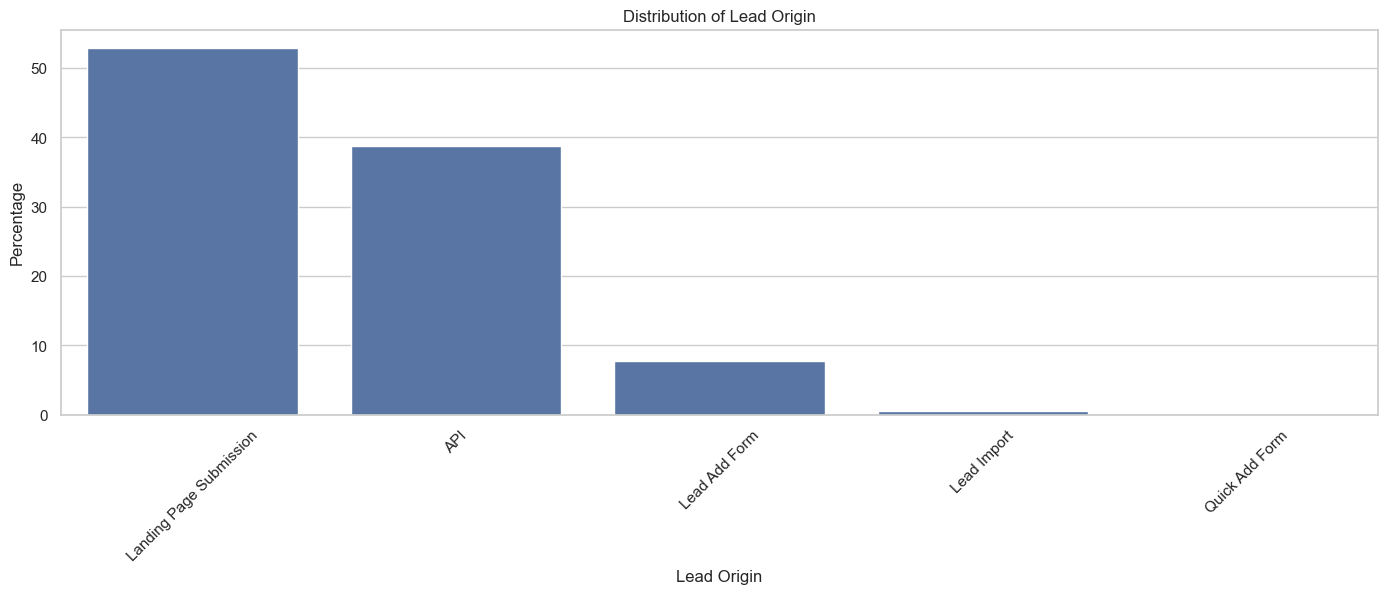


Value counts (in %) for Lead Source:
Lead Source
Google              31.428571
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Other                0.898268
Name: proportion, dtype: float64


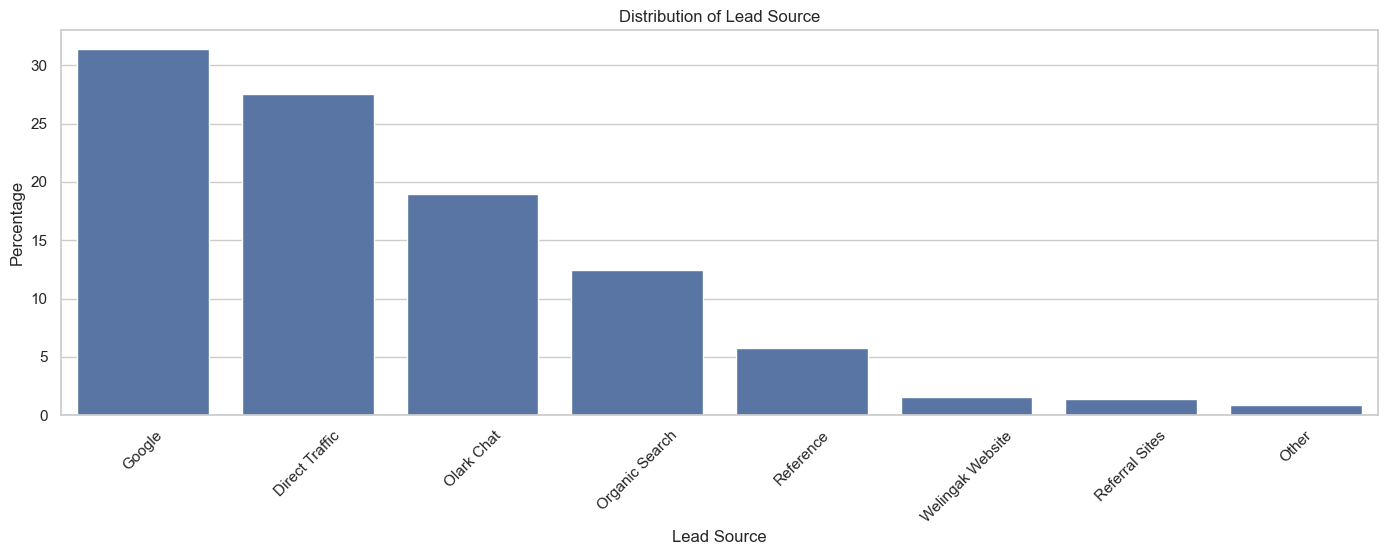


Value counts (in %) for Last Activity:
Last Activity
Email Opened               38.311688
SMS Sent                   29.707792
Olark Chat Conversation    10.530303
Other                       8.106061
Page Visited on Website     6.926407
Email Bounced               3.528139
Email Link Clicked          2.889610
Name: proportion, dtype: float64


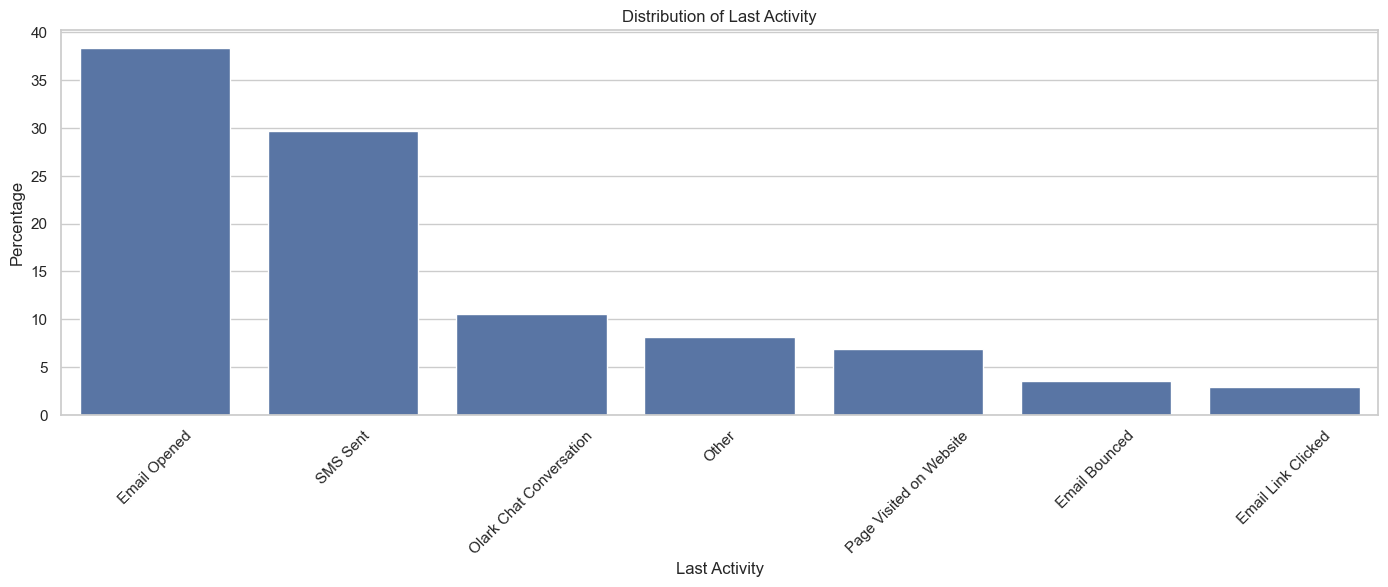


Value counts (in %) for Specialization:
Specialization
Not Specified                        36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Other                                 0.432900
Name: proportion, dtype: float64


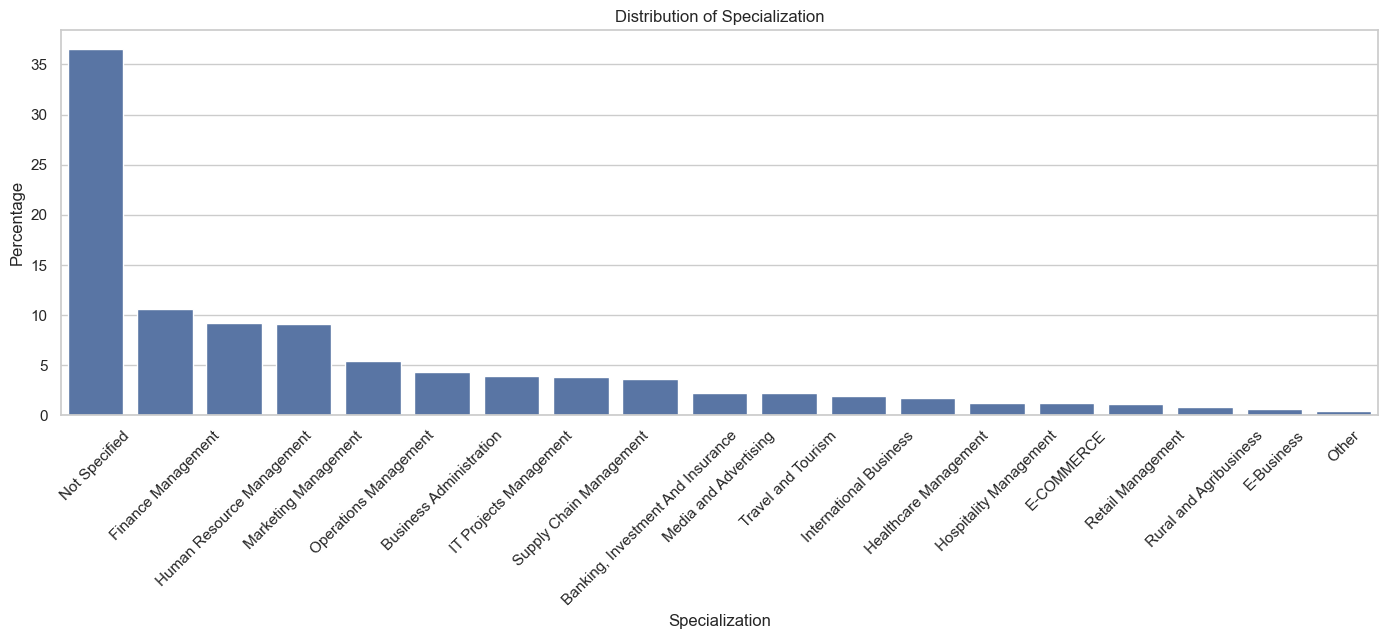


Value counts (in %) for How did you hear about X Education:
How did you hear about X Education
Select           78.463203
Other            12.792208
Online Search     8.744589
Name: proportion, dtype: float64


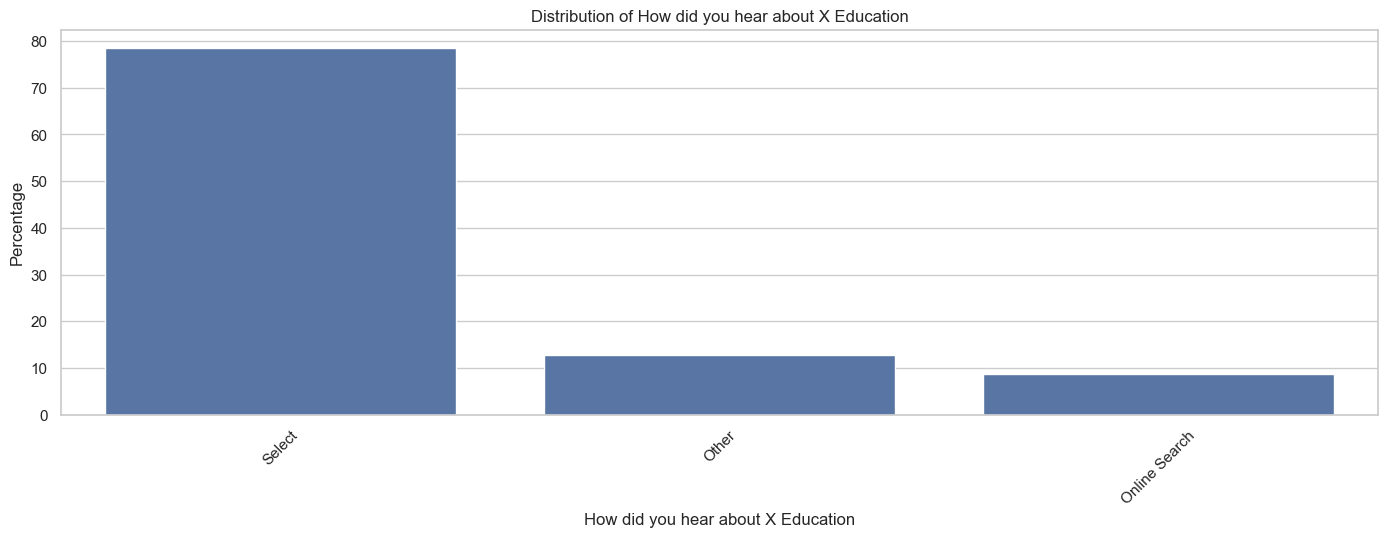


Value counts (in %) for Lead Profile:
Lead Profile
Select                   74.188312
Potential Lead           17.456710
Other Leads               5.746753
Student of SomeSchool     2.608225
Name: proportion, dtype: float64


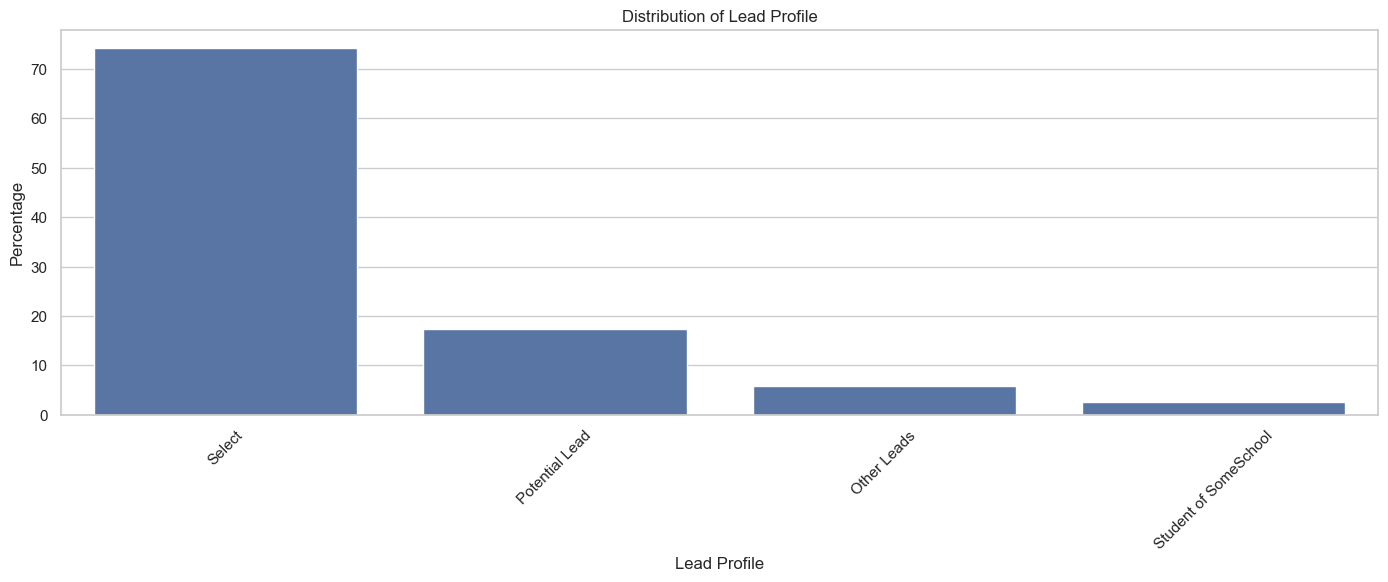


Value counts (in %) for City:
City
Mumbai                         50.238095
Select                         24.339827
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: proportion, dtype: float64


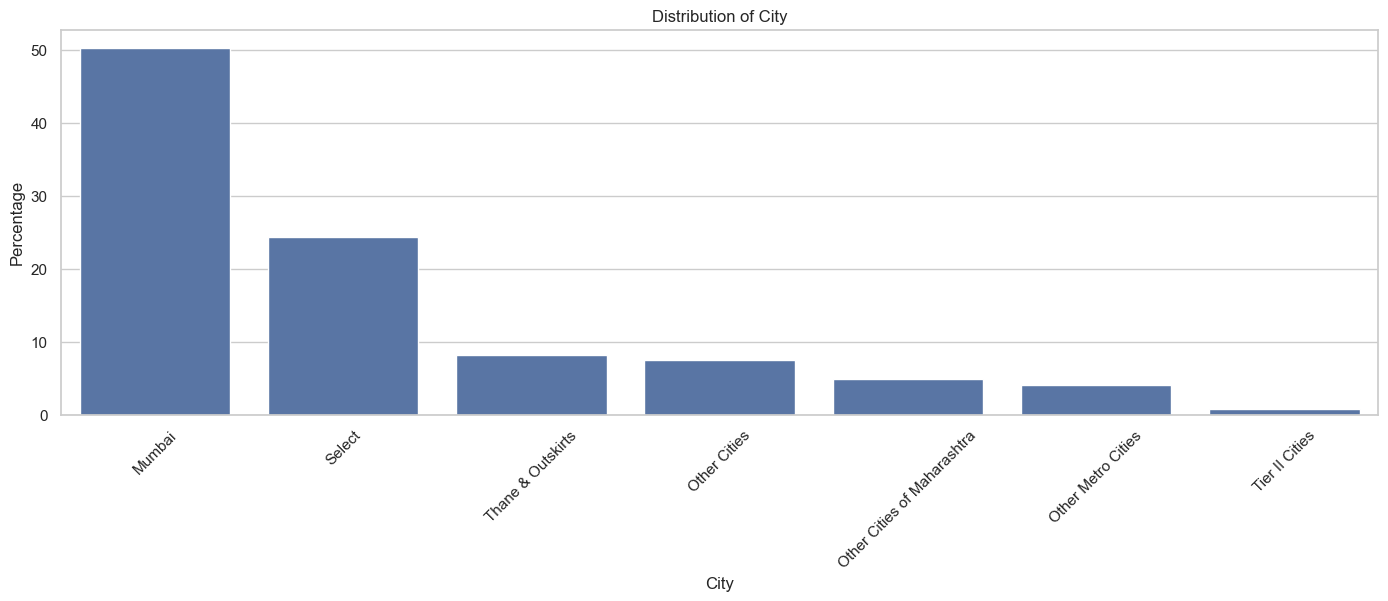


Value counts (in %) for A free copy of Mastering The Interview:
A free copy of Mastering The Interview
No     68.744589
Yes    31.255411
Name: proportion, dtype: float64


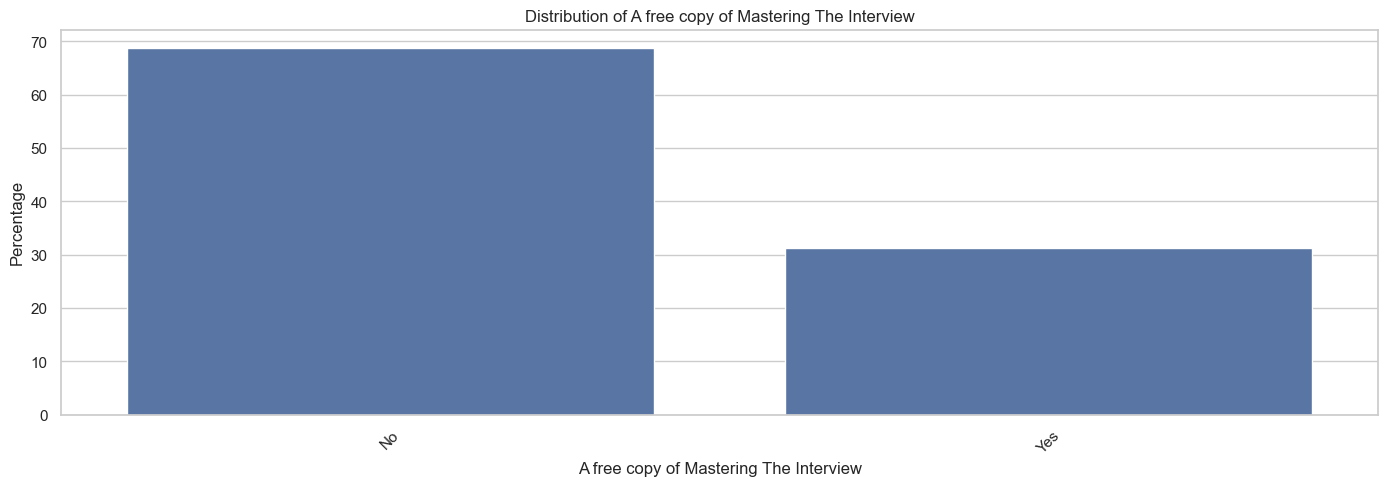


Value counts (in %) for Last Notable Activity:
Last Notable Activity
Modified        36.872294
Email Opened    30.595238
SMS Sent        23.506494
Other            9.025974
Name: proportion, dtype: float64


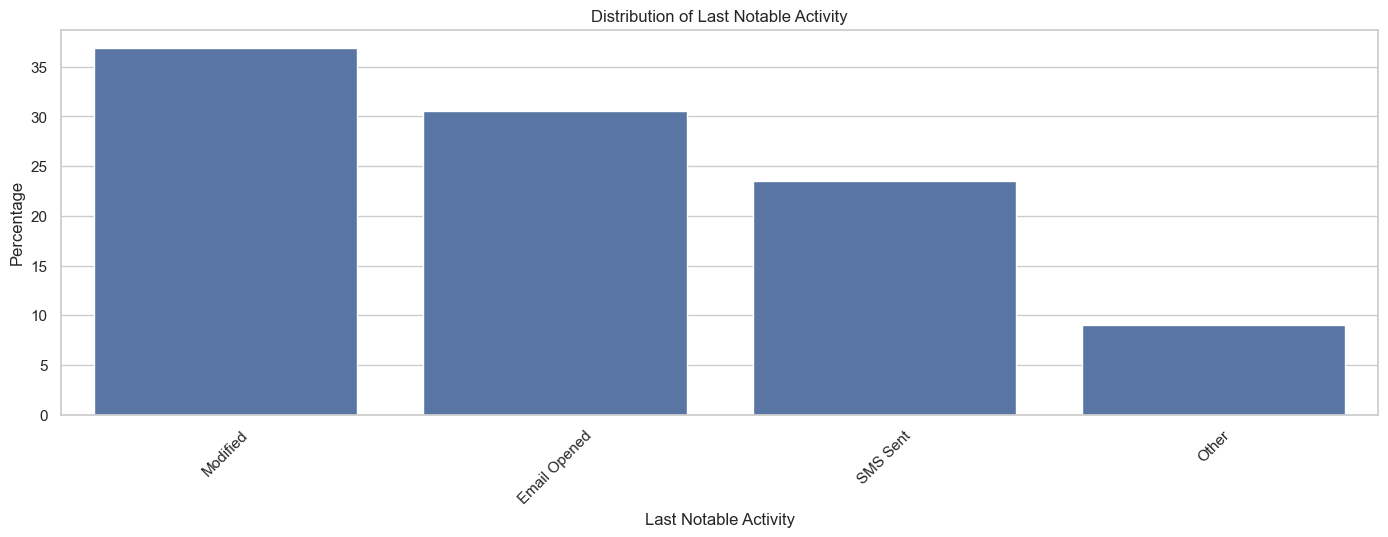


Value counts (in %) for Continent:
Continent
Asia        70.833333
Non-Asia    29.166667
Name: proportion, dtype: float64


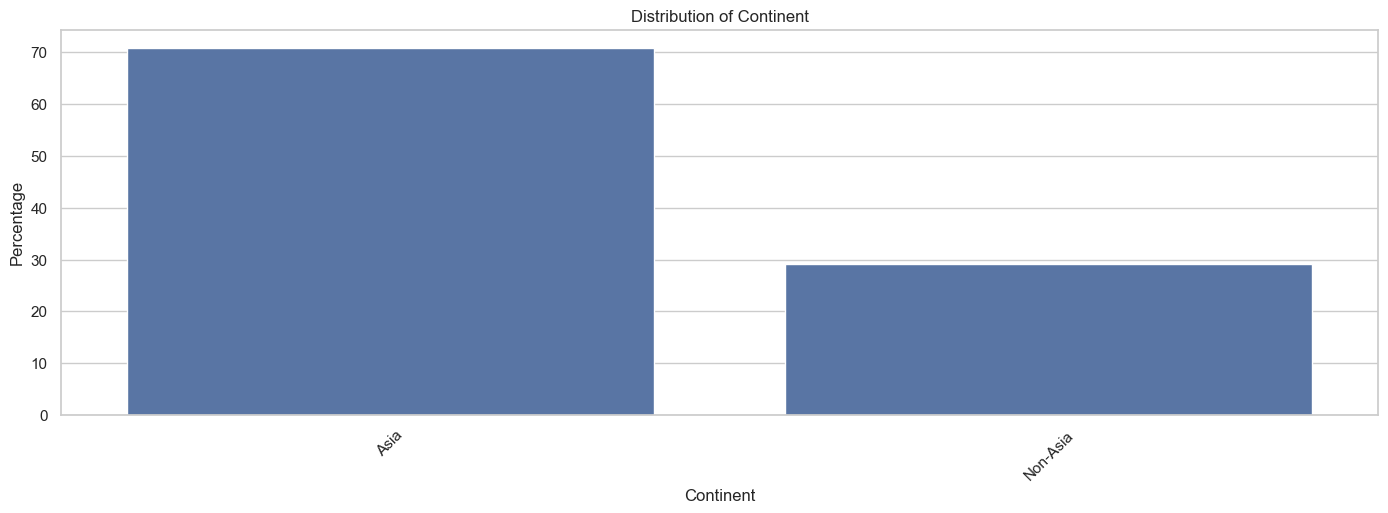

In [75]:
# List of columns to exclude (ID-like and target column)
exclude_columns = ['Prospect ID', 'Lead Number', 'Converted']  # Add more ID-like columns here if needed

# Selecting only categorical columns excluding the specified columns
categorical_columns = df_X.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col not in exclude_columns]

# Plotting value counts and calculating percentages for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(17, 5))
    
    # Calculating value counts in percentage
    value_counts = (df_X[col].value_counts(normalize=True) * 100).sort_values(ascending=False)
    
    # Plotting
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f'Distribution of {col}')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    
    # Display the value counts
    print(f"\nValue counts (in %) for {col}:")
    print(value_counts)
    
    plt.show()

# Actions on Data Cleaning and Imbalance Treatment:

1. **Lead Profile Column:**
   - **Action:** The value `Select` in the `Lead Profile` column was renamed to `Not Categorized`. This provides a clearer understanding of the category, representing leads that haven't been categorized yet.
   - **Justification:** The category `Select` was unclear, and renaming it to `Not Categorized` better reflects the data’s nature.
   - **Result:** The updated distribution shows that the majority (74.19%) of leads remain in this category, indicating valid representation.

2. **How Did You Hear About X Education Column:**
   - **Action:** The value `Select` was renamed to `Not Provided` in the `How Did You Hear About X Education` column. This clarifies that users did not specify how they heard about X Education.
   - **Justification:** The `Select` value was ambiguous and did not represent any useful information. Renaming it to `Not Provided` gives a clearer understanding of the data.
   - **Result:** The new distribution shows that a large portion (78.46%) of users did not provide information on how they heard about X Education, which is expected.

3. **City Column:**
   - **Action:** The value `Select` was merged into the `Other Cities` category in the `City` column to simplify the dataset and reduce redundancy.
   - **Justification:** `Select` was an undefined or ambiguous value. Merging it with `Other Cities` improves data clarity.
   - **Result:** The updated distribution consolidates `Select` into `Other Cities`, making the data more streamlined without losing valuable information.


In [77]:
# Merge 'Select' in City into 'Other Cities'
df_X['City'] = df_X['City'].replace('Select', 'Other Cities')

# Verify the change
city_distribution = df_X['City'].value_counts(normalize=True) * 100
print(city_distribution)


City
Mumbai                         50.238095
Other Cities                   31.764069
Thane & Outskirts               8.138528
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: proportion, dtype: float64


In [78]:
# Rename 'Select' to 'Not Provided' in "How Did You Hear About X Education"
df_X['How did you hear about X Education'] = df_X['How did you hear about X Education'].replace('Select', 'Not Provided')

# Verify the change
education_source_distribution = df_X['How did you hear about X Education'].value_counts(normalize=True) * 100
print(education_source_distribution)


How did you hear about X Education
Not Provided     78.463203
Other            12.792208
Online Search     8.744589
Name: proportion, dtype: float64


In [79]:
# Rename 'Select' in Lead Profile to 'Not Categorized'
df_X['Lead Profile'] = df_X['Lead Profile'].replace('Select', 'Not Categorized')

# Verify the change
lead_profile_distribution = df_X['Lead Profile'].value_counts(normalize=True) * 100
print(lead_profile_distribution)


Lead Profile
Not Categorized          74.188312
Potential Lead           17.456710
Other Leads               5.746753
Student of SomeSchool     2.608225
Name: proportion, dtype: float64



Value counts (in %) for Lead Origin:
Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: proportion, dtype: float64


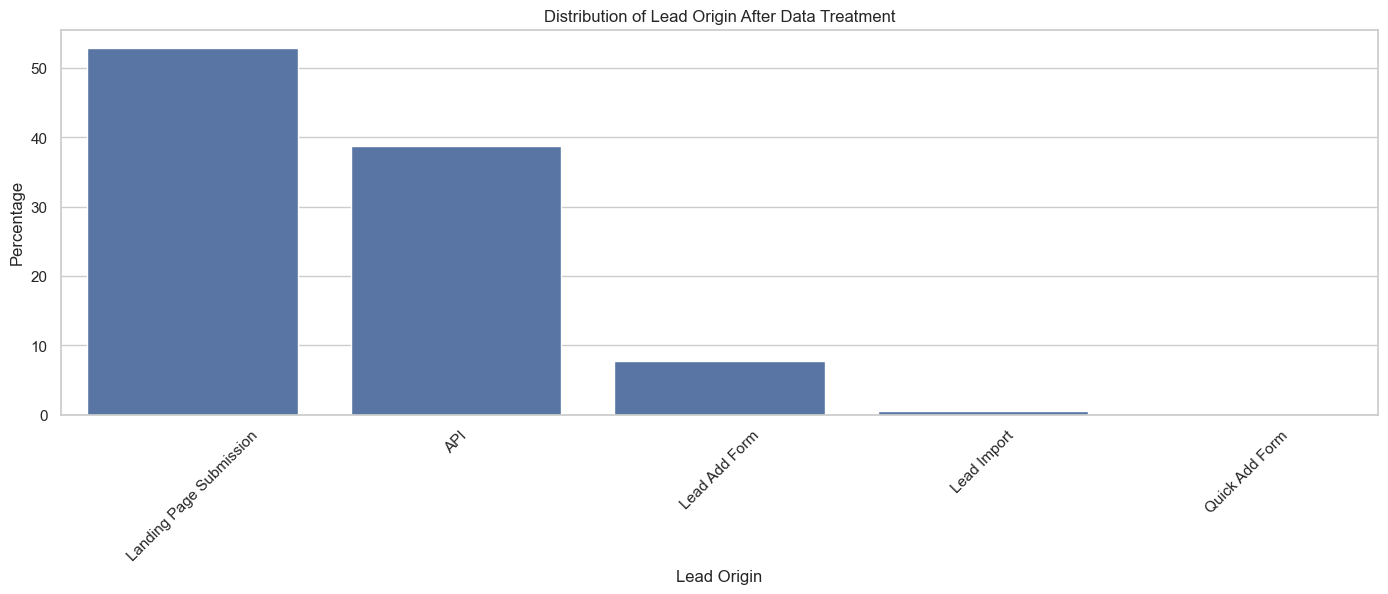


Value counts (in %) for Lead Source:
Lead Source
Google              31.428571
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Other                0.898268
Name: proportion, dtype: float64


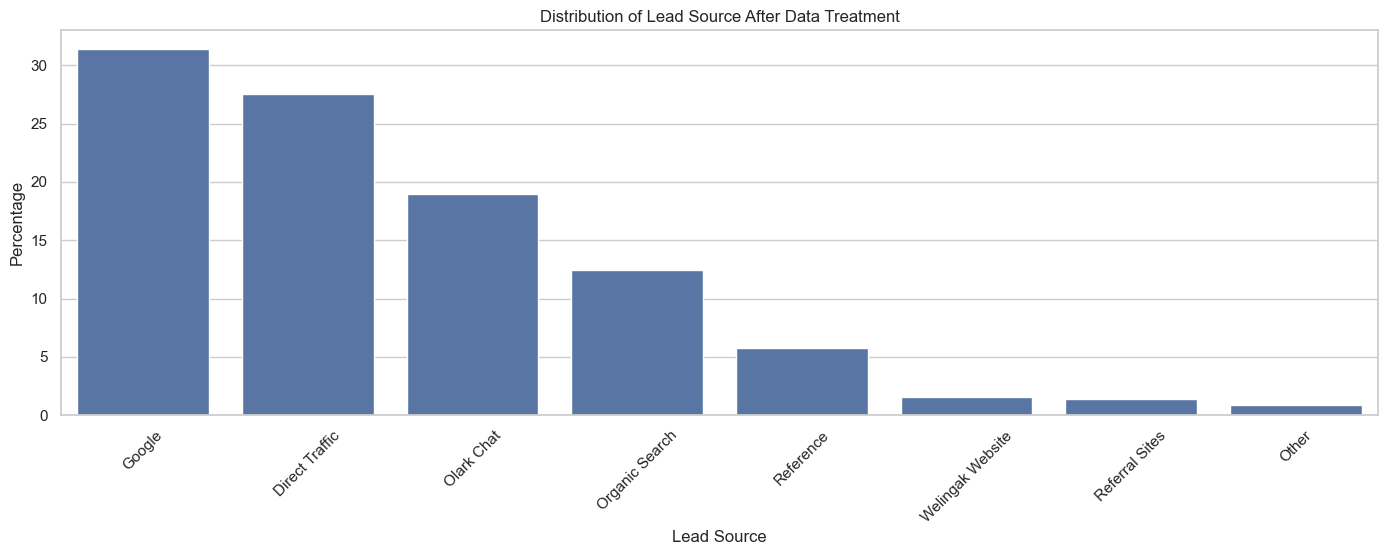


Value counts (in %) for Last Activity:
Last Activity
Email Opened               38.311688
SMS Sent                   29.707792
Olark Chat Conversation    10.530303
Other                       8.106061
Page Visited on Website     6.926407
Email Bounced               3.528139
Email Link Clicked          2.889610
Name: proportion, dtype: float64


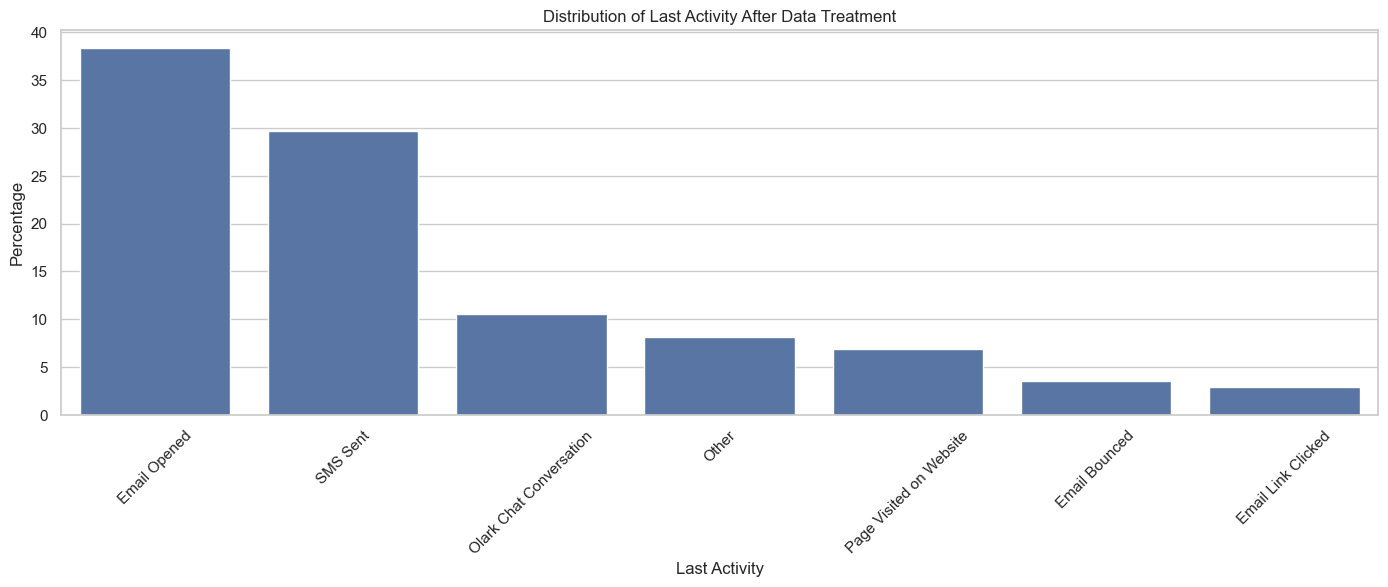


Value counts (in %) for Specialization:
Specialization
Not Specified                        36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Other                                 0.432900
Name: proportion, dtype: float64


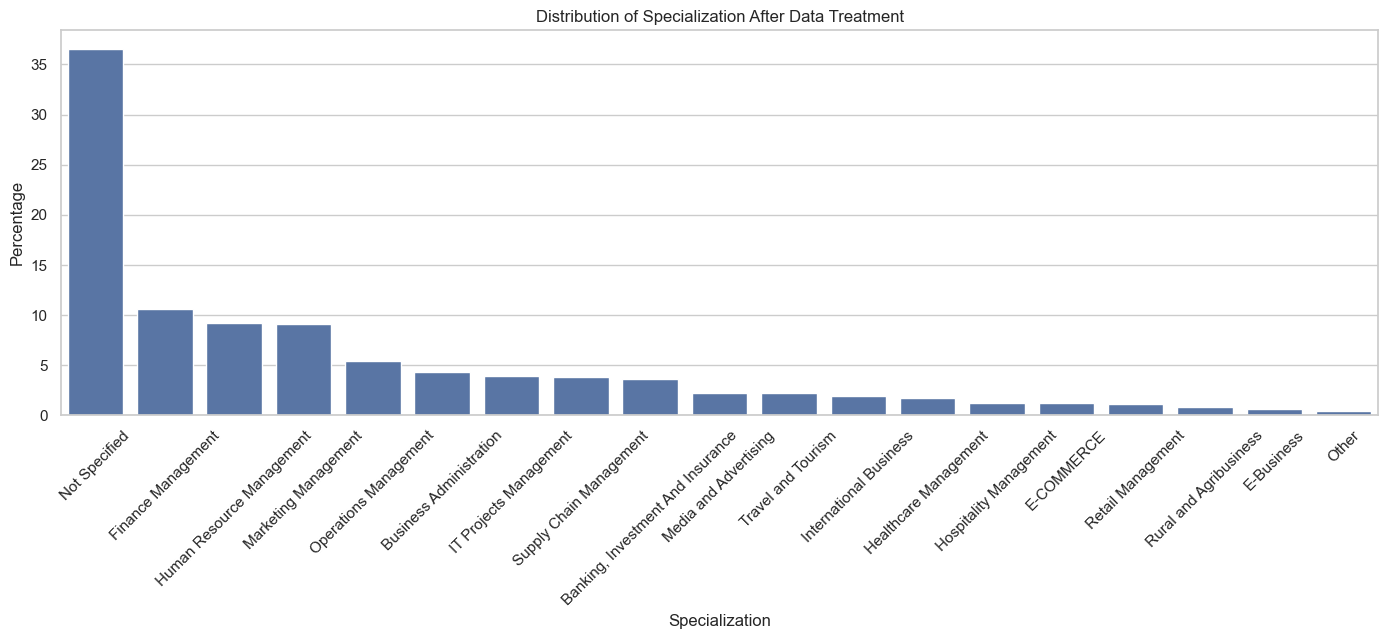


Value counts (in %) for How did you hear about X Education:
How did you hear about X Education
Not Provided     78.463203
Other            12.792208
Online Search     8.744589
Name: proportion, dtype: float64


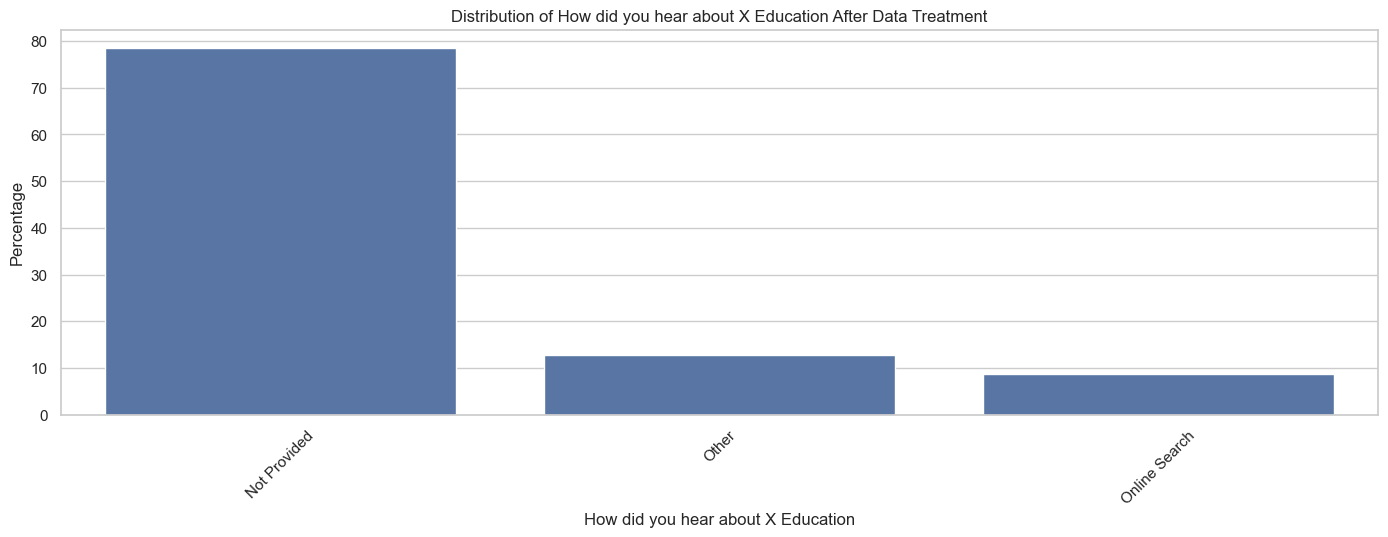


Value counts (in %) for Lead Profile:
Lead Profile
Not Categorized          74.188312
Potential Lead           17.456710
Other Leads               5.746753
Student of SomeSchool     2.608225
Name: proportion, dtype: float64


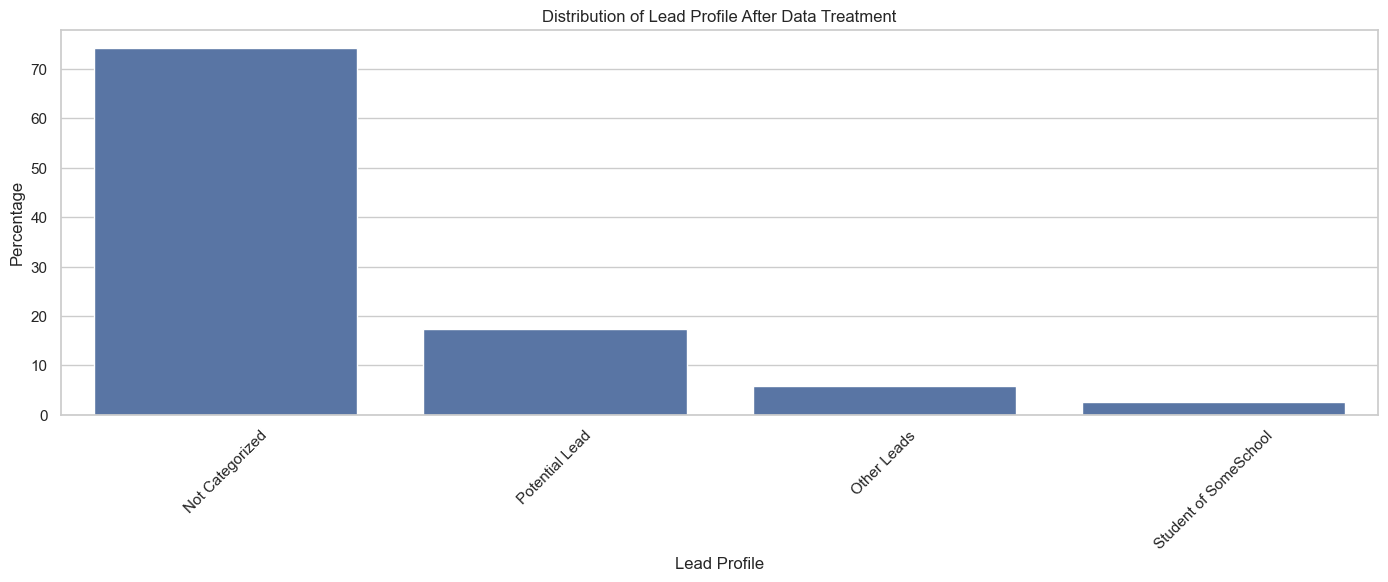


Value counts (in %) for City:
City
Mumbai                         50.238095
Other Cities                   31.764069
Thane & Outskirts               8.138528
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: proportion, dtype: float64


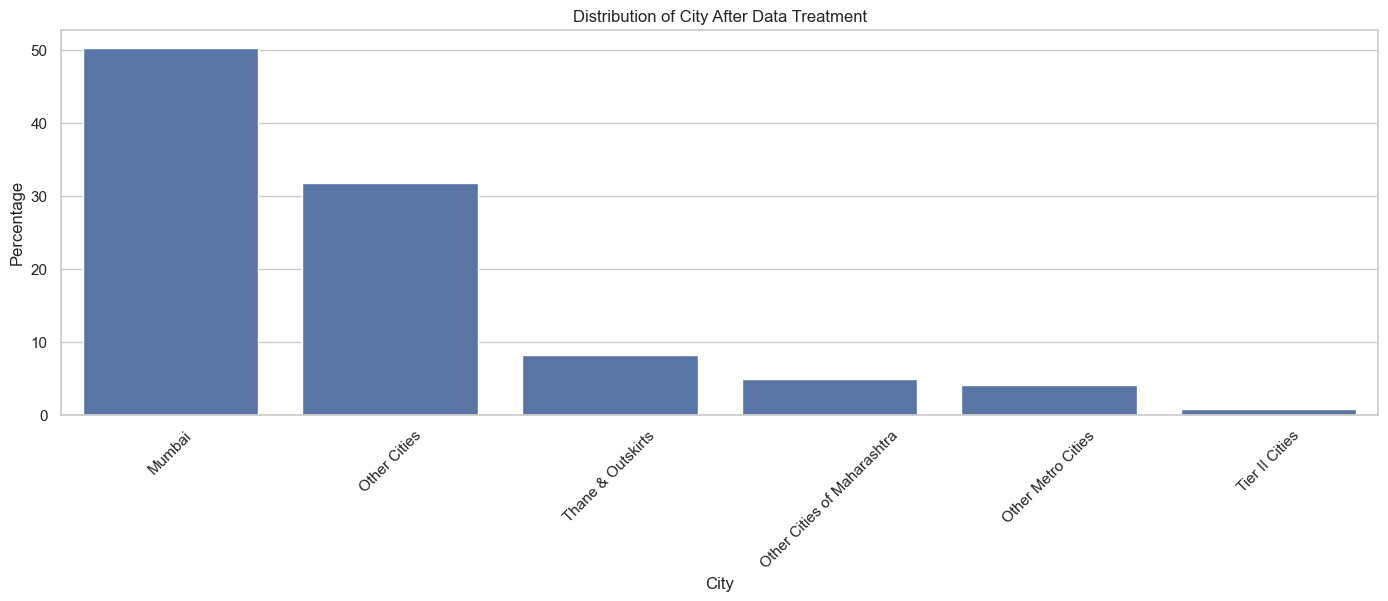


Value counts (in %) for A free copy of Mastering The Interview:
A free copy of Mastering The Interview
No     68.744589
Yes    31.255411
Name: proportion, dtype: float64


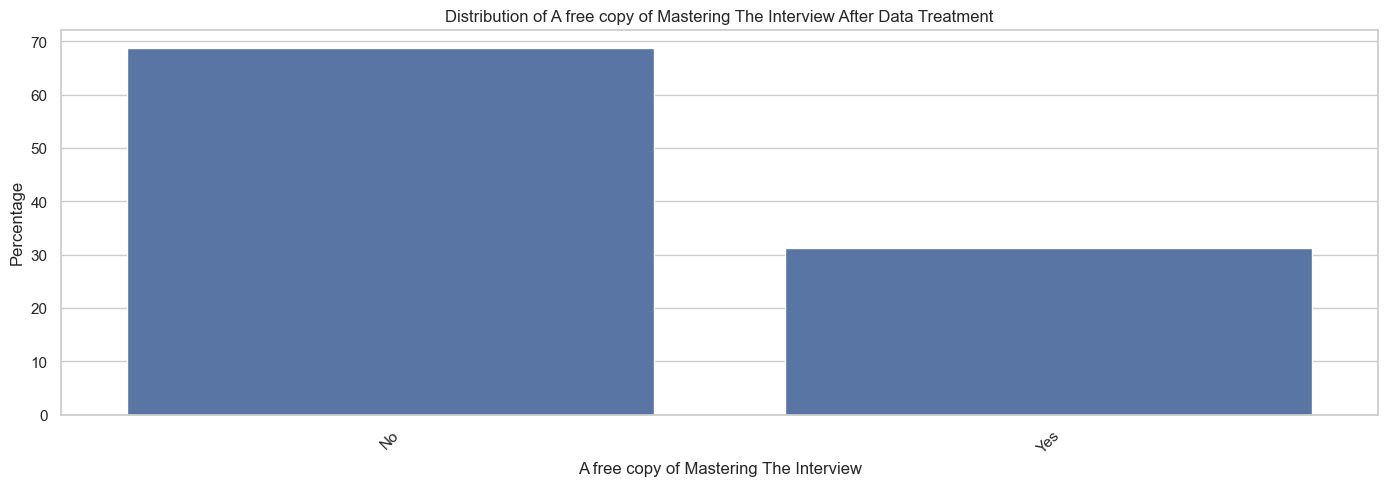


Value counts (in %) for Last Notable Activity:
Last Notable Activity
Modified        36.872294
Email Opened    30.595238
SMS Sent        23.506494
Other            9.025974
Name: proportion, dtype: float64


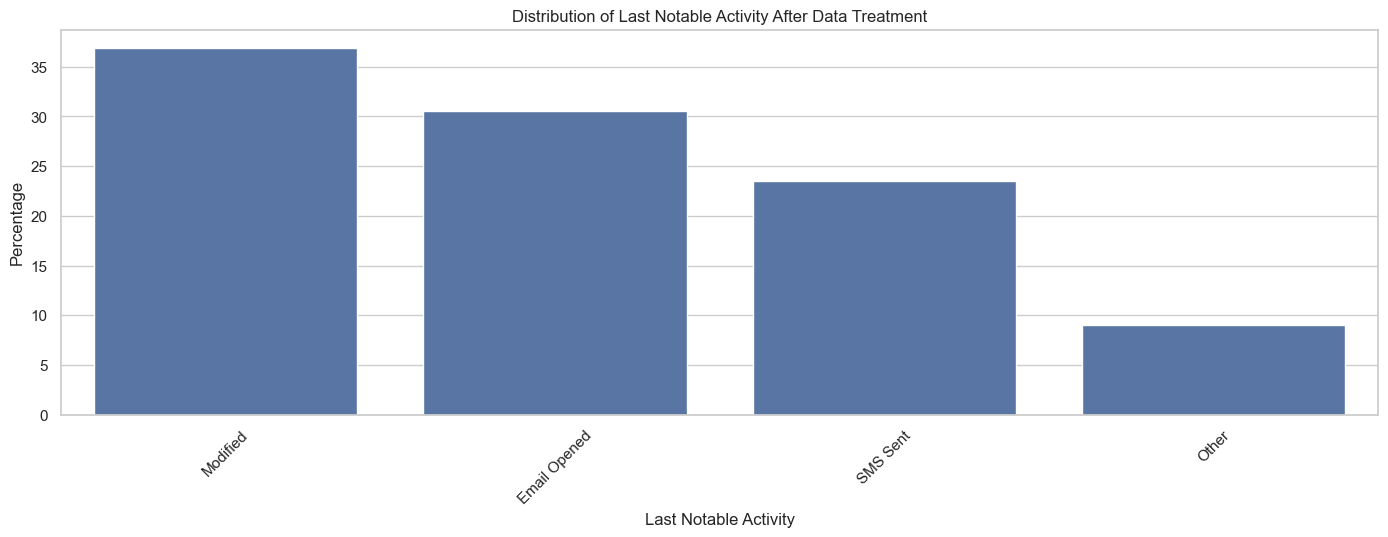


Value counts (in %) for Continent:
Continent
Asia        70.833333
Non-Asia    29.166667
Name: proportion, dtype: float64


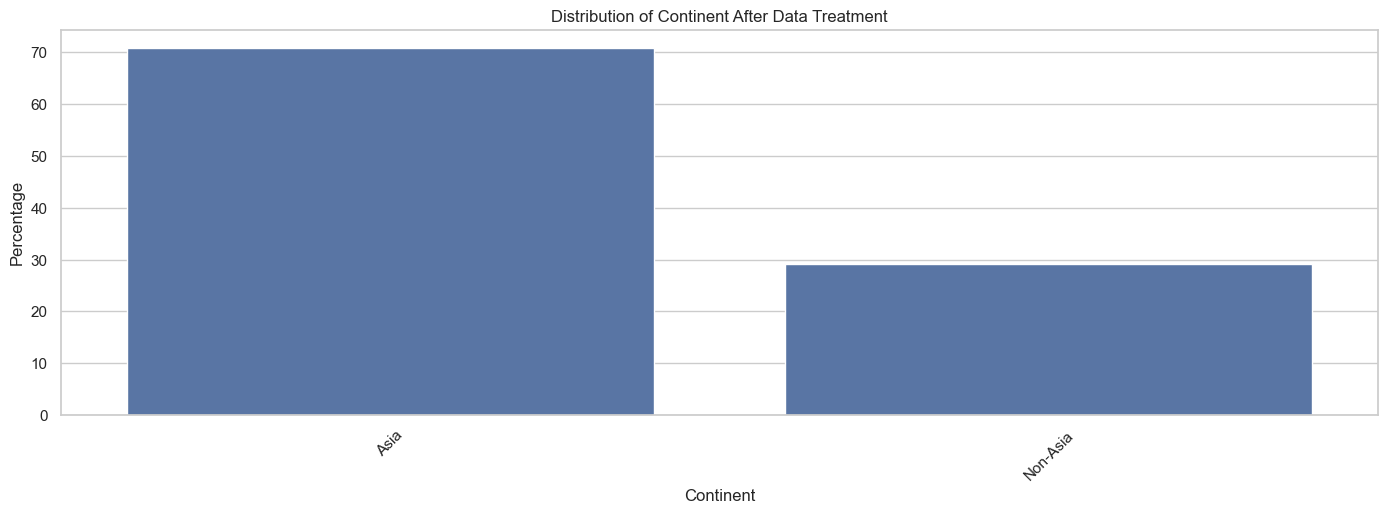

In [80]:
# List of columns to exclude (ID-like and target columns)
exclude_columns = ['Prospect ID', 'Lead Number', 'Converted']  # Add more ID-like columns here if needed

# Selecting only categorical columns excluding the specified columns
categorical_columns = df_X.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col not in exclude_columns]

# Plotting value counts and calculating percentages for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(17, 5))
    
    # Calculating value counts in percentage
    value_counts = (df_X[col].value_counts(normalize=True) * 100).sort_values(ascending=False)
    
    # Plotting
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f'Distribution of {col} After Data Treatment')
    plt.ylabel('Percentage')
    plt.xlabel(f'{col}')
    plt.xticks(rotation=45)
    
    # Display the value counts
    print(f"\nValue counts (in %) for {col}:")
    print(value_counts)
    
    # Display the plot
    plt.show()


### Final Treatment of Lead Origin:

After merging smaller categories like 'Lead Add Form,' 'Lead Import,' and 'Quick Add Form' into 'Other,' the final distribution of "Lead Origin" is as follows:

- **Landing Page Submission:** 52.88%
- **API:** 38.74%
- **Other:** 8.38%

This consolidation reduces the noise from smaller categories, ensuring that the model does not overfit to less-represented classes. The updated feature now provides a more balanced view, simplifying the analysis and model-building process.

The treatment applied here helps in maintaining a balance between retaining important information and reducing the impact of low-frequency categories. This can lead to a better-performing model with improved generalization.


In [82]:
# Merge smaller categories into 'Other' in Lead Origin
df_X['Lead Origin'] = df_X['Lead Origin'].replace(['Lead Add Form', 'Lead Import', 'Quick Add Form'], 'Other')

# Verify the changes
lead_origin_distribution = df_X['Lead Origin'].value_counts(normalize=True) * 100
print(lead_origin_distribution)


Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Other                       8.376623
Name: proportion, dtype: float64


In [83]:
# Checking for null values in all columns except ID-like columns
null_values = df_X.drop(['Prospect ID', 'Lead Number'], axis=1).isnull().sum()

# Checking for outliers in numeric columns (ignoring ID-like columns)
numeric_columns = df_X.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = [col for col in numeric_columns if col not in ['Prospect ID', 'Lead Number']]

# Using the Interquartile Range (IQR) method to detect outliers
outliers_summary = {}
for col in numeric_columns:
    Q1 = df_X[col].quantile(0.25)
    Q3 = df_X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_summary[col] = ((df_X[col] < lower_bound) | (df_X[col] > upper_bound)).sum()

# Displaying null values
print("Null Values:")
print(null_values)

# Displaying outliers summary
print("\nOutliers Summary:")
for col, outliers in outliers_summary.items():
    print(f"{col}: {outliers} outliers")


Null Values:
Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
How did you hear about X Education        0
Lead Profile                              0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
Continent                                 0
dtype: int64

Outliers Summary:
Converted: 0 outliers
TotalVisits: 10 outliers
Total Time Spent on Website: 0 outliers
Page Views Per Visit: 50 outliers


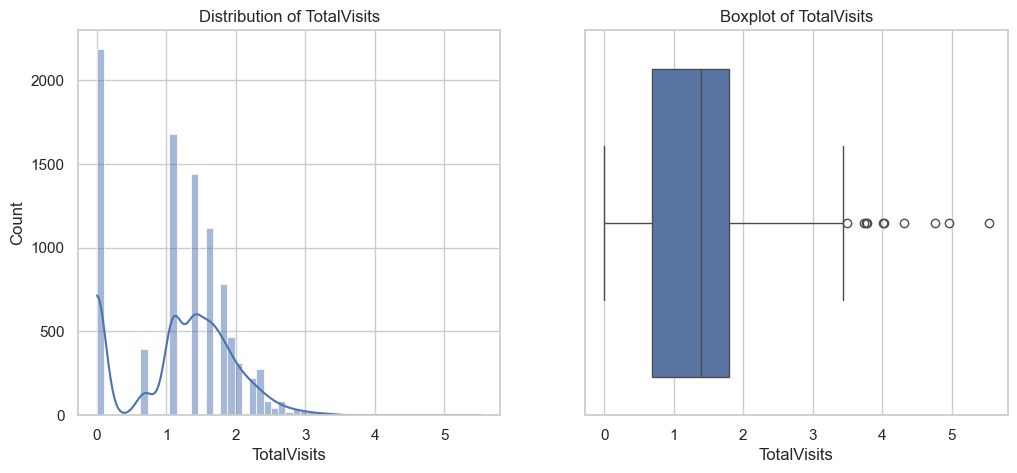

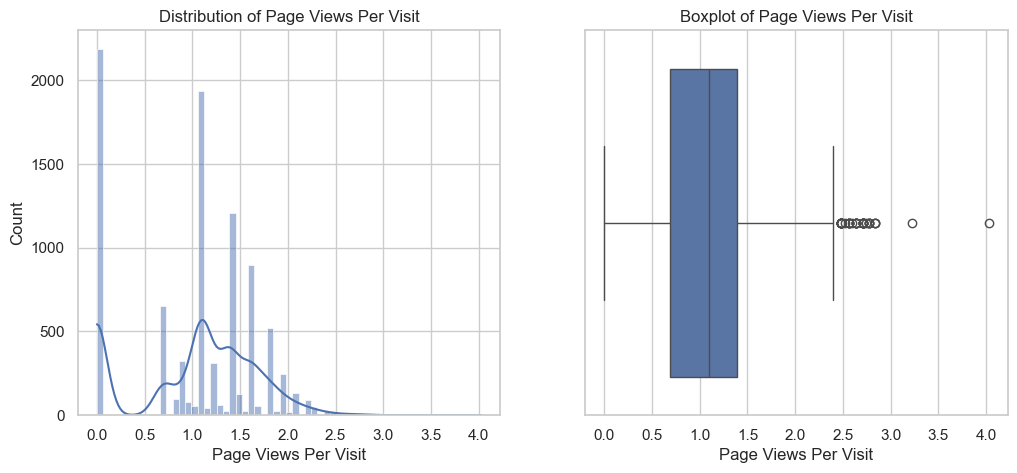

In [84]:
# Plot distribution for TotalVisits and Page Views Per Visit
for col in ['TotalVisits', 'Page Views Per Visit']:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_X[col], kde=True)
    plt.title(f'Distribution of {col}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_X[col])
    plt.title(f'Boxplot of {col}')
    
    plt.show()


In [85]:
# Correlation with 'Converted'
correlation = df_X[['TotalVisits', 'Page Views Per Visit', 'Converted']].corr()
print("Correlation Matrix:")
print(correlation)


Correlation Matrix:
                      TotalVisits  Page Views Per Visit  Converted
TotalVisits              1.000000              0.894829   0.021099
Page Views Per Visit     0.894829              1.000000  -0.013861
Converted                0.021099             -0.013861   1.000000


In [86]:
# Selecting numeric columns for VIF check
numeric_columns = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

# Adding a constant column for VIF calculation
X = sm.add_constant(df_X[numeric_columns])

# Calculating VIF for each variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Displaying the VIF values
print(vif)


   VIF Factor                     features
0    3.484711                        const
1    5.118074                  TotalVisits
2    5.059992         Page Views Per Visit
3    1.257931  Total Time Spent on Website


In [87]:
df_X.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Converted  TotalVisits  Total Time Spent on Website  \
0      Olark Chat          0     0.000000                            0   
1  Organic Search          0     1.791759                          674   
2  Direct Traffic          1     1.098612                         1532   
3  Direct Traffic          0     0.693147                          305   
4          Google          1     1.098612                         1428   

   Page Views Per Visit            Last Activity           Specialization  \
0              0.000000  Page Visited on Website            Not Specified   
1              1.252763             Email Opened            Not Specified   
2              1.098612             Email Opened  Business Administration   
3              0.693147                    Other    Media and Advertising   
4              0.693147                    Other            Not Specified   

  How did you hear about X Education     Lead Profile          City  \
0                       Not Provided  Not Categorized  Other Cities   
1                       Not Provided  Not Categorized  Other Cities   
2                       Not Provided   Potential Lead        Mumbai   
3                              Other  Not Categorized        Mumbai   
4                              Other  Not Categorized        Mumbai   

  A free copy of Mastering The Interview Last Notable Activity Continent  
0                                     No              Modified  Non-Asia  
1                                     No          Email Opened      Asia  
2                                    Yes          Email Opened      Asia  
3                                     No              Modified      Asia  
4                                     No              Modified      Asia

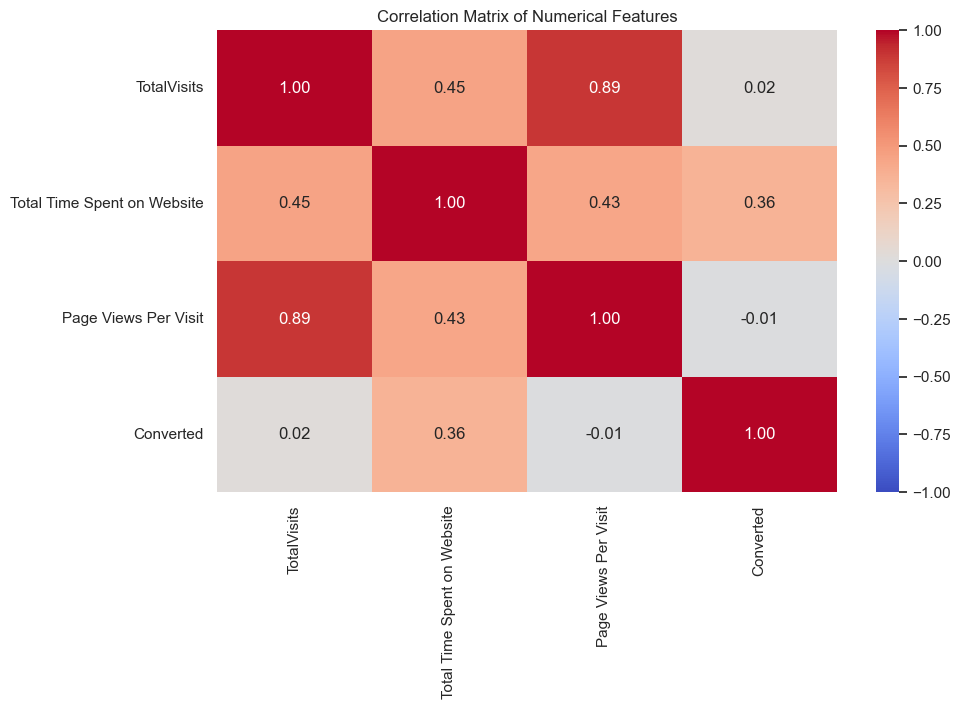


Correlation of features with 'Converted':
 Total Time Spent on Website    0.362483
TotalVisits                    0.021099
Page Views Per Visit          -0.013861
Name: Converted, dtype: float64

Highly correlated feature pairs:
 TotalVisits           Page Views Per Visit    0.894829
Page Views Per Visit  TotalVisits             0.894829
dtype: float64


In [88]:
# Selecting the original numerical features
numerical_columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted']

# Calculating the correlation matrix
correlation_matrix = df_X[numerical_columns].corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Focusing on correlation with the target 'Converted'
corr_with_target = correlation_matrix['Converted'].drop('Converted').sort_values(ascending=False)
print("\nCorrelation of features with 'Converted':\n", corr_with_target)

# Highlight features that are highly correlated with each other (optional, generally we look at correlation > 0.7)
high_corr_features = correlation_matrix.unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_features[(high_corr_features > 0.7) & (high_corr_features < 1)]
print("\nHighly correlated feature pairs:\n", high_corr_pairs)


In [89]:
unique_values_total_time_spent = df_X['Total Time Spent on Website'].unique()
print(unique_values_total_time_spent)


[   0  674 1532 ...  603  483  927]


# 4th drop 
# Feature Reduction: Dropping 'Page Views Per Visit'

Given the high correlation (0.89) between **TotalVisits** and **Page Views Per Visit**, and their low correlation with the target variable **Converted**, we decided to drop **Page Views Per Visit** to avoid multicollinearity issues. This step ensures that the model remains focused on the most impactful features.

We'll retain **TotalVisits** and **Total Time Spent on Website**, as these capture the necessary engagement metrics.


In [91]:
# Dropping 'Page Views Per Visit' from the dataset
df_X = df_X.drop(columns=['Page Views Per Visit'])

# Verify that the column has been dropped
print(df_X.columns)


Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Last Activity',
       'Specialization', 'How did you hear about X Education', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity', 'Continent'],
      dtype='object')


In [92]:
df_X.shape

(9240, 15)

In [93]:
df_X.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Converted  TotalVisits  Total Time Spent on Website  \
0      Olark Chat          0     0.000000                            0   
1  Organic Search          0     1.791759                          674   
2  Direct Traffic          1     1.098612                         1532   
3  Direct Traffic          0     0.693147                          305   
4          Google          1     1.098612                         1428   

             Last Activity           Specialization  \
0  Page Visited on Website            Not Specified   
1             Email Opened            Not Specified   
2             Email Opened  Business Administration   
3                    Other    Media and Advertising   
4                    Other            Not Specified   

  How did you hear about X Education     Lead Profile          City  \
0                       Not Provided  Not Categorized  Other Cities   
1                       Not Provided  Not Categorized  Other Cities   
2                       Not Provided   Potential Lead        Mumbai   
3                              Other  Not Categorized        Mumbai   
4                              Other  Not Categorized        Mumbai   

  A free copy of Mastering The Interview Last Notable Activity Continent  
0                                     No              Modified  Non-Asia  
1                                     No          Email Opened      Asia  
2                                    Yes          Email Opened      Asia  
3                                     No              Modified      Asia  
4                                     No              Modified      Asia

# Further Bi and Multivariate analysis 


In [95]:
# Function to perform chi-square test between a categorical feature and the target 'Converted'
def chi_square_test(df, column):
    contingency_table = pd.crosstab(df[column], df['Converted'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return p

# List of categorical columns to test
categorical_columns = ['City', 'Lead Profile', 'Lead Origin', 'Lead Source', 
                       'How did you hear about X Education', 'Specialization']

# Perform chi-square test for each categorical column
for col in categorical_columns:
    p_value = chi_square_test(df_X, col)
    print(f"Chi-square test between '{col}' and 'Converted': p-value = {p_value:.4f}")


Chi-square test between 'City' and 'Converted': p-value = 0.0000
Chi-square test between 'Lead Profile' and 'Converted': p-value = 0.0000
Chi-square test between 'Lead Origin' and 'Converted': p-value = 0.0000
Chi-square test between 'Lead Source' and 'Converted': p-value = 0.0000
Chi-square test between 'How did you hear about X Education' and 'Converted': p-value = 0.0002
Chi-square test between 'Specialization' and 'Converted': p-value = 0.0000


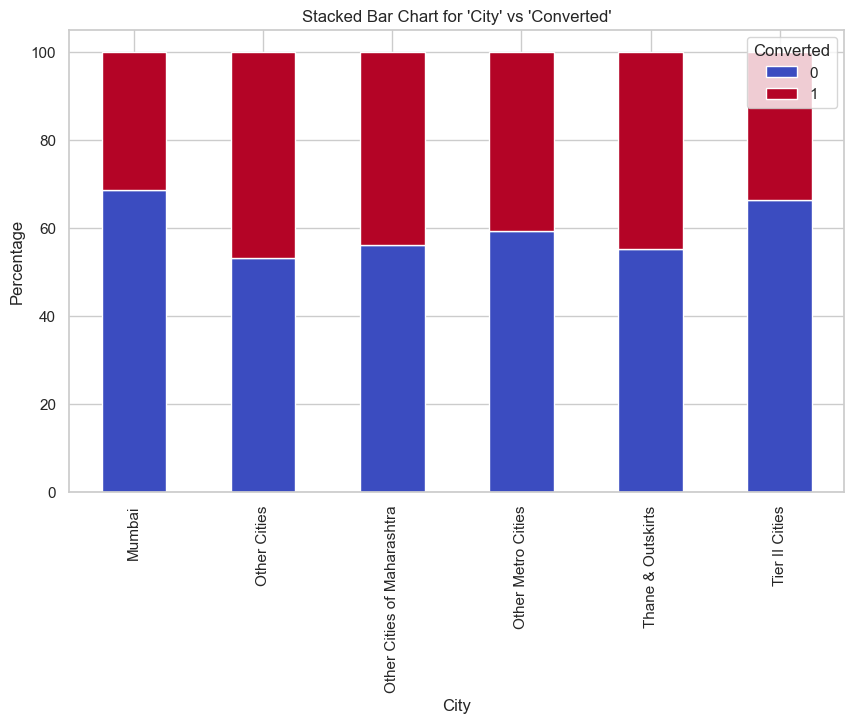

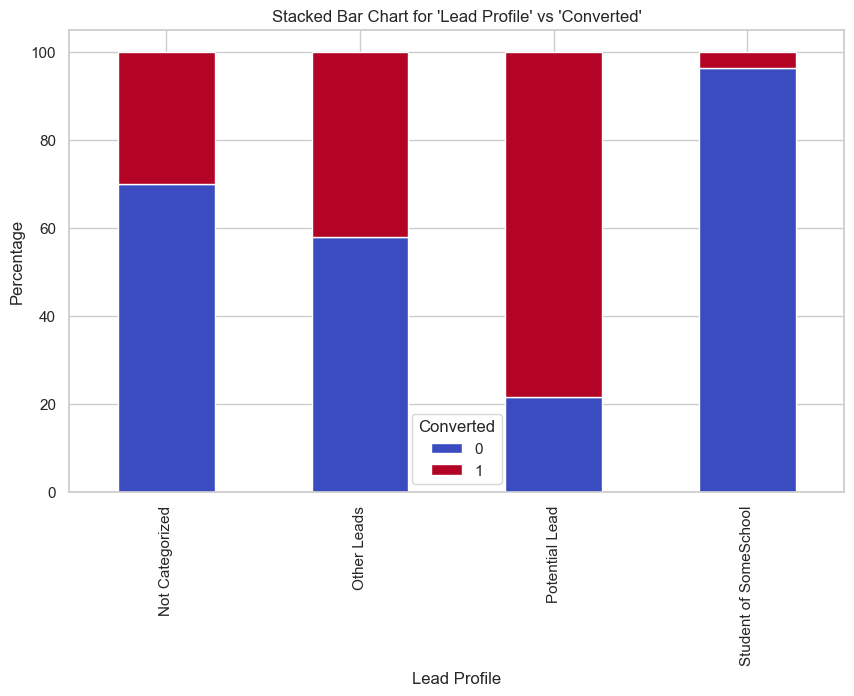

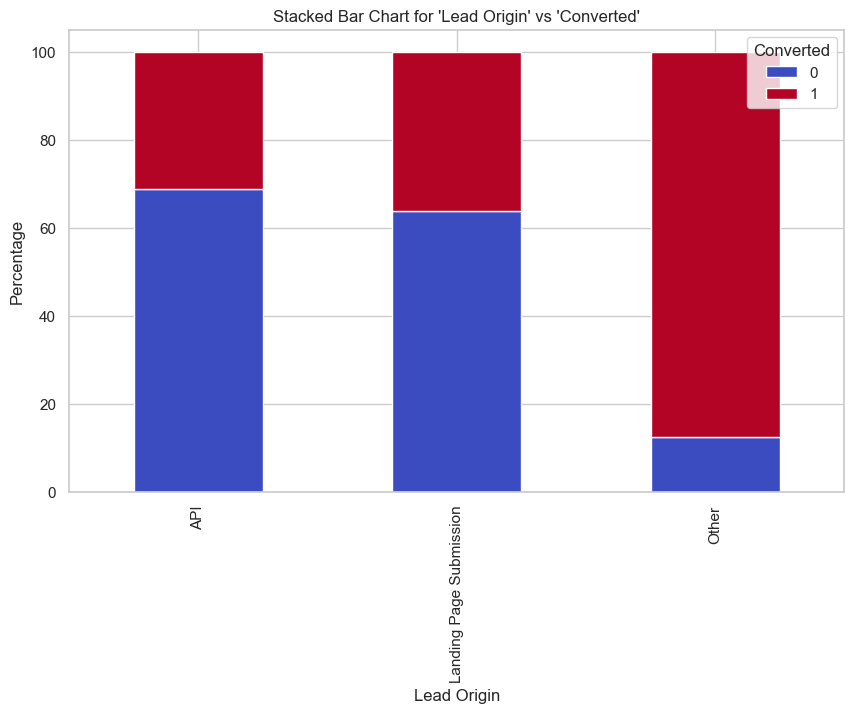

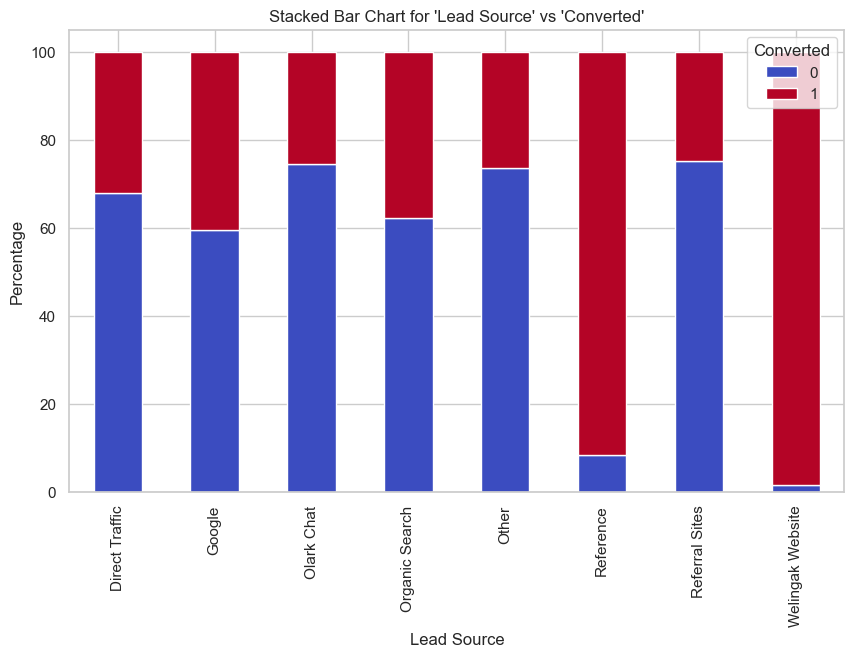

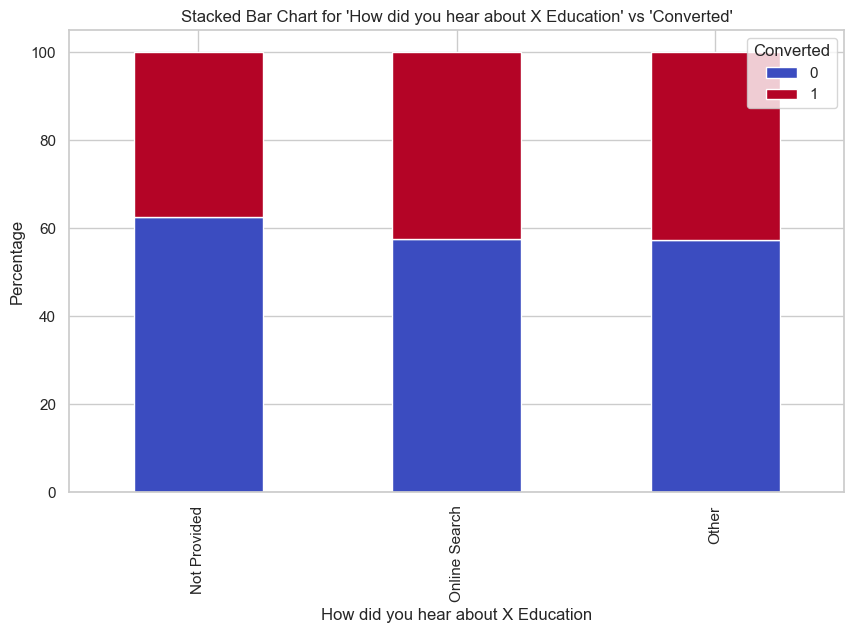

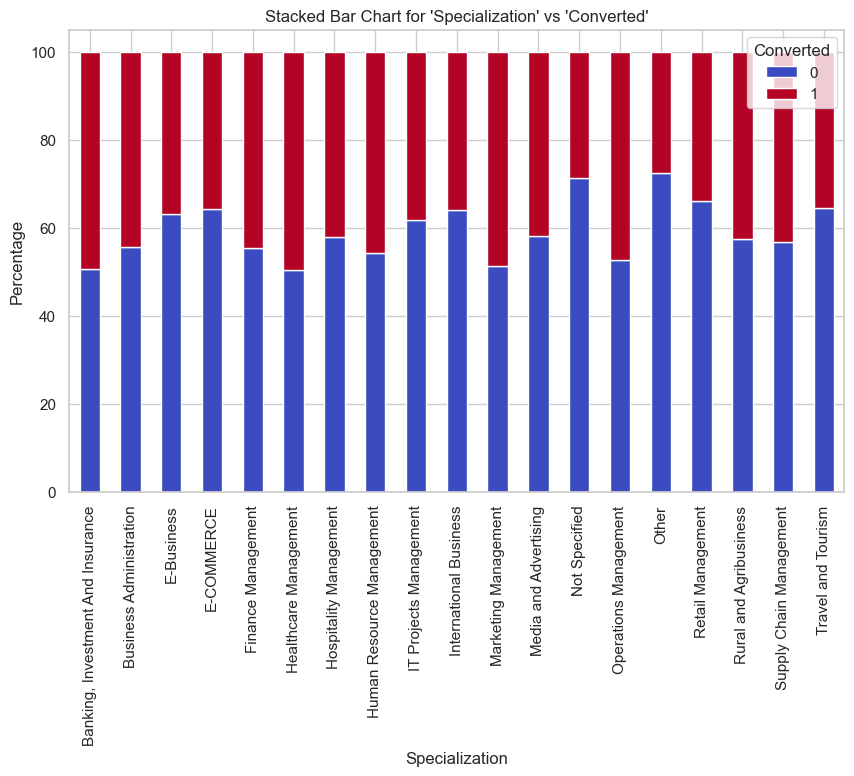

In [96]:
# Plot stacked bar chart for categorical features vs 'Converted'
def stacked_bar_chart(df, column):
    cross_tab = pd.crosstab(df[column], df['Converted'], normalize='index') * 100
    cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
    plt.title(f"Stacked Bar Chart for '{column}' vs 'Converted'")
    plt.ylabel('Percentage')
    plt.show()

# Plot for each categorical column
for col in categorical_columns:
    stacked_bar_chart(df_X, col)


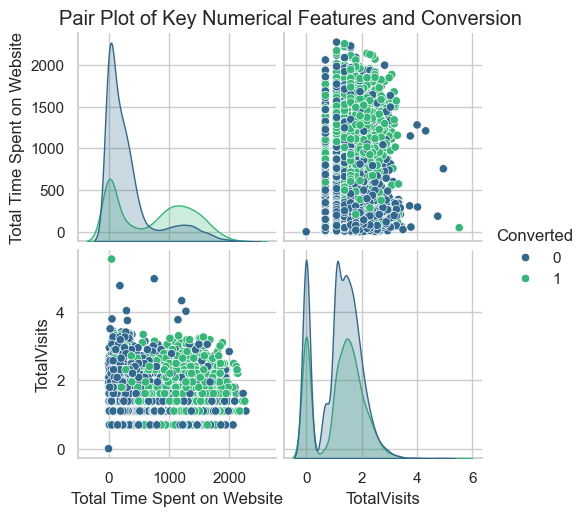

In [97]:
# Pair Plot for key numerical features and conversion
sns.pairplot(df_X, vars=['Total Time Spent on Website', 'TotalVisits'], hue='Converted', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Key Numerical Features and Conversion', y=1.02)
plt.show()


C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\1340736345.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Converted', y='TotalVisits', data=df_X, palette='viridis')


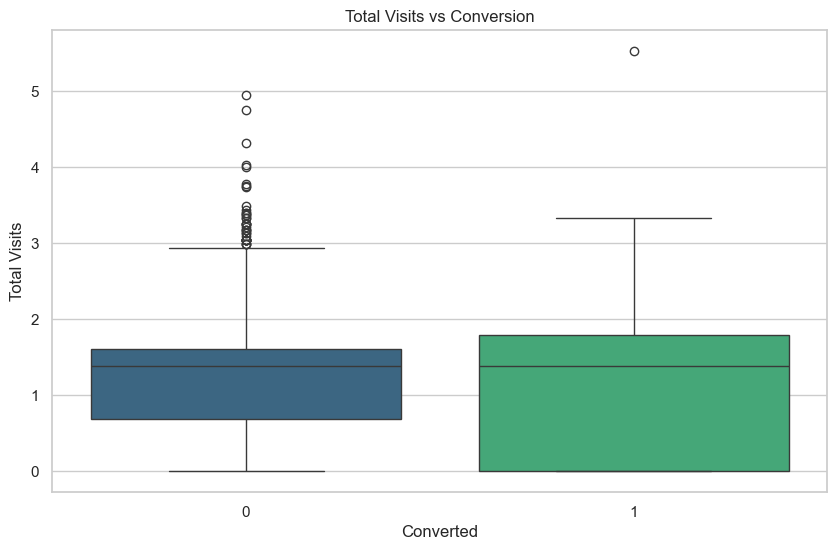

In [98]:
# Box Plot for Total Visits and Conversion
plt.figure(figsize=(10, 6))
sns.boxplot(x='Converted', y='TotalVisits', data=df_X, palette='viridis')
plt.title('Total Visits vs Conversion')
plt.xlabel('Converted')
plt.ylabel('Total Visits')
plt.show()


C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\961355815.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Converted', y='Total Time Spent on Website', data=df_X, palette='viridis')


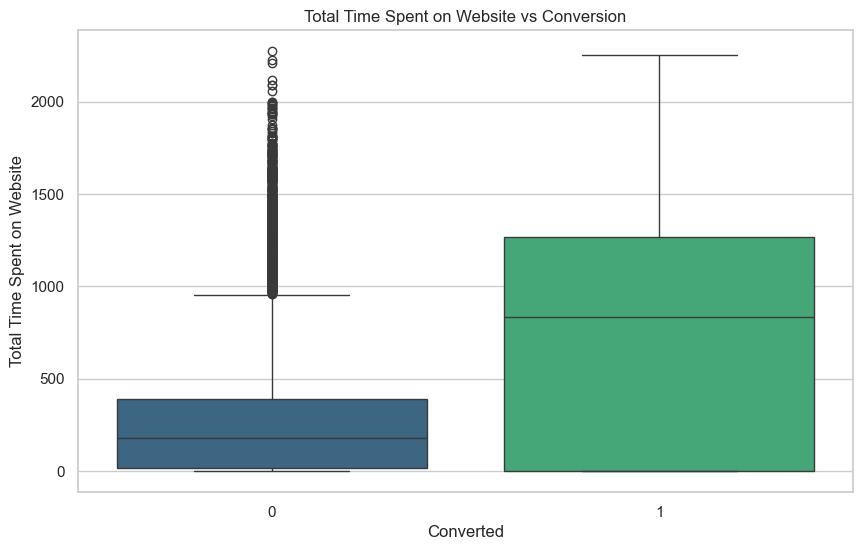

In [99]:
# Box Plot for Total Time Spent on Website and Conversion
plt.figure(figsize=(10, 6))
sns.boxplot(x='Converted', y='Total Time Spent on Website', data=df_X, palette='viridis')
plt.title('Total Time Spent on Website vs Conversion')
plt.xlabel('Converted')
plt.ylabel('Total Time Spent on Website')
plt.show()


In [100]:
# Group by 'Lead Source' and calculate conversion rates
lead_source_grouped = df_X.groupby('Lead Source')['Converted'].mean() * 100
print("Conversion rates by Lead Source:\n", lead_source_grouped)

# Group by 'Specialization' and calculate conversion rates
specialization_grouped = df_X.groupby('Specialization')['Converted'].mean() * 100
print("\nConversion rates by Specialization:\n", specialization_grouped)

# Group by 'City' and calculate average Total Time Spent on Website
city_grouped_time_spent = df_X.groupby('City')['Total Time Spent on Website'].mean()
print("\nAverage Total Time Spent on Website by City:\n", city_grouped_time_spent)

# Group by 'Lead Source' and calculate average Total Time Spent on Website
lead_source_grouped_time_spent = df_X.groupby('Lead Source')['Total Time Spent on Website'].mean()
print("\nAverage Total Time Spent on Website by Lead Source:\n", lead_source_grouped_time_spent)


Conversion rates by Lead Source:
 Lead Source
Direct Traffic      32.166732
Google              40.495868
Olark Chat          25.527066
Organic Search      37.781629
Other               26.506024
Reference           91.760300
Referral Sites      24.800000
Welingak Website    98.591549
Name: Converted, dtype: float64

Conversion rates by Specialization:
 Specialization
Banking, Investment And Insurance    49.408284
Business Administration              44.416873
E-Business                           36.842105
E-COMMERCE                           35.714286
Finance Management                   44.672131
Healthcare Management                49.685535
Hospitality Management               42.105263
Human Resource Management            45.754717
IT Projects Management               38.251366
International Business               35.955056
Marketing Management                 48.687351
Media and Advertising                41.871921
Not Specified                        28.668639
Operations Managem

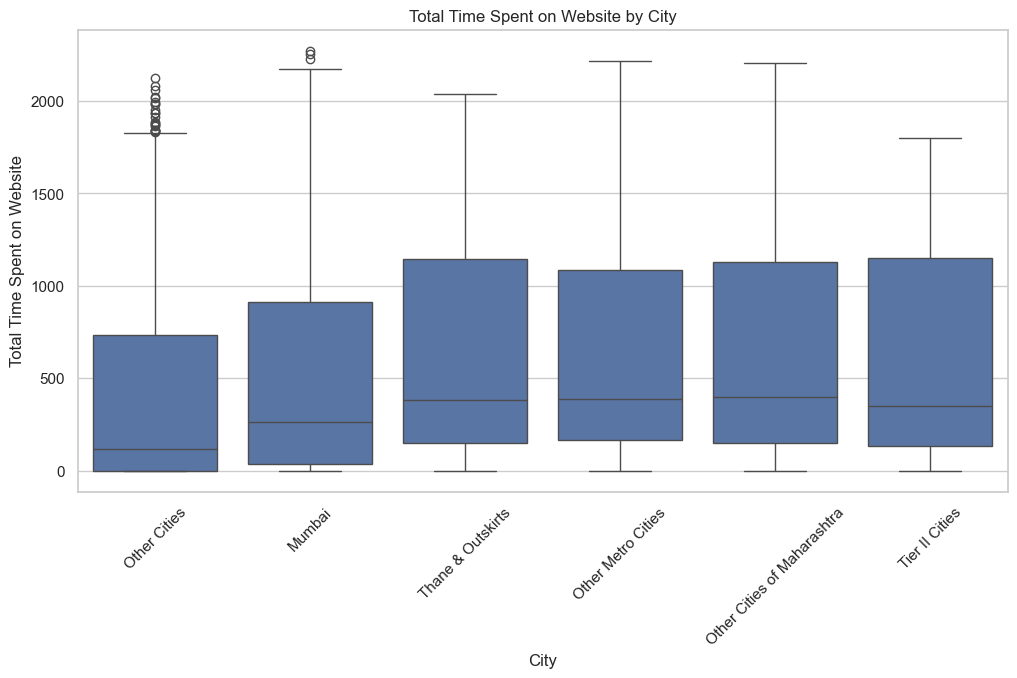

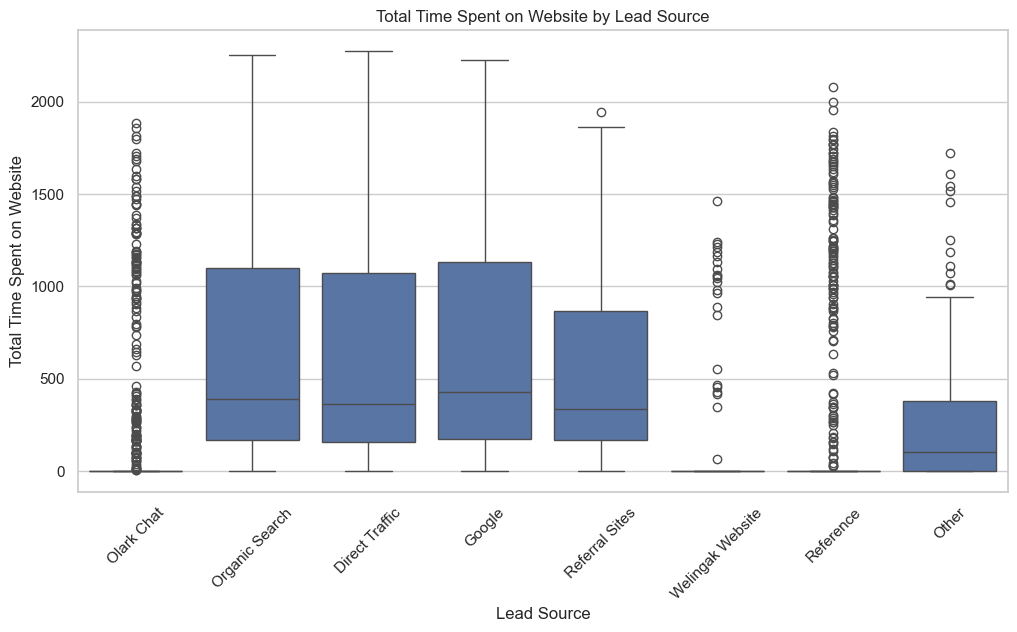

In [101]:
# Box plot for Total Time Spent on Website by City
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Total Time Spent on Website', data=df_X)
plt.xticks(rotation=45)
plt.title('Total Time Spent on Website by City')
plt.show()

# Box plot for Total Time Spent on Website by Lead Source
plt.figure(figsize=(12, 6))
sns.boxplot(x='Lead Source', y='Total Time Spent on Website', data=df_X)
plt.xticks(rotation=45)
plt.title('Total Time Spent on Website by Lead Source')
plt.show()


In [102]:
conversion_rates = df_X.groupby('How did you hear about X Education')['Converted'].mean()
print(conversion_rates)


How did you hear about X Education
Not Provided     0.374345
Online Search    0.424505
Other            0.426396
Name: Converted, dtype: float64


In [103]:
conversion_rates_city = df_X.groupby('City')['Converted'].mean()
print(conversion_rates_city)


City
Mumbai                         0.315166
Other Cities                   0.469847
Other Cities of Maharashtra    0.439825
Other Metro Cities             0.407895
Thane & Outskirts              0.449468
Tier II Cities                 0.337838
Name: Converted, dtype: float64


In [104]:
print(df_X.columns)


Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Last Activity',
       'Specialization', 'How did you hear about X Education', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity', 'Continent'],
      dtype='object')


# Feature Creation: Interaction Term [interaction_TimeSpent_LeadSource]

### We create a new feature to capture the interaction between `Total Time Spent on Website` and `Lead Source`. This helps the model learn how the combined effect of these features influences the target.

In [106]:
# Creating interaction term between 'Total Time Spent on Website' and 'Lead Source'
df_X['interaction_TimeSpent_LeadSource'] = df_X['Total Time Spent on Website'] * df_X['Lead Source'].astype('category').cat.codes

In [107]:
df_X.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Converted  TotalVisits  Total Time Spent on Website  \
0      Olark Chat          0     0.000000                            0   
1  Organic Search          0     1.791759                          674   
2  Direct Traffic          1     1.098612                         1532   
3  Direct Traffic          0     0.693147                          305   
4          Google          1     1.098612                         1428   

             Last Activity           Specialization  \
0  Page Visited on Website            Not Specified   
1             Email Opened            Not Specified   
2             Email Opened  Business Administration   
3                    Other    Media and Advertising   
4                    Other            Not Specified   

  How did you hear about X Education     Lead Profile          City  \
0                       Not Provided  Not Categorized  Other Cities   
1                       Not Provided  Not Categorized  Other Cities   
2                       Not Provided   Potential Lead        Mumbai   
3                              Other  Not Categorized        Mumbai   
4                              Other  Not Categorized        Mumbai   

  A free copy of Mastering The Interview Last Notable Activity Continent  \
0                                     No              Modified  Non-Asia   
1                                     No          Email Opened      Asia   
2                                    Yes          Email Opened      Asia   
3                                     No              Modified      Asia   
4                                     No              Modified      Asia   

   interaction_TimeSpent_LeadSource  
0                                 0  
1                              2022  
2                                 0  
3                                 0  
4                              1428

In [108]:
# Select only the numeric columns for VIF calculation
numeric_columns = ['TotalVisits', 'Total Time Spent on Website', 'interaction_TimeSpent_LeadSource']

# Create a DataFrame with these numeric columns
X = df_X[numeric_columns]

# Add constant column for VIF calculation
X = sm.add_constant(X)

# Calculate VIF for each variable
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif)


                           Variable       VIF
0                             const  3.328434
1                       TotalVisits  1.250777
2       Total Time Spent on Website  1.653429
3  interaction_TimeSpent_LeadSource  1.441687


In [109]:
# Check the distribution of the target variable "Converted"
target_distribution = df_X['Converted'].value_counts(normalize=True) * 100

# Print the distribution in percentages
print(target_distribution)


Converted
0    61.461039
1    38.538961
Name: proportion, dtype: float64


# Get Dummies 

In [111]:
# List of categorical columns (excluding IDs and numeric columns)
categorical_columns = [
    'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
    'How did you hear about X Education', 'Lead Profile', 'City',
    'A free copy of Mastering The Interview', 'Last Notable Activity', 'Continent'
]

# Function to print the unique values of all categorical columns
def check_unique_values(df, columns):
    for column in columns:
        unique_vals = df[column].unique()
        print(f"Unique values in {column}:")
        print(unique_vals)
        print("\n")  # Add a newline for better readability

# Call the function to check unique values for each categorical column
check_unique_values(df_X, categorical_columns)


Unique values in Lead Origin:
['API' 'Landing Page Submission' 'Other']


Unique values in Lead Source:
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'Other']


Unique values in Last Activity:
['Page Visited on Website' 'Email Opened' 'Other'
 'Olark Chat Conversation' 'Email Bounced' 'Email Link Clicked' 'SMS Sent']


Unique values in Specialization:
['Not Specified' 'Business Administration' 'Media and Advertising'
 'Supply Chain Management' 'IT Projects Management' 'Finance Management'
 'Travel and Tourism' 'Human Resource Management' 'Marketing Management'
 'Banking, Investment And Insurance' 'International Business' 'E-COMMERCE'
 'Operations Management' 'Retail Management' 'Other'
 'Hospitality Management' 'Rural and Agribusiness' 'Healthcare Management'
 'E-Business']


Unique values in How did you hear about X Education:
['Not Provided' 'Other' 'Online Search']


Unique values in Lead Profile:
['Not Categorized' 'Potent

In [112]:
df_X_no_id = df_X.drop(columns=['Prospect ID', 'Lead Number'])

# List of categorical columns (including 'Continent')
categorical_columns = [
    'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
    'How did you hear about X Education', 'Lead Profile', 'City',
    'A free copy of Mastering The Interview', 'Last Notable Activity', 'Continent'
]

# Apply get_dummies to the categorical columns and ensure the output is 0 and 1
df_X_encoded = pd.get_dummies(df_X_no_id, columns=categorical_columns, drop_first=True, dtype=int)

# Display the first few rows of the transformed dataset (after applying get_dummies)
print("Encoded dataset after applying get_dummies:")
print(df_X_encoded.head())


Encoded dataset after applying get_dummies:
   Converted  TotalVisits  Total Time Spent on Website  \
0          0     0.000000                            0   
1          0     1.791759                          674   
2          1     1.098612                         1532   
3          0     0.693147                          305   
4          1     1.098612                         1428   

   interaction_TimeSpent_LeadSource  Lead Origin_Landing Page Submission  \
0                                 0                                    0   
1                              2022                                    0   
2                                 0                                    1   
3                                 0                                    1   
4                              1428                                    1   

   Lead Origin_Other  Lead Source_Google  Lead Source_Olark Chat  \
0                  0                   0                       1   
1             

In [113]:
# Calculate the count and percentage of missing values for each column
null_counts = df_X_encoded.isnull().sum()
null_percentages = (null_counts / len(df_X_encoded)) * 100

# Combine both counts and percentages into a DataFrame for easier review
null_summary_df = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentages
})

# Display the DataFrame with null value summary
print(null_summary_df)


                                                  Null Count  Null Percentage
Converted                                                  0              0.0
TotalVisits                                                0              0.0
Total Time Spent on Website                                0              0.0
interaction_TimeSpent_LeadSource                           0              0.0
Lead Origin_Landing Page Submission                        0              0.0
Lead Origin_Other                                          0              0.0
Lead Source_Google                                         0              0.0
Lead Source_Olark Chat                                     0              0.0
Lead Source_Organic Search                                 0              0.0
Lead Source_Other                                          0              0.0
Lead Source_Reference                                      0              0.0
Lead Source_Referral Sites                                 0    

# 5th drop
### Dropping Dummy Variables for Uninformative or Redundant Categories

The following columns were dropped as they contain categories that are either **uninformative** or **redundant** for the model:

- **'Lead Source_Other'**: The "Other" category in Lead Source does not provide significant information about the source of the leads, making it unhelpful for the model.
  
- **'Last Activity_Other'**: The "Other" category in Last Activity is similarly too broad and uninformative for predicting lead conversion, so it was removed.
  
- **'Specialization_Not Specified'**: This category indicates missing or unspecified information, which does not provide meaningful insights about a lead's specialization.
  
- **'Specialization_Other'**: This category is overly generalized and does not contribute useful information for distinguishing lead behavior.
  
- **'How did you hear about X Education_Other'**: The "Other" category here is too ambiguous and does not help in identifying patterns from lead sources.
  
- **'Lead Profile_Other Leads'**: The "Other Leads" category is too broad and fails to provide actionable insights for the model.
  
- **'City_Other Cities of Maharashtra'**: While specific cities may contribute information, a general category like "Other Cities of Maharashtra" is too vague to help in modeling.
  
- **'City_Other Cities'**: This column aggregates various cities into a single "Other Cities" category, which loses specific location-based insights.
  
- **'Last Notable Activity_Other'**: This category does not contribute meaningful data for identifying patterns of lead activity, as it is a catch-all for unspecified activities.
  
- **'Lead Origin_Other'**: The "Other" category in Lead Origin lacks specificity, making it irrelevant to the model's performance.

> **Note**: The column `'City_Other Metro Cities'` was **not dropped**, as it may still provide relevant regional information that can impact lead behavior.

After dropping these columns, the dataset is cleaner and more focused on **informative categories** that will enhance the model's predictive power.



In [115]:
# Drop the dummy variables related to "Other", "Not Specified", or uninformative categories
columns_to_drop = [
    'Lead Source_Other',                 # Dropping 'Lead Source_Other'
    'Last Activity_Other',               # Dropping 'Last Activity_Other'
    'Specialization_Not Specified',      # Dropping 'Specialization_Not Specified'
    'Specialization_Other',              # Dropping 'Specialization_Other'
    'How did you hear about X Education_Other',  # Dropping 'How did you hear about X Education_Other'
    'Lead Profile_Other Leads',          # Dropping 'Lead Profile_Other Leads'
    'City_Other Cities of Maharashtra',  # Dropping 'City_Other Cities of Maharashtra'
    'City_Other Cities',                 # Dropping 'City_Other Cities'
    'Last Notable Activity_Other',       # Dropping 'Last Notable Activity_Other'
    'Lead Origin_Other'                  # Dropping 'Lead Origin_Other'
    # 'City_Other Metro Cities' is NOT dropped
]

# Ensure that the columns exist before dropping them
columns_present = [col for col in columns_to_drop if col in df_X_encoded.columns]

# Drop the dummy variables
df_X_encoded.drop(columns=columns_present, axis=1, inplace=True)

# Display the final dataset after dropping uninformative columns
print("Final dataset after dropping 'City_Other Cities', 'City_Other Cities of Maharashtra', and other uninformative categories:")
print(df_X_encoded.head())


Final dataset after dropping 'City_Other Cities', 'City_Other Cities of Maharashtra', and other uninformative categories:
   Converted  TotalVisits  Total Time Spent on Website  \
0          0     0.000000                            0   
1          0     1.791759                          674   
2          1     1.098612                         1532   
3          0     0.693147                          305   
4          1     1.098612                         1428   

   interaction_TimeSpent_LeadSource  Lead Origin_Landing Page Submission  \
0                                 0                                    0   
1                              2022                                    0   
2                                 0                                    1   
3                                 0                                    1   
4                              1428                                    1   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Searc

In [116]:
# Export df_X_encoded to an Excel file
df_X_encoded.columns


Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'interaction_TimeSpent_LeadSource',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and

In [117]:
# Select numeric columns
numeric_cols = df_X_encoded.select_dtypes(include=['number']).columns

# Value count for each numeric column
for col in numeric_cols:
    print(f"Value counts for {col}:")
    print(df_X_encoded[col].value_counts())
    print("\n")


Value counts for Converted:
Converted
0    5679
1    3561
Name: count, dtype: int64


Value counts for TotalVisits:
TotalVisits
0.000000    2189
1.098612    1680
1.386294    1443
1.609438    1120
1.791759     783
1.945910     466
0.693147     395
2.079442     309
2.197225     224
2.302585     164
2.397895     114
2.484907      86
2.639057      48
2.564949      45
2.708050      36
2.833213      21
2.772589      18
2.890372      16
2.944439      15
3.044522      12
2.995732       9
3.091042       6
3.178054       6
3.218876       5
3.258097       5
3.332205       5
3.135494       3
3.401197       2
3.367296       2
3.295837       2
4.955827       1
4.025352       1
3.433987       1
3.784190       1
4.317488       1
3.737670       1
4.007333       1
4.753590       1
5.529429       1
3.496508       1
3.761200       1
Name: count, dtype: int64


Value counts for Total Time Spent on Website:
Total Time Spent on Website
0       2193
60        19
74        18
75        18
127       18
        

# The split (divide)

In [119]:
df_X_encoded.head()

Converted  TotalVisits  Total Time Spent on Website  \
0          0     0.000000                            0   
1          0     1.791759                          674   
2          1     1.098612                         1532   
3          0     0.693147                          305   
4          1     1.098612                         1428   

   interaction_TimeSpent_LeadSource  Lead Origin_Landing Page Submission  \
0                                 0                                    0   
1                              2022                                    0   
2                                 0                                    1   
3                                 0                                    1   
4                              1428                                    1   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Reference  Lead Source_Referral Sites  ...  \
0                      0                           0  ...   
1                      0                           0  ...   
2                      0                           0  ...   
3                      0                           0  ...   
4                      0                           0  ...   

   How did you hear about X Education_Online Search  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Lead Profile_Potential Lead  Lead Profile_Student of SomeSchool  \
0                            0                                   0   
1                            0                                   0   
2                            1                                   0   
3                            0                                   0   
4                            0                                   0   

   City_Other Metro Cities  City_Thane & Outskirts  City_Tier II Cities  \
0                        0                       0                    0   
1                        0                       0                    0   
2                        0                       0                    0   
3                        0                       0                    0   
4                        0                       0                    0   

   A free copy of Mastering The Interview_Yes  Last Notable Activity_Modified  \
0                                           0                               1   
1                                           0                               0   
2                                           1                               0   
3                                           0                               1   
4                                           0                               1   

   Last Notable Activity_SMS Sent  Continent_Non-Asia  
0                               0                   1  
1                               0                   0  
2                               0                   0  
3                               0                   0  
4                               0                   0  

[5 rows x 42 columns]

In [120]:
df_X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 42 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Converted                                         9240 non-null   int64  
 1   TotalVisits                                       9240 non-null   float64
 2   Total Time Spent on Website                       9240 non-null   int64  
 3   interaction_TimeSpent_LeadSource                  9240 non-null   int64  
 4   Lead Origin_Landing Page Submission               9240 non-null   int32  
 5   Lead Source_Google                                9240 non-null   int32  
 6   Lead Source_Olark Chat                            9240 non-null   int32  
 7   Lead Source_Organic Search                        9240 non-null   int32  
 8   Lead Source_Reference                             9240 non-null   int32  
 9   Lead Source_Referra

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



# Define the target variable (Converted) and features (excluding the target variable)
X = df_X_encoded.drop(columns=['Converted'])  # Exclude the target variable
y = df_X_encoded['Converted']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (7392, 41)
Shape of X_test: (1848, 41)
Shape of y_train: (7392,)
Shape of y_test: (1848,)


# Scaling

In [123]:
from sklearn.preprocessing import MinMaxScaler

# Select only the numerical columns that need scaling (continuous variables)
numerical_columns = ['TotalVisits', 'Total Time Spent on Website']

# Select the numerical columns from X_train and X_test
X_train_numerical = X_train[numerical_columns]
X_test_numerical = X_test[numerical_columns]

# Apply MinMaxScaler to the numerical columns
scaler = MinMaxScaler()
X_train_scaled_numerical = scaler.fit_transform(X_train_numerical)
X_test_scaled_numerical = scaler.transform(X_test_numerical)

# Convert the scaled numerical data back to DataFrames with reset indices
X_train_scaled_numerical = pd.DataFrame(X_train_scaled_numerical, columns=numerical_columns, index=X_train.index)
X_test_scaled_numerical = pd.DataFrame(X_test_scaled_numerical, columns=numerical_columns, index=X_test.index)

# Now, combine the scaled numerical data with the non-numerical (categorical) data, maintaining the original index
X_train_scaled = pd.concat([X_train_scaled_numerical, X_train.drop(columns=numerical_columns)], axis=1)
X_test_scaled = pd.concat([X_test_scaled_numerical, X_test.drop(columns=numerical_columns)], axis=1)

# Print shapes to confirm they are consistent
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)


Shape of X_train_scaled: (7392, 41)
Shape of X_test_scaled: (1848, 41)


In [124]:
print(X_train_scaled.isnull().sum())  # Check for missing values
print(X_test_scaled.isnull().sum())


TotalVisits                                         0
Total Time Spent on Website                         0
interaction_TimeSpent_LeadSource                    0
Lead Origin_Landing Page Submission                 0
Lead Source_Google                                  0
Lead Source_Olark Chat                              0
Lead Source_Organic Search                          0
Lead Source_Reference                               0
Lead Source_Referral Sites                          0
Lead Source_Welingak Website                        0
Last Activity_Email Link Clicked                    0
Last Activity_Email Opened                          0
Last Activity_Olark Chat Conversation               0
Last Activity_Page Visited on Website               0
Last Activity_SMS Sent                              0
Specialization_Business Administration              0
Specialization_E-Business                           0
Specialization_E-COMMERCE                           0
Specialization_Finance Manag

In [125]:
print(f"Shape of X_train_selected: {X_train_scaled.shape}")
print(f"Shape of y_train: {y_train.shape}")


Shape of X_train_selected: (7392, 41)
Shape of y_train: (7392,)


# Control model (# ZERO)

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import statsmodels.api as sm

# -----------------------------------------------------------
# 1. Logistic Regression with sklearn (Training data only)
# -----------------------------------------------------------

# Initialize the Logistic Regression model with a random state and increased max iterations
logreg = LogisticRegression(random_state=42, max_iter=3000)

# Train the model on the training data (X_train_selected, y_train)
logreg.fit(X_train_scaled, y_train)

# Make predictions on the training data
y_train_pred = logreg.predict(X_train_scaled)

# Evaluate the model on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy (sklearn): {train_accuracy:.4f}")

# Confusion matrix and classification report for the training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Training Confusion Matrix (sklearn):")
print(conf_matrix_train)

class_report_train = classification_report(y_train, y_train_pred)
print("Training Classification Report (sklearn):")
print(class_report_train)

# -----------------------------------------------------------
# 2. Logistic Regression with statsmodels (Training data only)
# -----------------------------------------------------------

# Reset the index of both X_train_selected and y_train to avoid index misalignment
X_train_selected_reset = X_train_scaled.reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)

# Add a constant for the intercept
X_train_sm = sm.add_constant(X_train_selected_reset)

# Build the model using GLM for logistic regression
logm1 = sm.GLM(y_train_reset, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()

# Display the summary of the model
print(res.summary())


Training Accuracy (sklearn): 0.8134
Training Confusion Matrix (sklearn):
[[4022  550]
 [ 829 1991]]
Training Classification Report (sklearn):
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      4572
           1       0.78      0.71      0.74      2820

    accuracy                           0.81      7392
   macro avg       0.81      0.79      0.80      7392
weighted avg       0.81      0.81      0.81      7392

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7350
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3028.8
Date:                Tue, 22 Oct 2024   Deviance:        

# RFE ranking

In [129]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=3000)

# Initialize RFE with logistic regression as the estimator
rfe = RFE(estimator=logreg, n_features_to_select=1)  # Rank all features

# Fit RFE on the training data (scaled data)
rfe.fit(X_train_scaled, y_train)

# Get the rankings of the features
feature_ranking = rfe.ranking_

# Print the ranking of all features
ranking_df = pd.DataFrame({'Feature': X_train_scaled.columns, 'Ranking': feature_ranking})
ranking_df = ranking_df.sort_values(by='Ranking')
print("\nFeature Ranking (1 indicates the most important feature):\n", ranking_df)



Feature Ranking (1 indicates the most important feature):
                                              Feature  Ranking
9                       Lead Source_Welingak Website        1
1                        Total Time Spent on Website        2
7                              Lead Source_Reference        3
33                Lead Profile_Student of SomeSchool        4
32                       Lead Profile_Potential Lead        5
39                    Last Notable Activity_SMS Sent        6
12             Last Activity_Olark Chat Conversation        7
5                             Lead Source_Olark Chat        8
38                    Last Notable Activity_Modified        9
14                            Last Activity_SMS Sent       10
40                                Continent_Non-Asia       11
0                                        TotalVisits       12
3                Lead Origin_Landing Page Submission       13
24               Specialization_Marketing Management       14
28        

In [130]:
# Select the top 18 features based on the RFE rankings
top_18_features = ranking_df[ranking_df['Ranking'] <= 18]['Feature'].tolist()

# Print the selected top 18 features
print(f"Top 18 selected features based on RFE:\n{top_18_features}")


Top 18 selected features based on RFE:
['Lead Source_Welingak Website', 'Total Time Spent on Website', 'Lead Source_Reference', 'Lead Profile_Student of SomeSchool', 'Lead Profile_Potential Lead', 'Last Notable Activity_SMS Sent', 'Last Activity_Olark Chat Conversation', 'Lead Source_Olark Chat', 'Last Notable Activity_Modified', 'Last Activity_SMS Sent', 'Continent_Non-Asia', 'TotalVisits', 'Lead Origin_Landing Page Submission', 'Specialization_Marketing Management', 'Specialization_Rural and Agribusiness', 'Specialization_Operations Management', 'Specialization_Finance Management', 'Specialization_Business Administration']


In [131]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=3000)

# Initialize RFE with logistic regression as the estimator
rfe = RFE(estimator=logreg, n_features_to_select=1)  # Rank all features

# Fit RFE on the training data (scaled data)
rfe.fit(X_train_scaled, y_train)

# Get the rankings of the features
feature_ranking = rfe.ranking_

# Create a DataFrame for ranking
ranking_df = pd.DataFrame({'Feature': X_train_scaled.columns, 'Ranking': feature_ranking})

# Sort values by ranking
ranking_df = ranking_df.sort_values(by='Ranking')

# Group features by their ranking
ranking_df['Ranking Group'] = pd.cut(ranking_df['Ranking'], bins=[0, 1, 3, 5, 10, ranking_df['Ranking'].max()], 
                                     labels=['Top', 'High', 'Medium', 'Low', 'Very Low'])

print("\nFeature Ranking with Groups:\n", ranking_df)



Feature Ranking with Groups:
                                              Feature  Ranking Ranking Group
9                       Lead Source_Welingak Website        1           Top
1                        Total Time Spent on Website        2          High
7                              Lead Source_Reference        3          High
33                Lead Profile_Student of SomeSchool        4        Medium
32                       Lead Profile_Potential Lead        5        Medium
39                    Last Notable Activity_SMS Sent        6           Low
12             Last Activity_Olark Chat Conversation        7           Low
5                             Lead Source_Olark Chat        8           Low
38                    Last Notable Activity_Modified        9           Low
14                            Last Activity_SMS Sent       10           Low
40                                Continent_Non-Asia       11      Very Low
0                                        TotalVisits     

C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\3816696507.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Ranking Group', data=ranking_df, palette='viridis', order=['Top', 'High', 'Medium', 'Low', 'Very Low'])


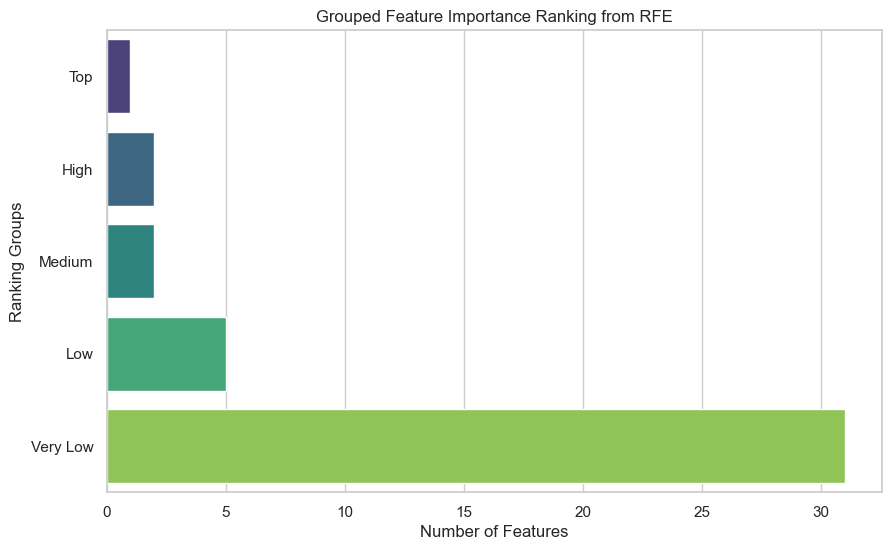

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a grouped bar plot for feature ranking
plt.figure(figsize=(10, 6))
sns.countplot(y='Ranking Group', data=ranking_df, palette='viridis', order=['Top', 'High', 'Medium', 'Low', 'Very Low'])

# Add labels and title
plt.title('Grouped Feature Importance Ranking from RFE')
plt.xlabel('Number of Features')
plt.ylabel('Ranking Groups')

plt.show()


# Model 1 after RFE

The following top 18 features were selected after performing Recursive Feature Elimination (RFE):

1. **Lead Source_Welingak Website**
2. **Total Time Spent on Website**
3. **Lead Source_Reference**
4. **Lead Profile_Student of SomeSchool**
5. **Lead Profile_Potential Lead**
6. **Last Notable Activity_SMS Sent**
7. **Last Activity_Olark Chat Conversation**
8. **Lead Source_Olark Chat**
9. **Last Notable Activity_Modified**
10. **Last Activity_SMS Sent**
11. **Continent_Non-Asia**
12. **TotalVisits**
13. **Lead Origin_Landing Page Submission**
14. **Specialization_Marketing Management**
15. **Specialization_Rural and Agribusiness**
16. **Specialization_Operations Management**
17. **Specialization_Finance Management**
18. **Specialization_Business Administration**

Top 18 selected features based on RFE:
['Lead Source_Welingak Website', 'Total Time Spent on Website', 'Lead Source_Reference', 'Lead Profile_Student of SomeSchool', 'Lead Profile_Potential Lead', 'Last Notable Activity_SMS Sent', 'Last Activity_Olark Chat Conversation', 'Lead Source_Olark Chat', 'Last Notable Activity_Modified', 'Last Activity_SMS Sent', 'Continent_Non-Asia', 'TotalVisits', 'Lead Origin_Landing Page Submission', 'Specialization_Marketing Management', 'Specialization_Rural and Agribusiness', 'Specialization_Operations Management', 'Specialization_Finance Management', 'Specialization_Business Administration']
Shape of X_train_selected: (7392, 18)
Shape of X_test_selected: (1848, 18)
VIF Values:
                                   Feature        VIF
0                                    const  17.791084
1             Lead Source_Welingak Website   1.294894
2              Total Time Spent on Website   1.326243
3                    Lead Source_Reference   2.277445
4       Le

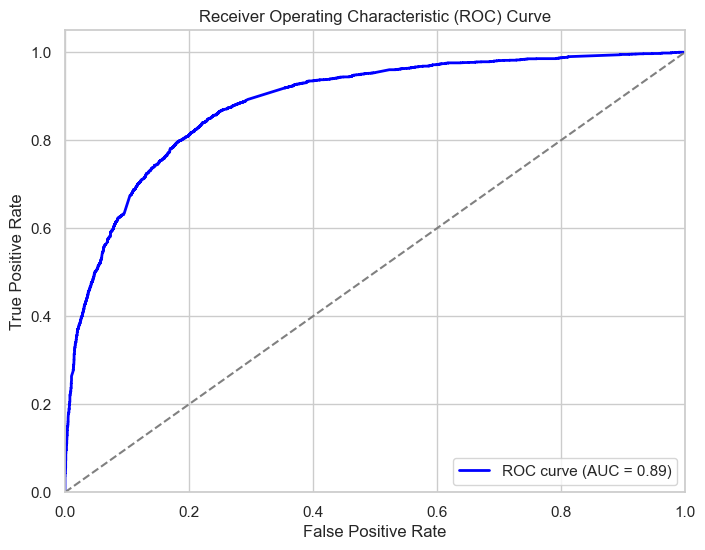


Statsmodels GLM Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7373
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3056.8
Date:                Tue, 22 Oct 2024   Deviance:                       6113.6
Time:                        10:45:47   Pearson chi2:                 7.70e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3950
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [134]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# 1. Select the Top 18 Features based on RFE Rankings
# -----------------------------------------------------------

# Assuming `ranking_df` is available and contains feature rankings
top_18_features = ranking_df[ranking_df['Ranking'] <= 18]['Feature'].tolist()

# Print the selected top 18 features
print(f"Top 18 selected features based on RFE:\n{top_18_features}")

# -----------------------------------------------------------
# 2. Prepare Data for Logistic Regression and VIF Calculation
# -----------------------------------------------------------

# Create new datasets with the selected top 18 features
X_train_selected = X_train_scaled[top_18_features]
X_test_selected = X_test_scaled[top_18_features]

# Print shapes to confirm the selection
print("Shape of X_train_selected:", X_train_selected.shape)
print("Shape of X_test_selected:", X_test_selected.shape)

# -----------------------------------------------------------
# 3. VIF Calculation for the selected features
# -----------------------------------------------------------

# Add constant for intercept in X_train_selected for VIF calculation
X_train_vif = sm.add_constant(X_train_selected)

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]

# Display VIF values
print("VIF Values:")
print(vif_data)

# -----------------------------------------------------------
# 4. Logistic Regression with sklearn (Training data only)
# -----------------------------------------------------------

# Initialize the Logistic Regression model with class weights and increased iterations
logreg = LogisticRegression(random_state=42, class_weight={0: 1, 1: 2}, max_iter=1000)

# Train the model on the training data (with selected features)
logreg.fit(X_train_selected, y_train)

# Make predictions on the training data
y_train_pred = logreg.predict(X_train_selected)

# Evaluate the model on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy (sklearn): {train_accuracy:.4f}")

# Confusion matrix and classification report for the training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Training Confusion Matrix (sklearn):")
print(conf_matrix_train)

class_report_train = classification_report(y_train, y_train_pred)
print("Training Classification Report (sklearn):")
print(class_report_train)

# -----------------------------------------------------------
# 5. ROC Curve and AUC Score
# -----------------------------------------------------------

# Get the predicted probabilities for the positive class (converted leads)
y_train_prob = logreg.predict_proba(X_train_selected)[:, 1]

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# -----------------------------------------------------------
# 6. Logistic Regression with statsmodels (Training data only)
# -----------------------------------------------------------

# Reset the index for X_train_selected and y_train to avoid alignment issues
X_train_selected = X_train_selected.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Add constant to selected features for statsmodels
X_train_sm = sm.add_constant(X_train_selected)

# Build the model using GLM for logistic regression
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()

# Display the summary of the model
print("\nStatsmodels GLM Summary:")
print(res.summary())


# Model 2 after droping - [Specialization_Rural and Agribusiness]

Top 17 selected features after dropping 'interaction_TimeSpent_LeadSource':
['Lead Source_Welingak Website', 'Total Time Spent on Website', 'Lead Source_Reference', 'Lead Profile_Student of SomeSchool', 'Lead Profile_Potential Lead', 'Last Notable Activity_SMS Sent', 'Last Activity_Olark Chat Conversation', 'Lead Source_Olark Chat', 'Last Notable Activity_Modified', 'Last Activity_SMS Sent', 'Continent_Non-Asia', 'TotalVisits', 'Lead Origin_Landing Page Submission', 'Specialization_Marketing Management', 'Specialization_Operations Management', 'Specialization_Finance Management', 'Specialization_Business Administration']
Shape of X_train_selected: (7392, 17)
Shape of X_test_selected: (1848, 17)
VIF Values:
                                   Feature        VIF
0                                    const  17.785403
1             Lead Source_Welingak Website   1.294890
2              Total Time Spent on Website   1.325950
3                    Lead Source_Reference   2.276070
4       Lead P

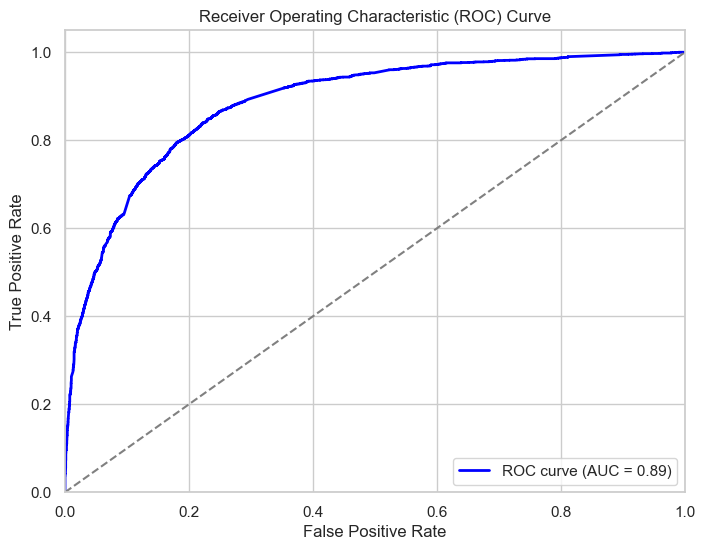


Statsmodels GLM Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7374
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3057.5
Date:                Tue, 22 Oct 2024   Deviance:                       6115.0
Time:                        10:45:48   Pearson chi2:                 7.70e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3949
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

In [136]:
# -----------------------------------------------------------
# 1. Select the Top 18 Features and drop 'interaction_TimeSpent_LeadSource'
# -----------------------------------------------------------

# Drop 'interaction_TimeSpent_LeadSource' based on the p-value analysis
top_17_features = [feature for feature in top_18_features if feature != 'Specialization_Rural and Agribusiness']

# Print the selected top 17 features
print(f"Top 17 selected features after dropping 'interaction_TimeSpent_LeadSource':\n{top_17_features}")

# -----------------------------------------------------------
# 2. Prepare Data for Logistic Regression and VIF Calculation
# -----------------------------------------------------------

# Create new datasets with the selected top 17 features
X_train_selected = X_train_scaled[top_17_features]
X_test_selected = X_test_scaled[top_17_features]

# Print shapes to confirm the selection
print("Shape of X_train_selected:", X_train_selected.shape)
print("Shape of X_test_selected:", X_test_selected.shape)

# -----------------------------------------------------------
# 3. VIF Calculation for the selected features
# -----------------------------------------------------------

# Add constant for intercept in X_train_selected for VIF calculation
X_train_vif = sm.add_constant(X_train_selected)

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]

# Display VIF values
print("VIF Values:")
print(vif_data)

# -----------------------------------------------------------
# 4. Logistic Regression with sklearn (Training data only)
# -----------------------------------------------------------

# Initialize the Logistic Regression model with class weights and increased iterations
logreg = LogisticRegression(random_state=42, class_weight={0: 1, 1: 2}, max_iter=1000)

# Train the model on the training data (with selected features)
logreg.fit(X_train_selected, y_train)

# Make predictions on the training data
y_train_pred = logreg.predict(X_train_selected)

# Evaluate the model on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy (sklearn): {train_accuracy:.4f}")

# Confusion matrix and classification report for the training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Training Confusion Matrix (sklearn):")
print(conf_matrix_train)

class_report_train = classification_report(y_train, y_train_pred)
print("Training Classification Report (sklearn):")
print(class_report_train)

# -----------------------------------------------------------
# 5. ROC Curve and AUC Score
# -----------------------------------------------------------

# Get the predicted probabilities for the positive class (converted leads)
y_train_prob = logreg.predict_proba(X_train_selected)[:, 1]

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# -----------------------------------------------------------
# 6. Logistic Regression with statsmodels (Training data only)
# -----------------------------------------------------------

# Reset the index for X_train_selected and y_train to avoid alignment issues
X_train_selected = X_train_selected.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Add constant to selected features for statsmodels
X_train_sm = sm.add_constant(X_train_selected)

# Build the model using GLM for logistic regression
logm3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm3.fit()

# Display the summary of the model
print("\nStatsmodels GLM Summary:")
print(res.summary())


# Logistic Regression Model Evaluation on Test Set

This code performs the following steps:

1. **Predict Probabilities for the Test Set:**
   - The logistic regression model is used to predict the probability that each instance in the test set belongs to the positive class (Converted).
   
2. **Evaluate Model at Various Probability Cutoffs:**
   - For each probability cutoff from 0.0 to 0.9, the accuracy, sensitivity (recall), and specificity are calculated. 
   - The results are plotted to visualize the trade-off between these metrics and help determine the optimal cutoff point.

3. **Determine the Optimal Cutoff Point:**
   - The optimal cutoff point is selected where the difference between sensitivity and specificity is minimized, ensuring a balanced performance.

4. **Evaluate Model Using the Optimal Cutoff:**
   - The optimal cutoff is applied to make final predictions on the test set.
   - The performance of the model is evaluated using accuracy, confusion matrix, precision, recall, and F1-score.

5. **Compare with Default Cutoff of 0.5:**
   - The model's performance is also evaluated using the default probability cutoff of 0.5 for comparison. Accuracy, confusion matrix, precision, recall, and F1-score are calculated and compared with those from the optimal cutoff.

6. **Calculate and Plot the ROC Curve and AUC:**
   - The ROC curve is plotted, showing the trade-off between true positive rate (sensitivity) and false positive rate at different thresholds.
   - The Area Under the ROC Curve (AUC) is calculated, which provides a single metric summarizing the model's ability to distinguish between the positive and negative classes.


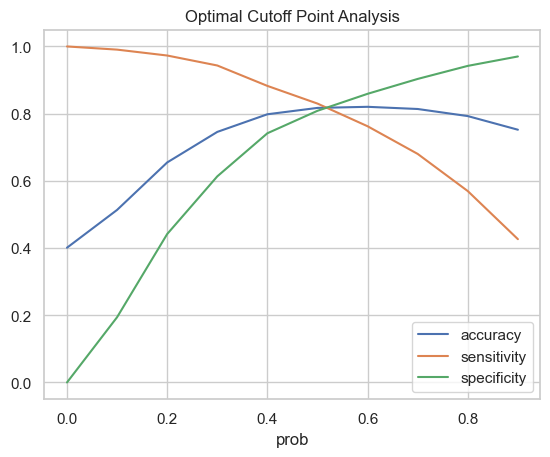

The optimal cutoff point is: 0.50
Final Accuracy: 0.8171
Final Confusion Matrix:
[[895 212]
 [126 615]]
Precision: 0.7437
Recall: 0.8300
F1-Score: 0.7844
Final Accuracy with 0.5 cutoff: 0.8171
Final Confusion Matrix with 0.5 cutoff:
[[895 212]
 [126 615]]
Precision with 0.5 cutoff: 0.7437
Recall with 0.5 cutoff: 0.8300
F1-Score with 0.5 cutoff: 0.7844


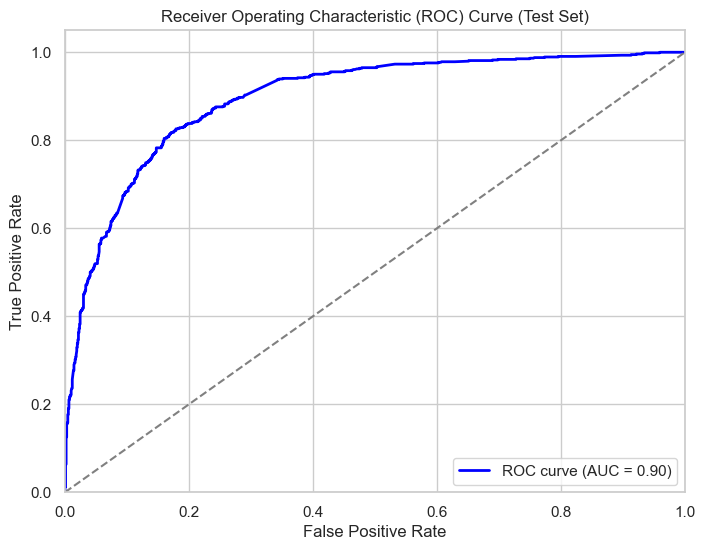

In [138]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# -----------------------------------------------------------
# 7. Predict Probabilities for Test Data (Using the Selected Features from Model 2)
# -----------------------------------------------------------

# Ensure we are using the same selected features for X_test_scaled
y_test_prob = logreg.predict_proba(X_test_selected)[:, 1]  # Get probabilities for class 1 (Converted)

# Create a DataFrame to store the actual test set labels and the predicted probabilities
y_test_pred_final = pd.DataFrame({'Converted': y_test, 'Conversion_Prob': y_test_prob})

# Create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pred_final[i] = y_test_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)

# Calculate accuracy, sensitivity, and specificity for various probability cutoffs
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensitivity', 'specificity'])

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final[i])
    
    total1 = sum(sum(cm1))
    accuracy = (cm1[0, 0] + cm1[1, 1]) / total1
    
    specificity = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    sensitivity = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]

# Plot the results to find the optimal cutoff point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensitivity', 'specificity'])
plt.title('Optimal Cutoff Point Analysis')
plt.show()

# -----------------------------------------------------------
# 8. Select the Optimal Cutoff Point
# -----------------------------------------------------------

# Select the optimal cutoff point where sensitivity and specificity intersect
optimal_cutoff = cutoff_df.loc[cutoff_df['sensitivity'].sub(cutoff_df['specificity']).abs().idxmin()]['prob']
print(f"The optimal cutoff point is: {optimal_cutoff:.2f}")

# -----------------------------------------------------------
# 9. Apply the Optimal Cutoff to the Test Data
# -----------------------------------------------------------

# Apply the optimal cutoff to make final predictions
y_test_pred_final['final_predicted'] = y_test_pred_final.Conversion_Prob.map(lambda x: 1 if x > optimal_cutoff else 0)

# Evaluate the final performance on the test set
accuracy_final = metrics.accuracy_score(y_test_pred_final['Converted'], y_test_pred_final['final_predicted'])
conf_matrix_final = confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final['final_predicted'])

# Calculate precision, recall, F1-score
precision = precision_score(y_test_pred_final['Converted'], y_test_pred_final['final_predicted'])
recall = recall_score(y_test_pred_final['Converted'], y_test_pred_final['final_predicted'])
f1 = f1_score(y_test_pred_final['Converted'], y_test_pred_final['final_predicted'])

print(f"Final Accuracy: {accuracy_final:.4f}")
print("Final Confusion Matrix:")
print(conf_matrix_final)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# -----------------------------------------------------------
# 10. Compare with Default Cutoff of 0.5
# -----------------------------------------------------------

# Apply a cutoff of 0.5 for comparison
y_test_pred_final['final_predicted_0.5'] = y_test_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Evaluate the performance with a cutoff of 0.5
accuracy_final_0_5 = metrics.accuracy_score(y_test_pred_final['Converted'], y_test_pred_final['final_predicted_0.5'])
conf_matrix_final_0_5 = confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final['final_predicted_0.5'])

# Calculate precision, recall, F1-score with cutoff 0.5
precision_0_5 = precision_score(y_test_pred_final['Converted'], y_test_pred_final['final_predicted_0.5'])
recall_0_5 = recall_score(y_test_pred_final['Converted'], y_test_pred_final['final_predicted_0.5'])
f1_0_5 = f1_score(y_test_pred_final['Converted'], y_test_pred_final['final_predicted_0.5'])

print(f"Final Accuracy with 0.5 cutoff: {accuracy_final_0_5:.4f}")
print("Final Confusion Matrix with 0.5 cutoff:")
print(conf_matrix_final_0_5)
print(f"Precision with 0.5 cutoff: {precision_0_5:.4f}")
print(f"Recall with 0.5 cutoff: {recall_0_5:.4f}")
print(f"F1-Score with 0.5 cutoff: {f1_0_5:.4f}")

# -----------------------------------------------------------
# 11. Calculate AUC-ROC Score for the Test Set
# -----------------------------------------------------------

fpr_test, tpr_test, thresholds_test = roc_curve(y_test_pred_final['Converted'], y_test_pred_final['Conversion_Prob'])
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC Curve for Test Set
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Test Set)')
plt.legend(loc='lower right')
plt.show()


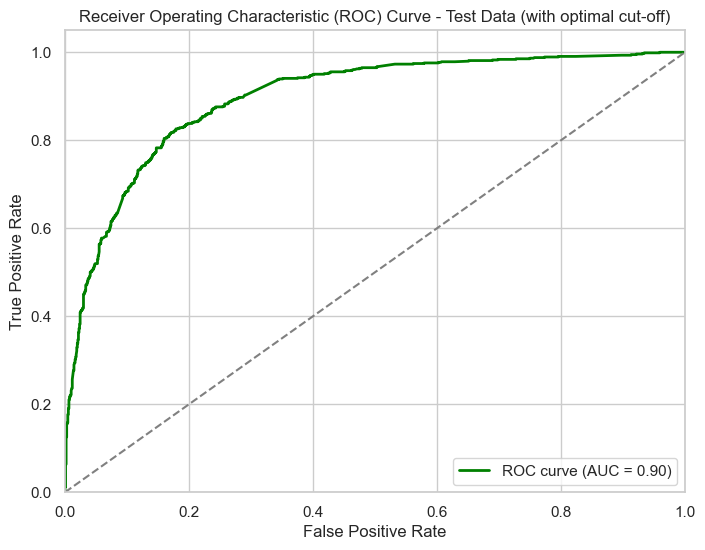

In [139]:
# Calculate ROC curve metrics (FPR, TPR) for the test data
fpr_test_statsmodels, tpr_test_statsmodels, thresholds_test_statsmodels = roc_curve(y_test, y_test_prob)

# Calculate AUC score for the test data
roc_auc_test_statsmodels = auc(fpr_test_statsmodels, tpr_test_statsmodels)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_statsmodels, tpr_test_statsmodels, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc_test_statsmodels:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Data (with optimal cut-off)')
plt.legend(loc='lower right')
plt.show()


In [140]:
lead_scores = y_test_prob * 100  # Convert probabilities to percentages (lead scores)

# Create a DataFrame with the lead scores
LS = pd.DataFrame(lead_scores, columns=['Lead_Score'])

# Add an index or identifier column (optional)
LS['Lead_ID'] = range(1, len(lead_scores) + 1)

# Display the first few rows of the DataFrame
print(LS.head())

# Save the lead scores DataFrame to a CSV file (optional)
LS.to_csv('lead_scores.csv', index=False)


   Lead_Score  Lead_ID
0   23.590042        1
1   37.651080        2
2    5.727144        3
3   19.358428        4
4   22.195536        5


C:\Users\CEREBR0\AppData\Local\Temp\ipykernel_26324\3392129646.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lead_score_summary = LS.groupby('Lead_Score_Group')['Converted'].mean()


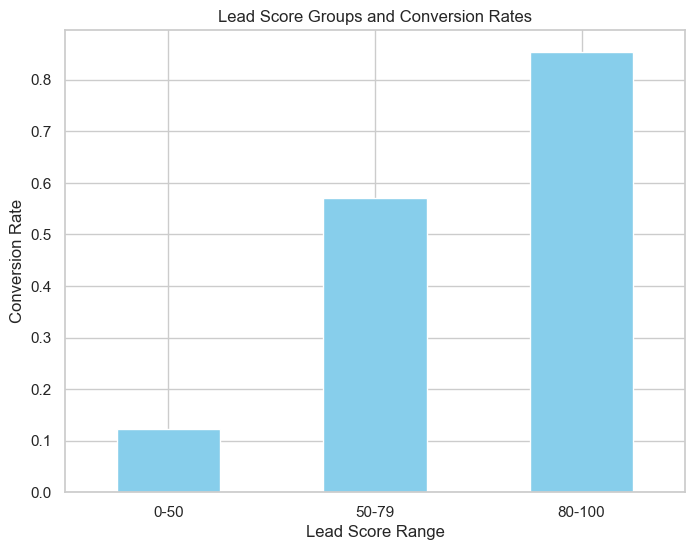

In [141]:
# Create bins for lead score ranges (0-50, 50-79, 80-100)
bins = [0, 50, 79, 100]
labels = ['0-50', '50-79', '80-100']
LS['Lead_Score_Group'] = pd.cut(LS['Lead_Score'], bins=bins, labels=labels, include_lowest=True)

# Assuming 'Converted' is already available in y_test_pred_final, merge it with the lead score DataFrame
LS['Converted'] = y_test_pred_final['Converted'].values

# Group by lead score range and calculate conversion rates
lead_score_summary = LS.groupby('Lead_Score_Group')['Converted'].mean()

# Plotting the bar plot for conversion rates by lead score groups
plt.figure(figsize=(8, 6))
lead_score_summary.plot(kind='bar', color='skyblue')
plt.title('Lead Score Groups and Conversion Rates')
plt.xlabel('Lead Score Range')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=0)
plt.show()
